In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
pd.set_option('display.max_columns', 999)
df = pd.read_csv('PAYX_dataset_2019Fall.csv')

In [3]:
df = pd.DataFrame(df, columns=df.columns).sort_values(by='Industry', ascending=True)

In [4]:
df = df.reindex(sorted(df.columns), axis=1)

client_id = df['Client_Id']
df.drop(labels=['Client_Id'], axis=1,inplace = True)
df.insert(0, 'Client_Id', client_id)

In [5]:
df.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
96161       96949   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
74440       75033   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
153807     155135   1   0   0   1   1   0   0   0   0   0   0   0   0   0   0   
74437       75030   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   
153812     155141   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
96161    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
74440    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
153807   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
74437    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
153812   0   0   0   0   0   0   0   1   1   0   0    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  
96161    0   0   0   0   0   0   0   0   0  Industry 1   Level 5  Size 3  
74440    0   0   0   0   0   0   0   0   1  Industry 1   Level 4  Size 3  
153807   0   0   0   0   0   0   0   1   0  Industry 1   Level 4  Size 2  
74437    0   0   0   0   0   0   0   0   1  Industry 1   Level 4  Size 2  
153812   0   0   0   0   0   0   0   0   0  Industry 1   Level 4  Size 2

### Industry 1

# Analysis by Industry
#### 1. Subset the data by Industry level 
#### 2. Find the sum of low-level products to get sum for each high level product
#### 3. We can see how many high level products each client has based on industry level. (hue is company size) 

## Industry 1

In [ ]:
test = df.loc[df['Industry']=='Industry 1']

In [ ]:
a = test.iloc[:,1:10]
a['A'] = a.sum(axis=1)
print('The number of product A is',len(a.columns))
b=test.iloc[:,10:16]
b['B'] = b.sum(axis=1)
print('The number of product B is',len(b.columns))
c = test.iloc[:,16:22]
c['C'] = c.sum(axis=1)
print('The number of product C is',len(c.columns))
d = test.iloc[:, 22:26]
d['D'] = d.sum(axis=1)
len(d.columns)
print('The number of product D is',len(d.columns))
e = test.iloc[:, 26:39]
e['E'] = d.sum(axis=1)
print('The number of product E is',len(e.columns))
f = test.iloc[:, 39:41]
f['F'] = f.sum(axis=1)
print('The number of product F is',len(f.columns))

In [ ]:
test['A'] = a['A']
test['B'] = b['B']
test['C'] = c['C']
test['D'] = d['D']
test['E'] = e['E']
test['F'] = f['F']
test.head()

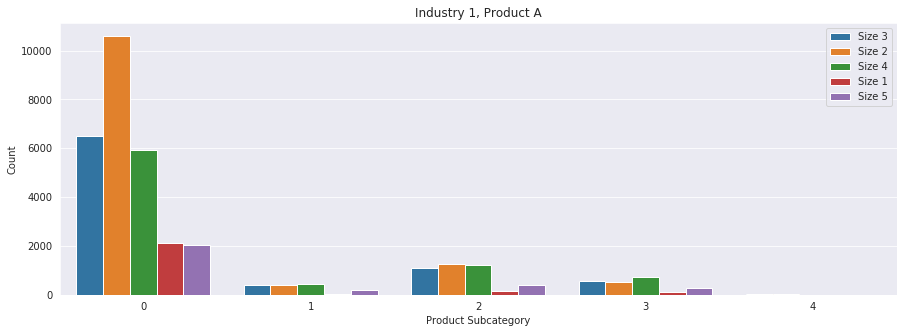

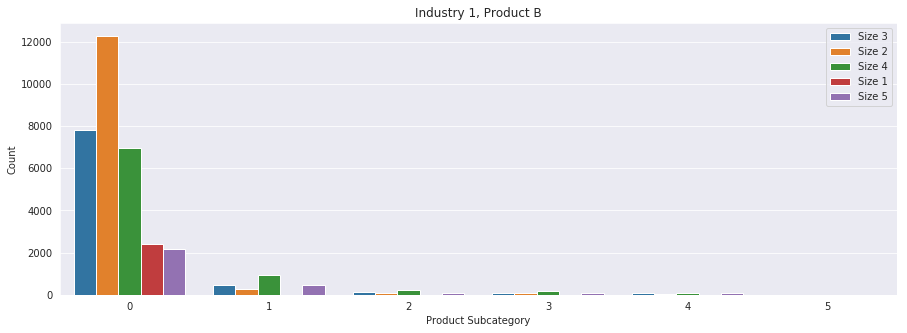

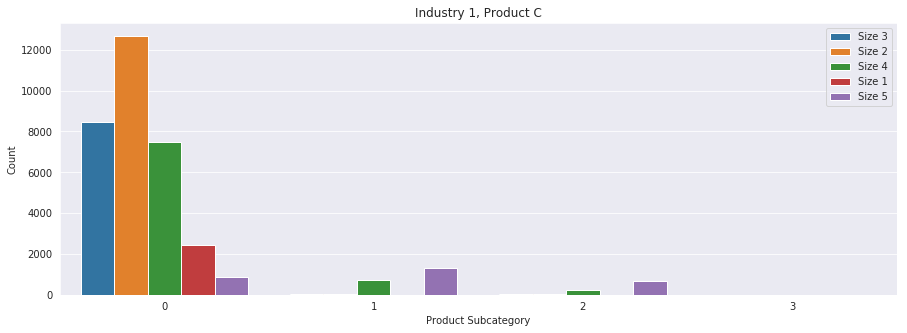

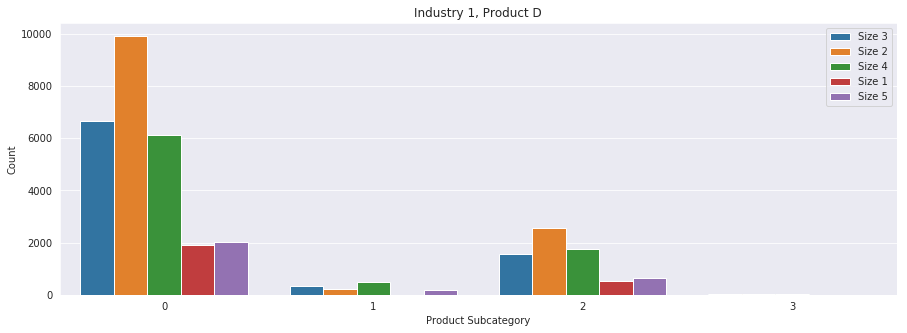

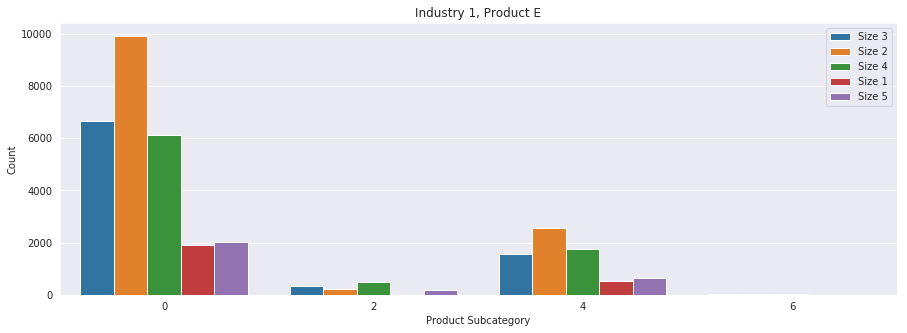

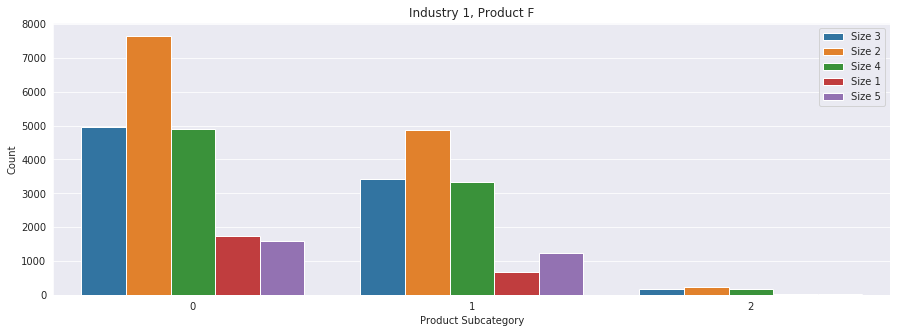

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(test['A'], data= test, hue= test['Size'])
ax.set(xlabel='Product Subcategory', ylabel='Count', title='Industry 1, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test['B'], data= test, hue= test['Size'])
ax.set(xlabel='Product Subcategory', ylabel='Count', title='Industry 1, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test['C'], data= test, hue= test['Size'])
ax.set(xlabel='Product Subcategory', ylabel='Count', title='Industry 1, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test['D'], data= test, hue= test['Size'])
ax.set(xlabel='Product Subcategory', ylabel='Count', title='Industry 1, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test['E'], data= test, hue= test['Size'])
ax.set(xlabel='Product Subcategory', ylabel='Count', title='Industry 1, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test['F'], data= test, hue= test['Size'])
ax.set(xlabel='Product Subcategory', ylabel='Count', title='Industry 1, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 16489
The sum number of the product B: 5752
The sum number of the product C: 4152
The sum number of the product D: 15595
The sum number of the product E: 31190
The sum number of the product F: 14814
[('C', 4152), ('B', 5752), ('F', 14814), ('D', 15595), ('A', 16489), ('E', 31190)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Industry 1')]

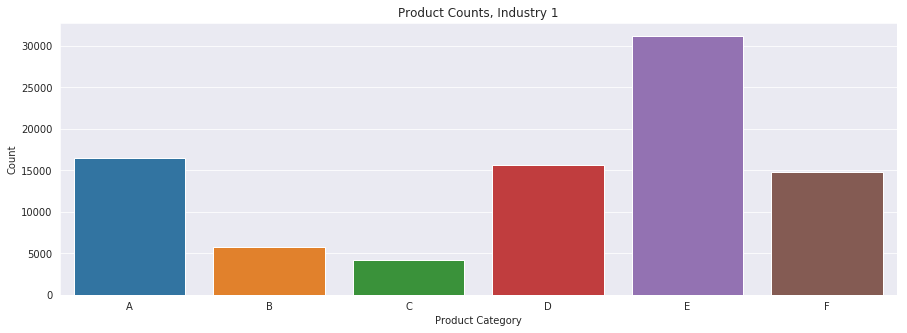

In [91]:
print("The sum number of the product A:" ,sum(test['A']))
print("The sum number of the product B:" ,sum(test['B']))
print("The sum number of the product C:" ,sum(test['C']))
print("The sum number of the product D:" ,sum(test['D']))
print("The sum number of the product E:" ,sum(test['E']))
print("The sum number of the product F:" ,sum(test['F']))

industry_1_list = [('A', sum(test['A'])), ('B', sum(test['B'])), ('C',sum(test['C'])),
             ('D',sum(test['D'])), ('E',sum(test['E'])), ('F',sum(test['F']))]

sums = sums = [sum(test['A']), sum(test['B']), sum(test['C']), sum(test['D']), sum(test['E']), sum(test['F'])]

def sort_by_sum(val): 
    return val[1]  

industry_1_list.sort(key=sort_by_sum)
print(industry_1_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Industry 1')

### Industry 1--> clients most likely to buy category E products and least likely to buy category C products

## Industry 2

In [17]:
test2 = df.loc[df['Industry']=='Industry 2']

In [18]:
a = test2.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b=test2.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c=test2.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d=test2.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e=test2.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f=test2.iloc[:,39:41]
f['F'] = f.sum(axis=1)


In [19]:
test2['A'] = a['A']
test2['B'] = b['B']
test2['C'] = c['C']
test2['D'] = d['D']
test2['E'] = e['E']
test2['F'] = f['F']
test2.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
316746     319546   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2866         2881   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
17177       17319   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
294967     297605   0   0   0   1   1   1   0   0   0   0   0   1   0   1   0   
28119       28339   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
316746   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
2866     0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
17177    0   0   0   0   0   0   0   1   1   0   0    0    0    0    0   0   
294967   0   0   0   0   0   0   0   0   0   0   0    0    0    0    1   0   
28119    1   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
316746   0   0   0   0   0   0   0   0   0  Industry 2   Level 5  Size 2  0   
2866     0   0   0   0   0   0   0   0   0  Industry 2   Level 5  Size 3  0   
17177    0   0   0   0   0   0   0   0   0  Industry 2   Level 4  Size 2  0   
294967   0   0   0   0   0   0   0   0   1  Industry 2   Level 4  Size 4  3   
28119    0   0   0   0   0   0   0   1   0  Industry 2   Level 4  Size 5  0   

        B  C  D  E  F  
316746  0  0  0  0  0  
2866    0  0  0  0  0  
17177   0  0  2  0  0  
294967  2  0  0  1  1  
28119   0  1  0  0  1

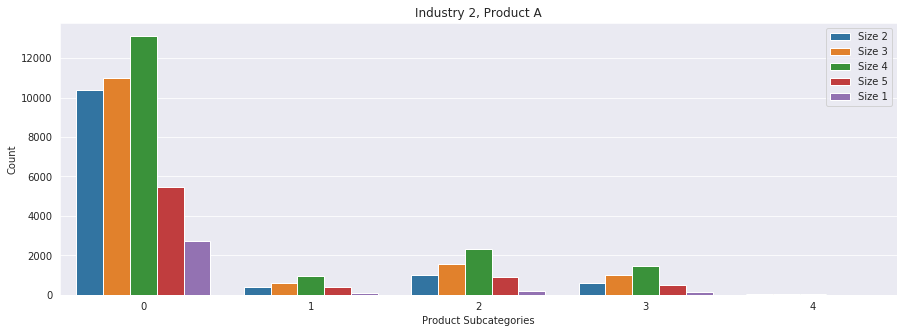

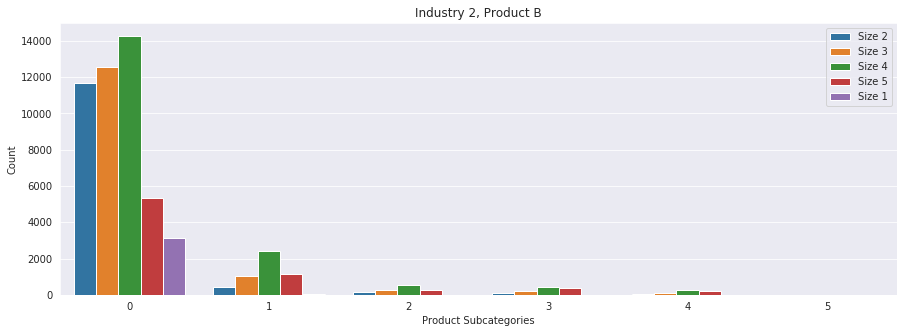

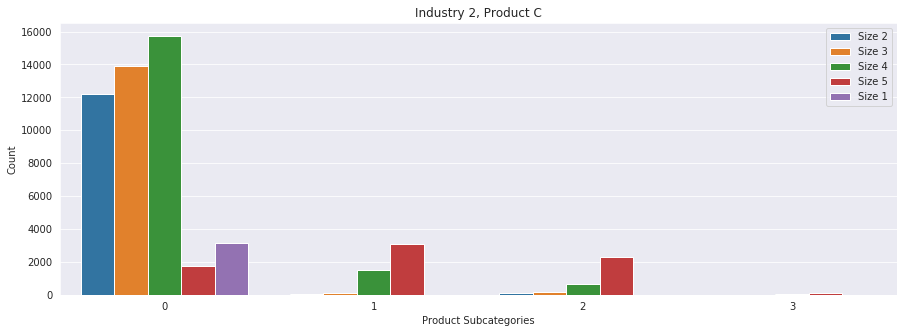

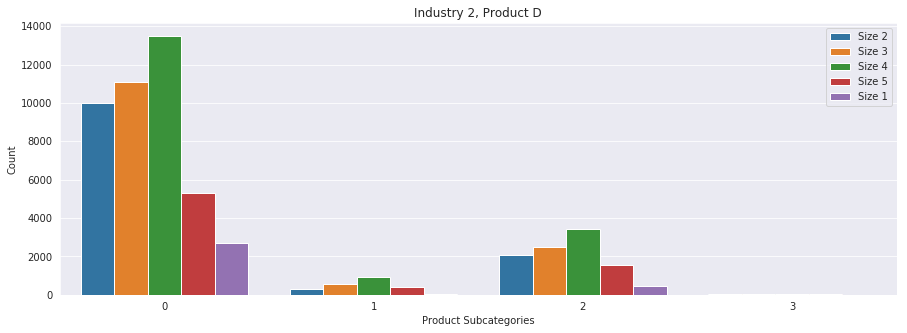

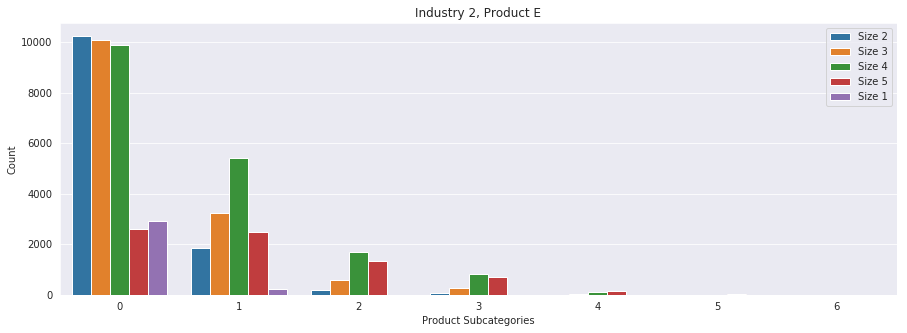

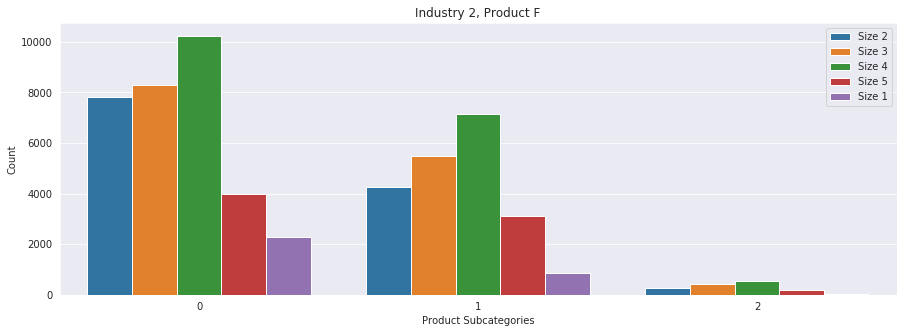

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(test2['A'], data= test2, hue= test2['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 2, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test2['B'], data= test2, hue= test2['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 2, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test2['C'], data= test2, hue= test2['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 2, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test2['D'], data= test2, hue= test2['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 2, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test2['E'], data= test2, hue= test2['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 2, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax =sns.countplot(test2['F'], data= test2, hue= test2['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 2, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 25995
The sum number of the product B: 13426
The sum number of the product C: 11727
The sum number of the product D: 22741
The sum number of the product E: 27673
The sum number of the product F: 23717
[('C', 11727), ('B', 13426), ('D', 22741), ('F', 23717), ('A', 25995), ('E', 27673)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Industry 2')]

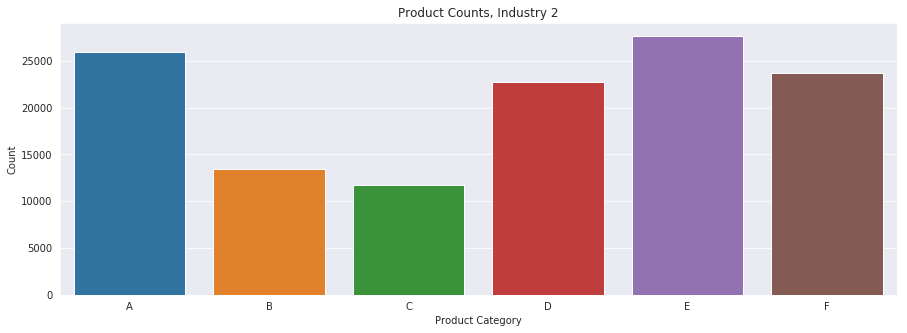

In [92]:
print("The sum number of the product A:", sum(test2['A']))
print("The sum number of the product B:", sum(test2['B']))
print("The sum number of the product C:", sum(test2['C']))
print("The sum number of the product D:", sum(test2['D']))
print("The sum number of the product E:", sum(test2['E']))
print("The sum number of the product F:", sum(test2['F']))

industry_2_list = [('A', sum(test2['A'])), ('B', sum(test2['B'])), ('C',sum(test2['C'])),
             ('D',sum(test2['D'])), ('E',sum(test2['E'])), ('F',sum(test2['F']))]

sums = [sum(test2['A']), sum(test2['B']), sum(test2['C']), sum(test2['D']), sum(test2['E']), sum(test2['F'])]

def sort_by_sum(val): 
    return val[1]  

industry_2_list.sort(key=sort_by_sum)
print(industry_2_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Industry 2')

### Industry 2 --> clients are most likely to buy products from category E and least likely to buy products from category C

## Industry 3

In [22]:
test3 = df.loc[df['Industry']=='Industry 3']

In [23]:
a = test3.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b=test3.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c=test3.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d=test3.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e=test3.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f=test3.iloc[:,39:41]
f['F'] = f.sum(axis=1)

In [24]:
test3['A'] = a['A']
test3['B'] = b['B']
test3['C'] = c['C']
test3['D'] = d['D']
test3['E'] = e['E']
test3['F'] = f['F']
test3.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
63382       63885   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
277080     279565   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
277802     280297   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
346669     349750   0   0   0   1   1   0   0   0   0   0   0   1   0   0   0   
346658     349739   0   0   0   1   1   1   0   0   0   1   1   1   0   0   1   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
63382    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
277080   0   0   0   0   0   0   0   1   1   0   0    0    0    0    0   0   
277802   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
346669   1   0   0   0   0   0   0   0   1   0   0    0    1    0    1   0   
346658   0   0   0   0   0   0   0   0   1   0   0    0    1    0    1   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
63382    0   0   0   0   0   0   0   1   0  Industry 3   Level 5  Size 2  0   
277080   0   0   0   0   0   0   0   0   0  Industry 3   Level 4  Size 2  0   
277802   0   0   0   0   0   0   0   1   0  Industry 3   Level 4  Size 1  0   
346669   0   0   0   0   0   0   0   0   1  Industry 3   Level 1  Size 4  2   
346658   0   0   0   0   0   0   0   1   1  Industry 3   Level 1  Size 5  3   

        B  C  D  E  F  
63382   0  0  0  0  1  
277080  0  0  2  0  0  
277802  0  0  0  0  1  
346669  1  1  1  2  1  
346658  4  0  1  2  2

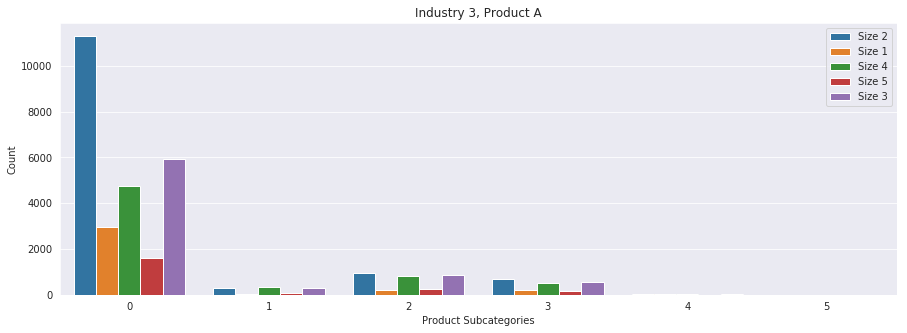

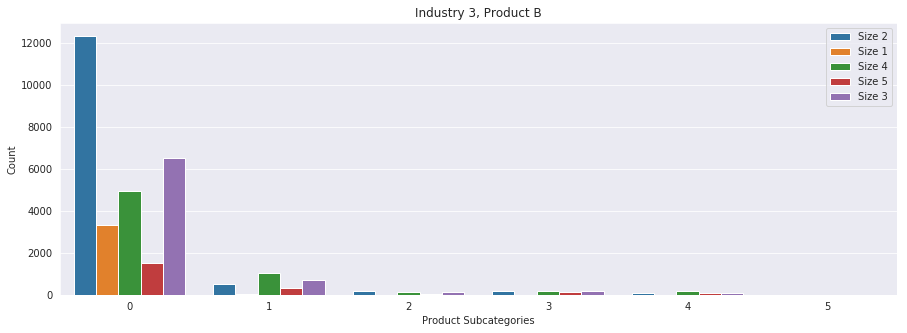

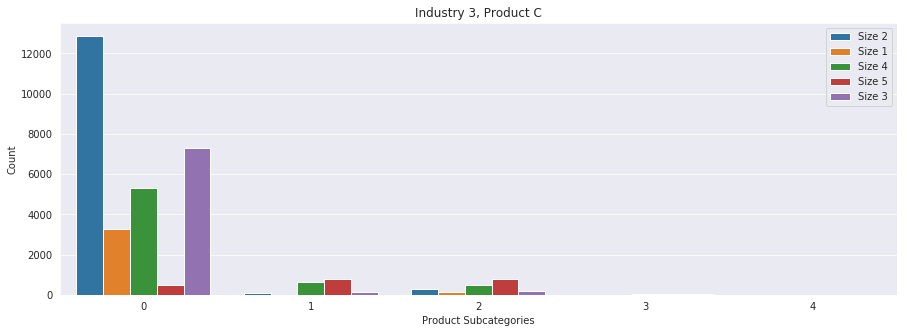

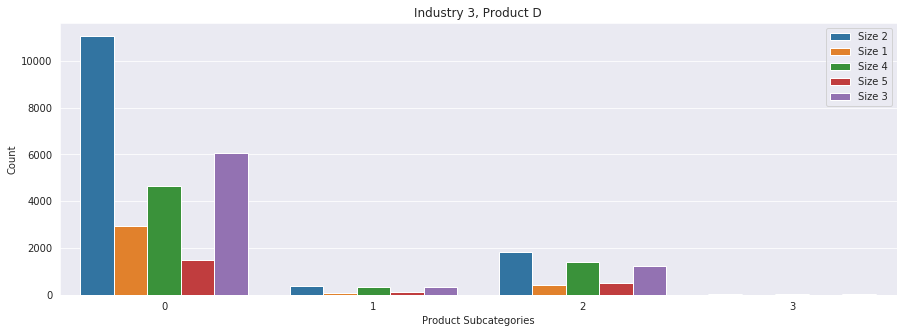

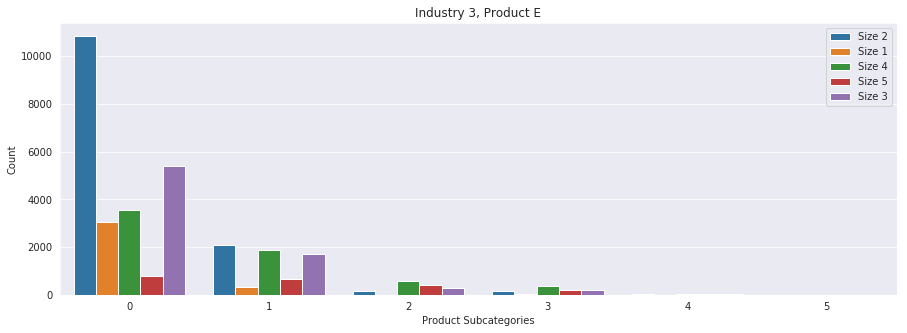

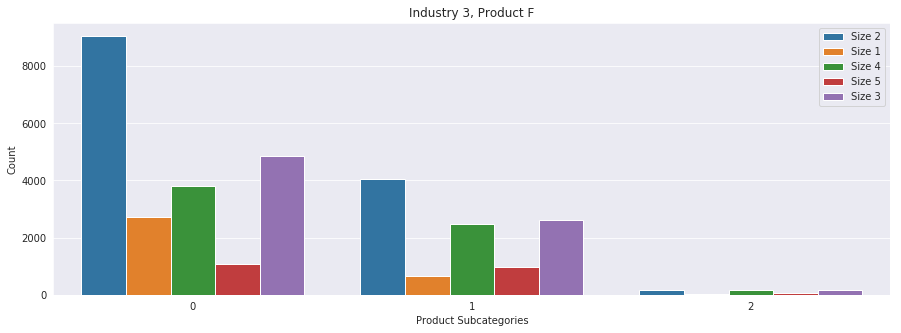

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(test3['A'], data= test3, hue= test3['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 3, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test3['B'], data= test3, hue= test3['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 3, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test3['C'], data= test3, hue= test3['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 3, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test3['D'], data= test3, hue= test3['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 3, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test3['E'], data= test3, hue= test3['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 3, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test3['F'], data= test3, hue= test3['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 3, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 14009
The sum number of the product B: 7352
The sum number of the product C: 5688
The sum number of the product D: 12208
The sum number of the product E: 13056
The sum number of the product F: 11952
[('C', 5688), ('B', 7352), ('F', 11952), ('D', 12208), ('E', 13056), ('A', 14009)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Industry 3')]

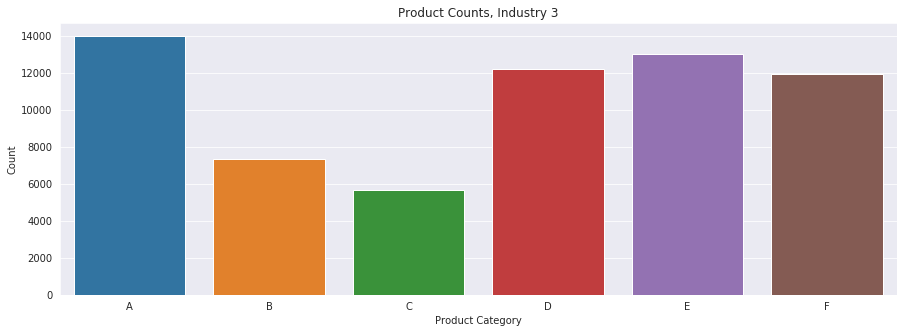

In [93]:
print("The sum number of the product A:", sum(test3['A']))
print("The sum number of the product B:", sum(test3['B']))
print("The sum number of the product C:", sum(test3['C']))
print("The sum number of the product D:", sum(test3['D']))
print("The sum number of the product E:", sum(test3['E']))
print("The sum number of the product F:", sum(test3['F']))

industry_3_list = [('A', sum(test3['A'])), ('B', sum(test3['B'])), ('C',sum(test3['C'])),
             ('D',sum(test3['D'])), ('E',sum(test3['E'])), ('F',sum(test3['F']))]
sums = [sum(test3['A']), sum(test3['B']), sum(test3['C']), sum(test3['D']), sum(test3['E']), sum(test3['F'])]

def sort_by_sum(val): 
    return val[1]  

industry_3_list.sort(key=sort_by_sum)
print(industry_3_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Industry 3')

### Industry 3 --> Clients most likely to get a product from category A and least likely to get product from category C

## Industry 4

In [27]:
test4 = df.loc[df['Industry']=='Industry 4']

a = test4.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b=test4.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c=test4.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d=test4.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e=test4.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f=test4.iloc[:,39:41]
f['F'] = f.sum(axis=1)

test4['A'] = a['A']
test4['B'] = b['B']
test4['C'] = c['C']
test4['D'] = d['D']
test4['E'] = e['E']
test4['F'] = f['F']
test4.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
92695       93466   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1480         1484   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
217130     219112   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
318468     321286   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
367591     370969   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
92695    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
1480     0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
217130   1   1   0   0   0   0   0   0   0   0   0    0    0    0    1   0   
318468   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
367591   1   0   0   0   0   0   0   0   0   0   1    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
92695    0   0   0   0   0   0   0   0   0  Industry 4   Level 5  Size 4  0   
1480     0   0   0   0   0   0   0   0   0  Industry 4   Level 2  Size 5  0   
217130   0   0   0   0   0   0   0   0   0  Industry 4   Level 4  Size 4  0   
318468   0   0   0   0   0   0   0   0   0  Industry 4   Level 5  Size 4  0   
367591   0   0   1   0   1   0   0   0   0  Industry 4   Unknown  Size 5  0   

        B  C  D  E  F  
92695   0  0  0  0  0  
1480    1  0  0  0  0  
217130  0  2  0  1  0  
318468  0  0  0  0  0  
367591  1  1  0  3  0

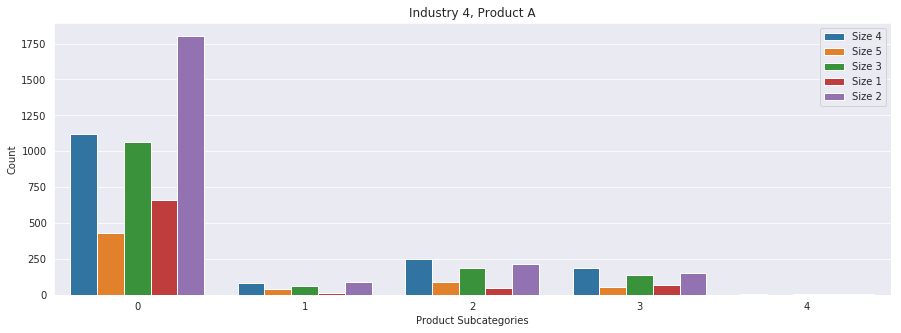

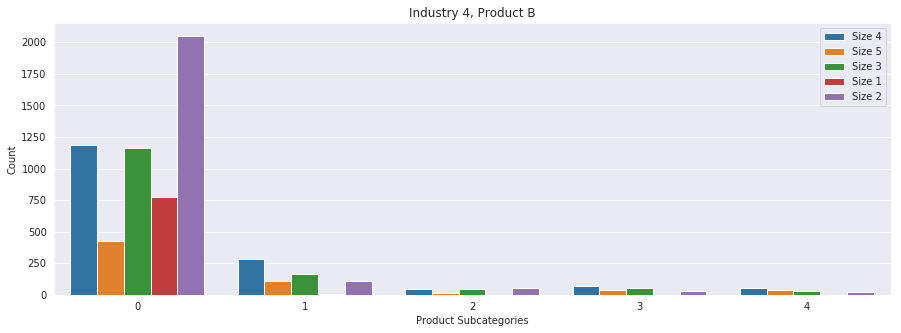

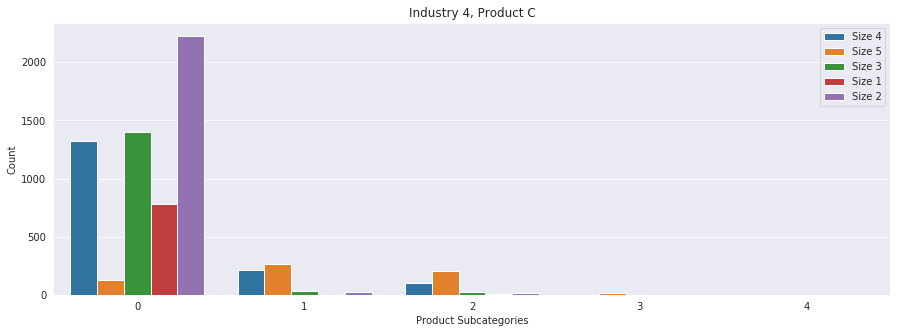

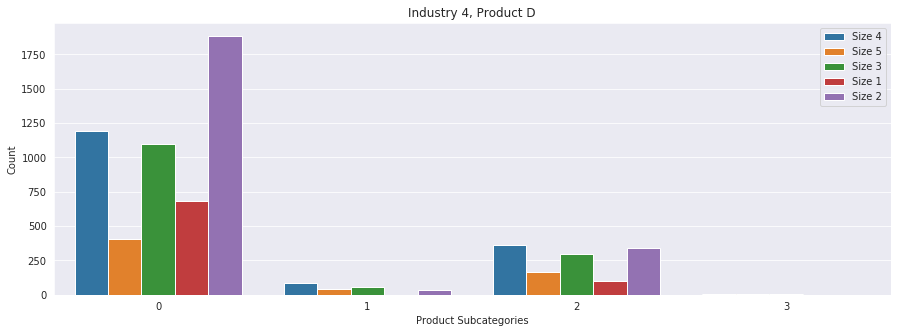

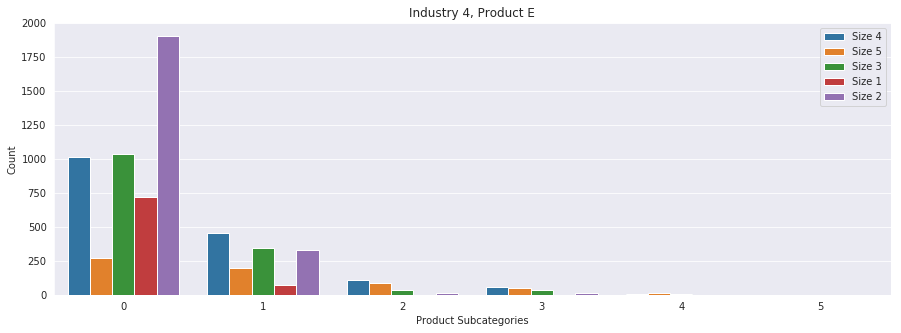

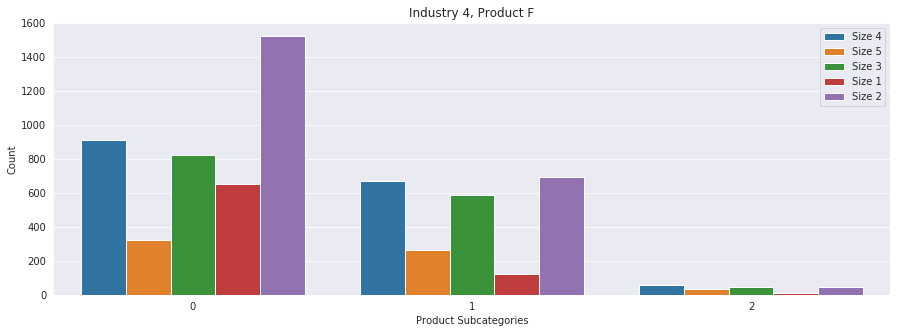

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(test4['A'], data= test4, hue= test4['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 4, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test4['B'], data= test4, hue= test4['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 4, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test4['C'], data= test4, hue= test4['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 4, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test4['D'], data= test4, hue= test4['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 4, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test4['E'], data= test4, hue= test4['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 4, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test4['F'], data= test4, hue= test4['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 4, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 3748
The sum number of the product B: 2117
The sum number of the product C: 1293
The sum number of the product D: 2811
The sum number of the product E: 2459
The sum number of the product F: 2724
[('C', 1293), ('B', 2117), ('E', 2459), ('F', 2724), ('D', 2811), ('A', 3748)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Industry 4')]

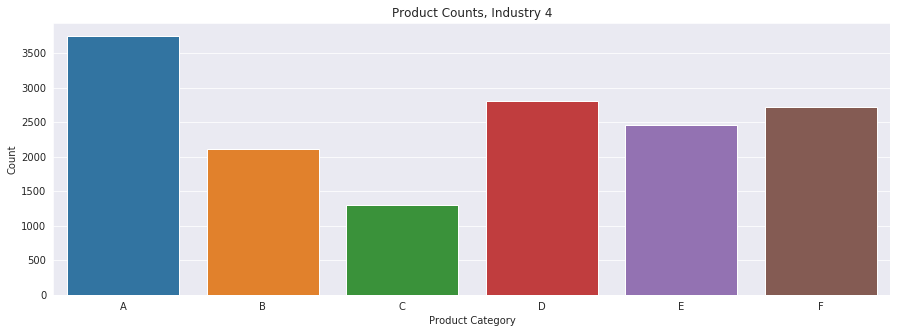

In [94]:
print("The sum number of the product A:" ,sum(test4['A']))
print("The sum number of the product B:" ,sum(test4['B']))
print("The sum number of the product C:" ,sum(test4['C']))
print("The sum number of the product D:" ,sum(test4['D']))
print("The sum number of the product E:" ,sum(test4['E']))
print("The sum number of the product F:" ,sum(test4['F']))

industry_4_list = [('A', sum(test4['A'])), ('B', sum(test4['B'])), ('C',sum(test4['C'])),
             ('D',sum(test4['D'])), ('E',sum(test4['E'])), ('F',sum(test4['F']))]

sums = [sum(test4['A']), sum(test4['B']), sum(test4['C']), sum(test4['D']), sum(test4['E']), sum(test4['F'])]

def sort_by_sum(val): 
    return val[1]  

industry_4_list.sort(key=sort_by_sum)
print(industry_4_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Industry 4')

### Industry 4 --> Clients most likely to buy products from category A and least likely to buy from category C

## Industry 5

In [30]:
test5 = df.loc[df['Industry']=='Industry 5']

a = test5.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b=test5.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c=test5.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d=test5.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e=test5.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f=test5.iloc[:,39:41]
f['F'] = f.sum(axis=1)

test5['A'] = a['A']
test5['B'] = b['B']
test5['C'] = c['C']
test5['D'] = d['D']
test5['E'] = e['E']
test5['F'] = f['F']
test5.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
152742     154060   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
332110     335023   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   
100667     101484   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
305418     308151   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
305380     308112   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
152742   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
332110   1   1   0   0   0   0   0   0   0   0   0    0    0    0    1   0   
100667   1   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
305418   0   0   0   0   0   0   0   0   0   0   0    0    0    0    1   0   
305380   1   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
152742   0   0   0   0   0   0   0   0   0  Industry 5   Level 5  Size 4  0   
332110   0   0   0   0   0   0   0   0   1  Industry 5   Level 4  Size 5  0   
100667   0   0   0   0   0   0   0   0   0  Industry 5   Level 5  Size 5  0   
305418   0   0   0   0   0   0   0   0   0  Industry 5   Level 4  Size 3  0   
305380   0   0   0   0   0   0   0   0   0  Industry 5   Level 4  Size 5  0   

        B  C  D  E  F  
152742  0  0  0  0  0  
332110  2  2  0  1  1  
100667  0  1  0  0  0  
305418  1  0  0  1  0  
305380  0  1  0  0  0

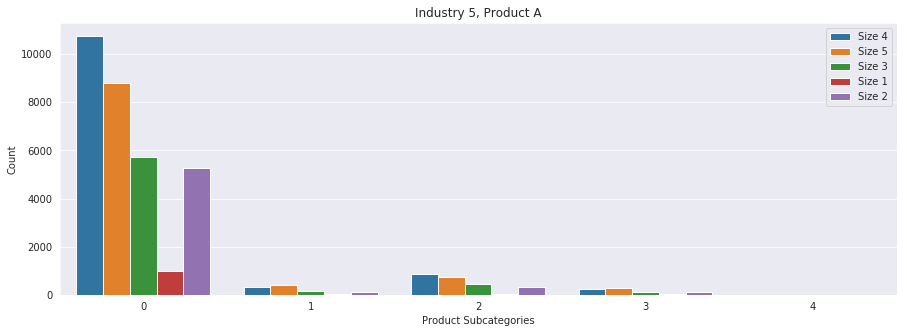

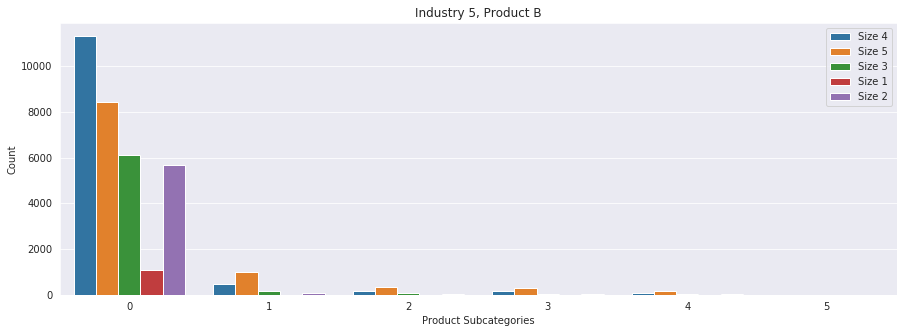

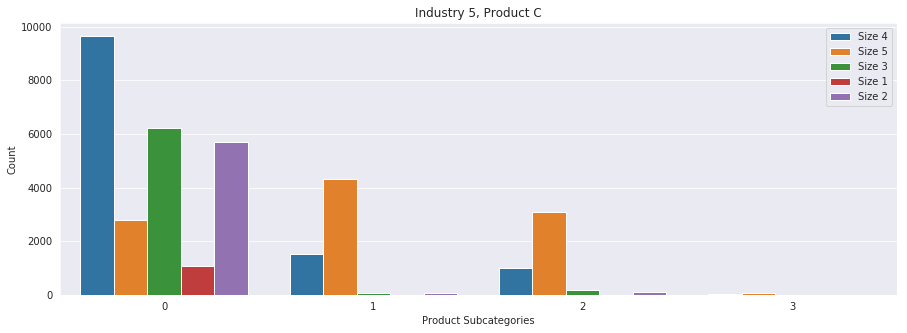

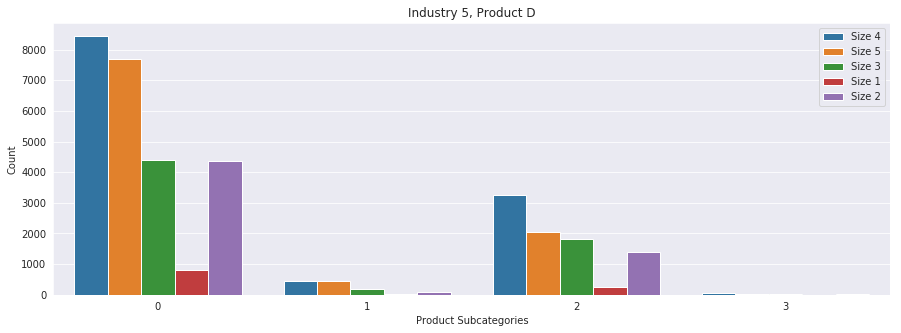

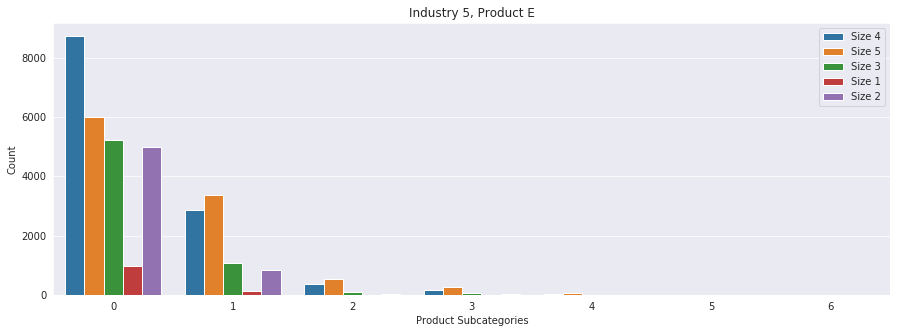

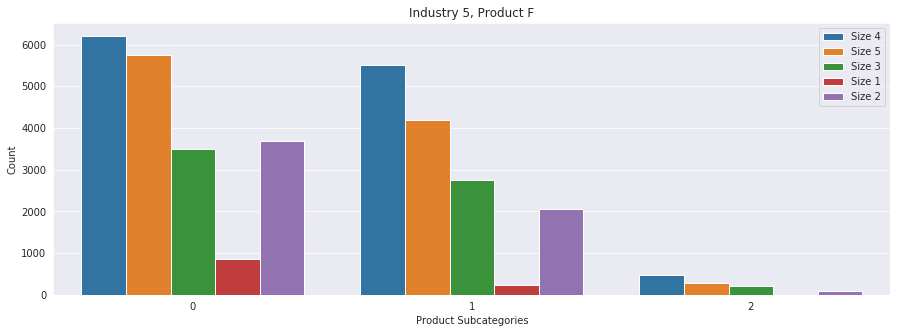

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(test5['A'], data= test5, hue= test5['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 5, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test5['B'], data= test5, hue= test5['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 5, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test5['C'], data= test5, hue= test5['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 5, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test5['D'], data= test5, hue= test5['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 5, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test5['E'], data= test5, hue= test5['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 5, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test5['F'], data= test5, hue= test5['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 5, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 8458
The sum number of the product B: 5882
The sum number of the product C: 14937
The sum number of the product D: 19145
The sum number of the product E: 12348
The sum number of the product F: 16878
[('B', 5882), ('A', 8458), ('E', 12348), ('C', 14937), ('F', 16878), ('D', 19145)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Industry 5')]

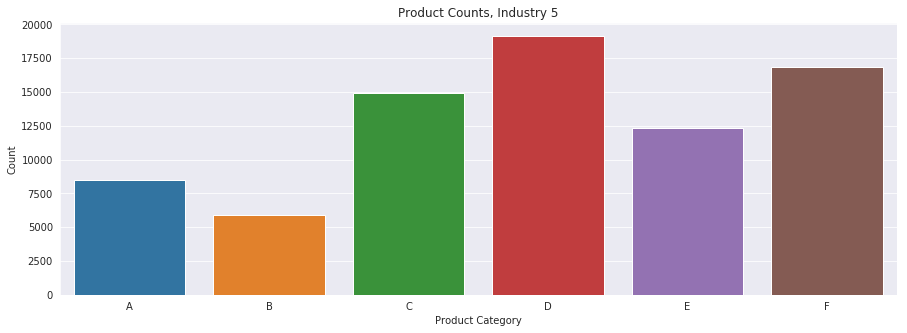

In [95]:
print("The sum number of the product A:" ,sum(test5['A']))
print("The sum number of the product B:" ,sum(test5['B']))
print("The sum number of the product C:" ,sum(test5['C']))
print("The sum number of the product D:" ,sum(test5['D']))
print("The sum number of the product E:" ,sum(test5['E']))
print("The sum number of the product F:" ,sum(test5['F']))

industry_5_list = [('A', sum(test5['A'])), ('B', sum(test5['B'])), ('C',sum(test5['C'])),
             ('D',sum(test5['D'])), ('E',sum(test5['E'])), ('F',sum(test5['F']))]

sums = [sum(test5['A']), sum(test5['B']), sum(test5['C']), sum(test5['D']), sum(test5['E']), sum(test5['F'])]

def sort_by_sum(val): 
    return val[1]  

industry_5_list.sort(key=sort_by_sum)
print(industry_5_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Industry 5')

### Industry 5 --> clients more likely to buy products from category D and least likely to buy products from category B

## Industry 6

In [33]:
test6 = df.loc[df['Industry']=='Industry 6']

a = test6.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b=test6.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c=test6.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d=test6.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e=test6.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f=test6.iloc[:,39:41]
f['F'] = f.sum(axis=1)

test6['A'] = a['A']
test6['B'] = b['B']
test6['C'] = c['C']
test6['D'] = d['D']
test6['E'] = e['E']
test6['F'] = f['F']
test6.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
55             56   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5713         5762   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   
323280     326139   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
111782     112679   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
373823     377311   0   0   0   1   1   1   0   0   0   1   1   1   0   0   1   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
55       0   0   0   0   0   0   0   0   0   0   0    0    0    0    1   0   
5713     0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
323280   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
111782   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
373823   1   1   0   0   0   0   0   1   1   0   1    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
55       0   0   0   0   0   0   0   0   0  Industry 6   Level 4  Size 4  0   
5713     0   0   0   0   0   0   0   1   0  Industry 6   Level 2  Size 2  2   
323280   0   0   0   0   0   0   0   1   0  Industry 6   Level 4  Size 3  0   
111782   0   0   0   0   0   0   0   1   0  Industry 6   Level 4  Size 2  0   
373823   0   0   0   0   1   0   0   0   1  Industry 6   Unknown  Size 5  3   

        B  C  D  E  F  
55      0  0  0  1  0  
5713    0  0  0  0  1  
323280  0  0  0  0  1  
111782  0  0  0  0  1  
373823  4  2  2  2  1

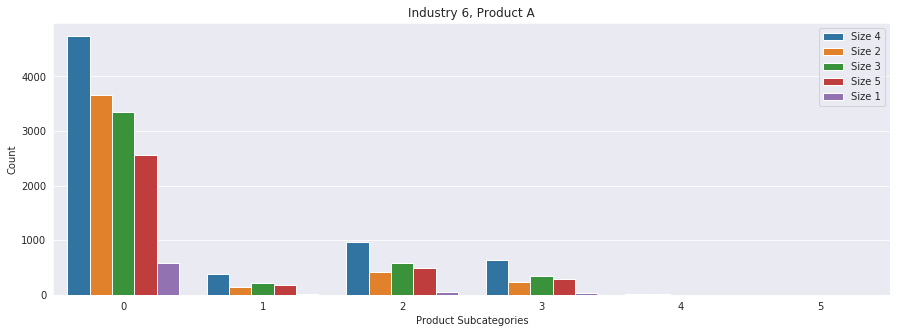

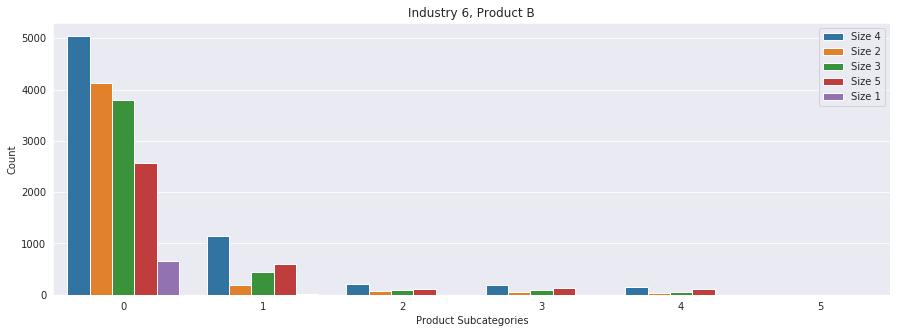

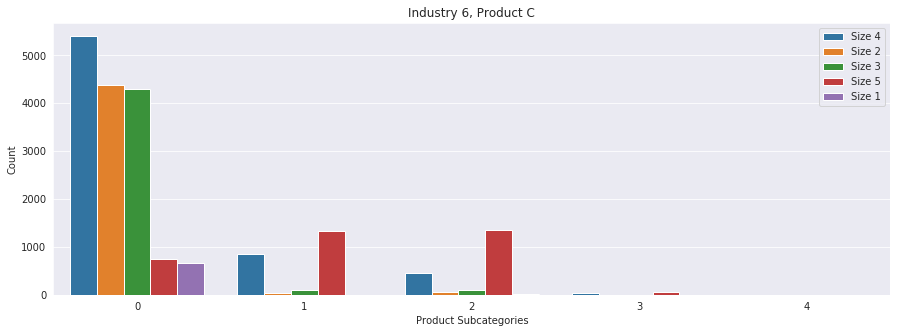

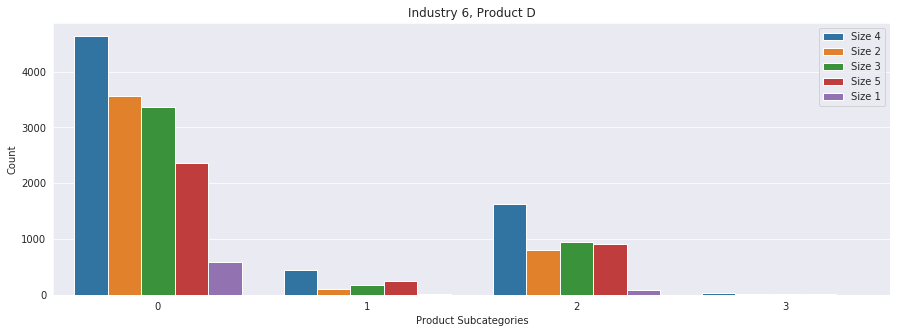

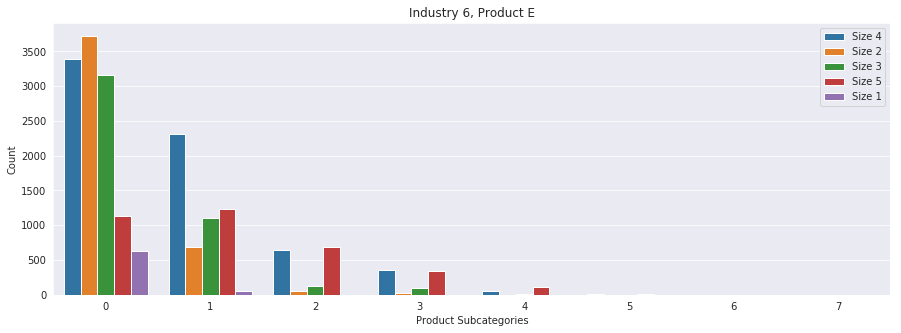

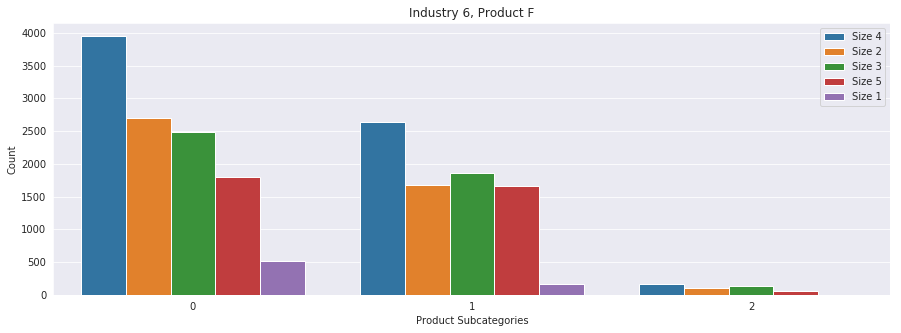

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(test6['A'], data= test6, hue= test6['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 6, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test6['B'], data= test6, hue= test6['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 6, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test6['C'], data= test6, hue= test6['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 6, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test6['D'], data= test6, hue= test6['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 6, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test6['E'], data= test6, hue= test6['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 6, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test6['F'], data= test6, hue= test6['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 6, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 10739
The sum number of the product B: 6216
The sum number of the product C: 6629
The sum number of the product D: 9942
The sum number of the product E: 11667
The sum number of the product F: 8932
[('B', 6216), ('C', 6629), ('F', 8932), ('D', 9942), ('A', 10739), ('E', 11667)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Industry 6')]

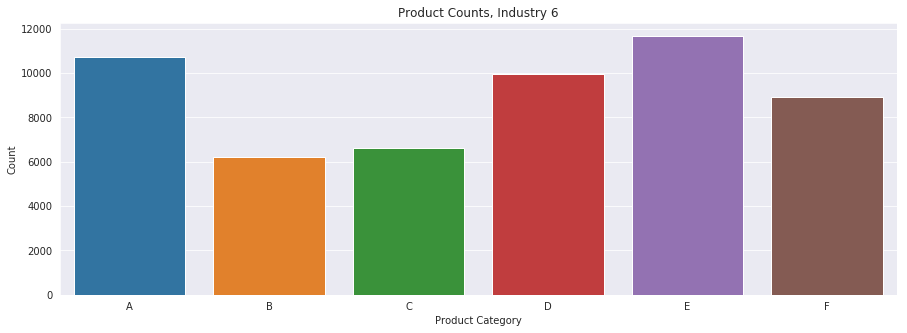

In [96]:
print("The sum number of the product A:" ,sum(test6['A']))
print("The sum number of the product B:" ,sum(test6['B']))
print("The sum number of the product C:" ,sum(test6['C']))
print("The sum number of the product D:" ,sum(test6['D']))
print("The sum number of the product E:" ,sum(test6['E']))
print("The sum number of the product F:" ,sum(test6['F']))

industry_6_list = [('A', sum(test6['A'])), ('B', sum(test6['B'])), ('C',sum(test6['C'])),
             ('D',sum(test6['D'])), ('E',sum(test6['E'])), ('F',sum(test6['F']))]

sums = [sum(test6['A']), sum(test6['B']), sum(test6['C']), sum(test6['D']), sum(test6['E']), sum(test6['F'])]

def sort_by_sum(val): 
    return val[1]  

industry_6_list.sort(key=sort_by_sum)
print(industry_6_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Industry 6')

### Industry 6 --> clients most likely to buy products from category E and least likely to buy products from category B

## Industry 7

In [36]:
test7 = df.loc[df['Industry']=='Industry 7']

a = test7.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b=test7.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c=test7.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d=test7.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e=test7.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f=test7.iloc[:,39:41]
f['F'] = f.sum(axis=1)

test7['A'] = a['A']
test7['B'] = b['B']
test7['C'] = c['C']
test7['D'] = d['D']
test7['E'] = e['E']
test7['F'] = f['F']
test7.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
286645     289204   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
291239     293848   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
127175     128198   0   0   0   1   1   1   0   0   0   0   0   0   0   0   0   
337964     340922   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   
26844       27062   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
286645   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
291239   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
127175   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
337964   1   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
26844    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
286645   0   0   0   0   0   0   0   1   0  Industry 7   Level 4  Size 1  0   
291239   0   0   0   0   0   0   0   0   0  Industry 7   Level 5  Size 4  0   
127175   0   0   0   0   0   0   0   0   0  Industry 7   Level 4  Size 2  3   
337964   0   0   0   0   0   0   0   0   0  Industry 7   Level 1  Size 5  0   
26844    0   0   0   0   0   0   0   0   0  Industry 7   Level 4  Size 3  0   

        B  C  D  E  F  
286645  0  0  0  0  1  
291239  0  0  0  0  0  
127175  0  0  0  0  0  
337964  2  1  0  0  0  
26844   0  0  0  0  0

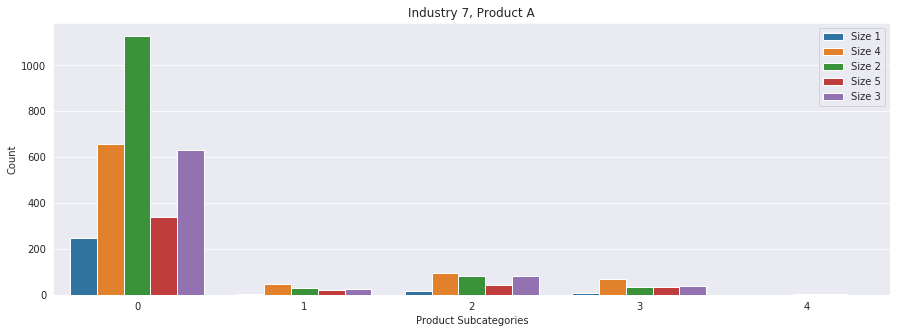

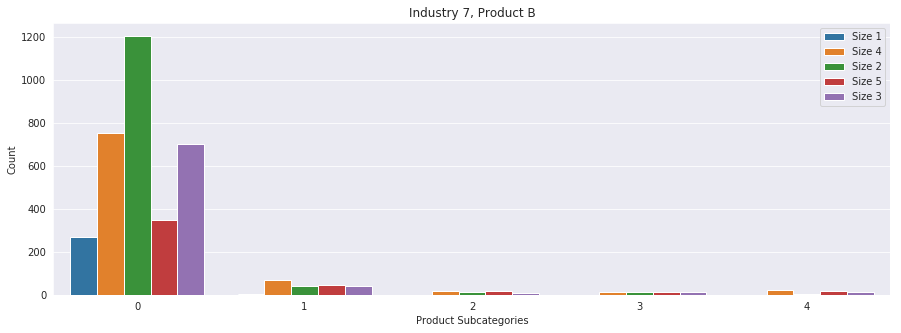

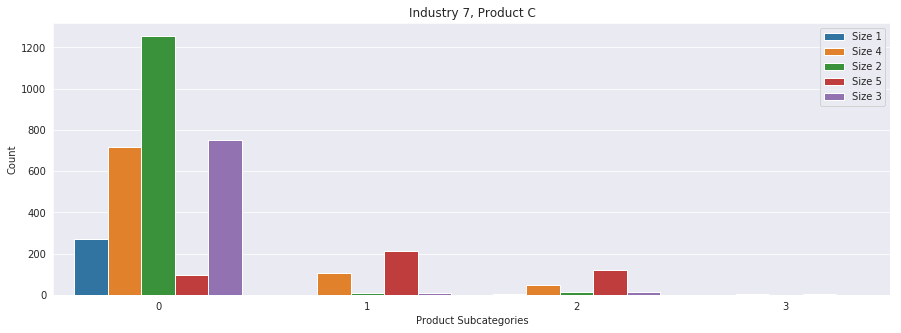

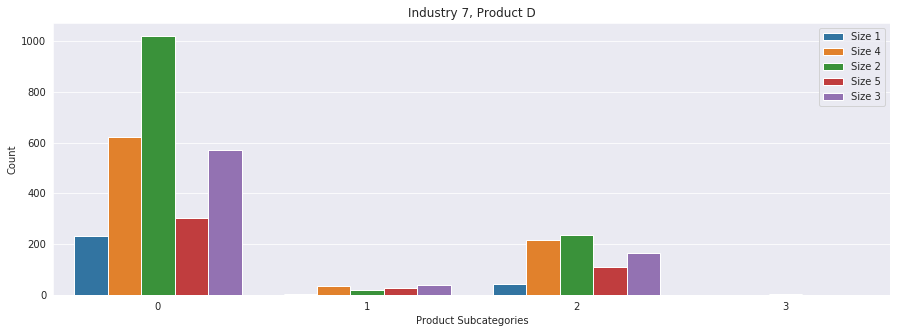

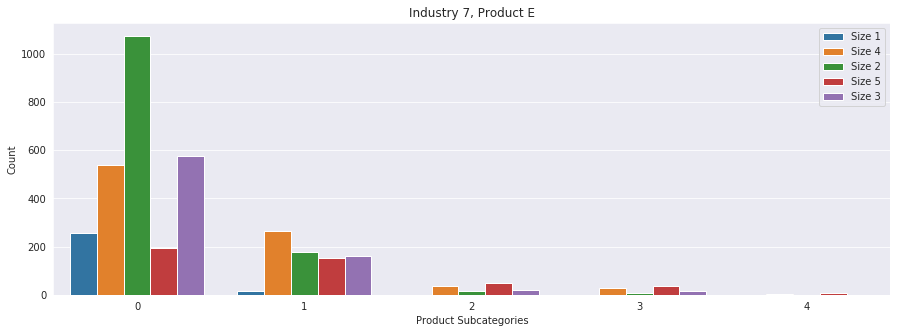

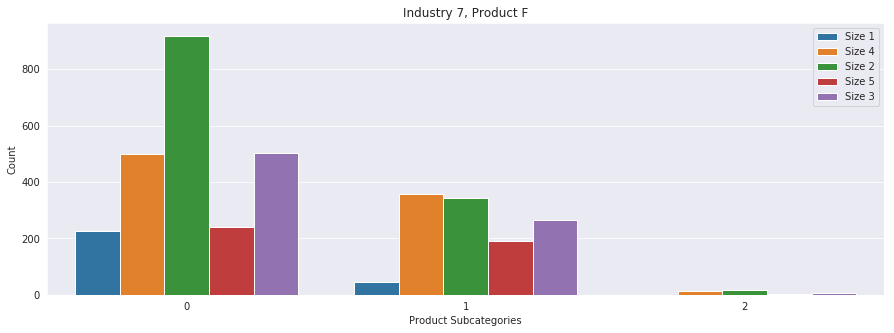

In [37]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(test7['A'], data= test7, hue= test7['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 7, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test7['B'], data= test7, hue= test7['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 7, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test7['C'], data= test7, hue= test7['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 7, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test7['D'], data= test7, hue= test7['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 7, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test7['E'], data= test7, hue= test7['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 7, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test7['F'], data= test7, hue= test7['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 7, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 1329
The sum number of the product B: 679
The sum number of the product C: 754
The sum number of the product D: 1658
The sum number of the product E: 1331
The sum number of the product F: 1283
3632 clients
[('B', 679), ('C', 754), ('F', 1283), ('A', 1329), ('E', 1331), ('D', 1658)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Industry 7')]

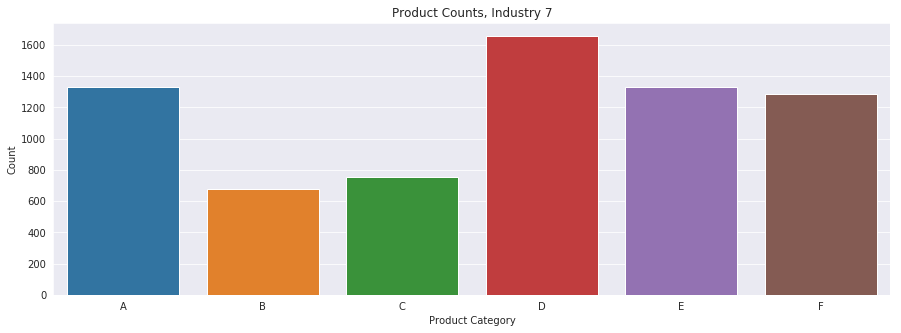

In [97]:
print("The sum number of the product A:" ,sum(test7['A']))
print("The sum number of the product B:" ,sum(test7['B']))
print("The sum number of the product C:" ,sum(test7['C']))
print("The sum number of the product D:" ,sum(test7['D']))
print("The sum number of the product E:" ,sum(test7['E']))
print("The sum number of the product F:" ,sum(test7['F']))
print(len(test7), "clients")

industry_7_list = [('A', sum(test7['A'])), ('B', sum(test7['B'])), ('C',sum(test7['C'])),
             ('D',sum(test7['D'])), ('E',sum(test7['E'])), ('F',sum(test7['F']))]

sums = [sum(test7['A']), sum(test7['B']), sum(test7['C']), sum(test7['D']), sum(test7['E']), sum(test7['F'])]

def sort_by_sum(val): 
    return val[1]  

industry_7_list.sort(key=sort_by_sum)
print(industry_7_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Industry 7')

### Industry 7 --> few clients; clients most likely to buy products from category D and least likely to buy products from category B

## Industry 8

In [39]:
test8 = df.loc[df['Industry']=='Industry 8']

a = test8.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b=test8.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c=test8.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d=test8.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e=test8.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f=test8.iloc[:,39:41]
f['F'] = f.sum(axis=1)

test8['A'] = a['A']
test8['B'] = b['B']
test8['C'] = c['C']
test8['D'] = d['D']
test8['E'] = e['E']
test8['F'] = f['F']
test8.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
56216       56649   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
42727       43083   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
318406     321224   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
95098       95880   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
241104     243279   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
56216    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
42727    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
318406   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
95098    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
241104   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
56216    0   0   0   0   0   0   0   1   0  Industry 8   Level 4  Size 4  0   
42727    0   0   0   0   0   0   0   1   0  Industry 8   Level 4  Size 2  0   
318406   0   0   0   0   0   0   0   0   0  Industry 8   Level 5  Size 2  0   
95098    0   0   0   0   0   0   0   0   0  Industry 8   Level 5  Size 1  0   
241104   0   0   0   0   0   0   0   0   0  Industry 8   Level 5  Size 2  0   

        B  C  D  E  F  
56216   1  0  0  0  1  
42727   0  0  0  0  1  
318406  0  0  0  0  0  
95098   0  0  0  0  0  
241104  0  0  0  0  0

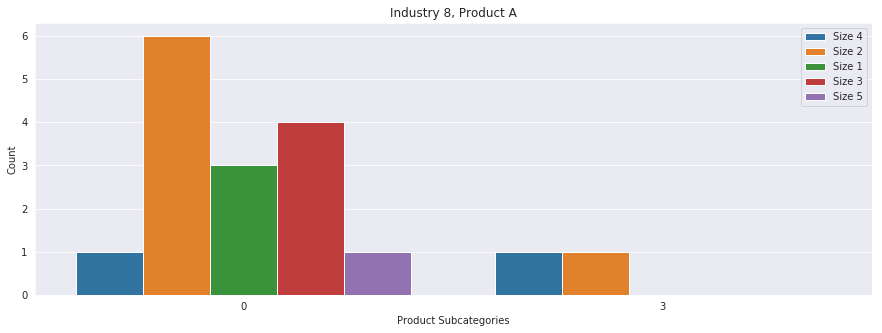

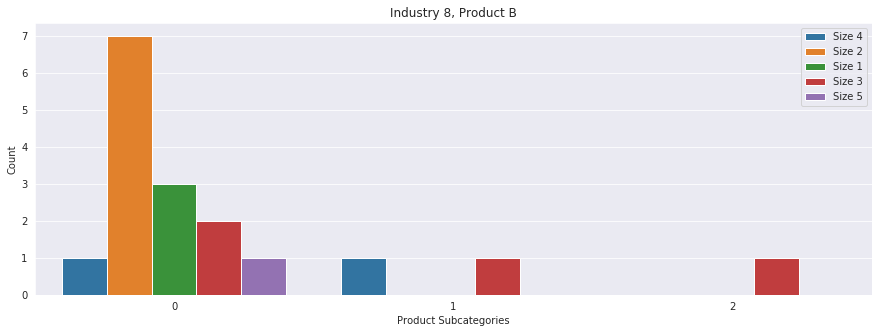

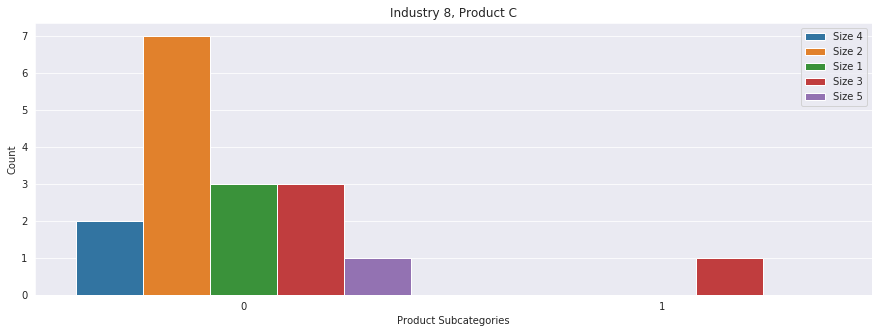

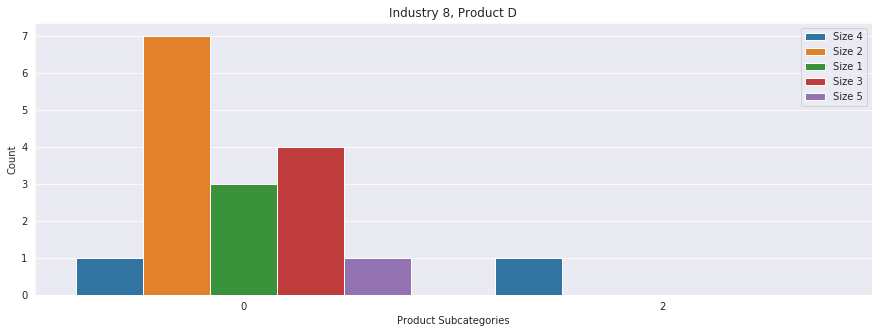

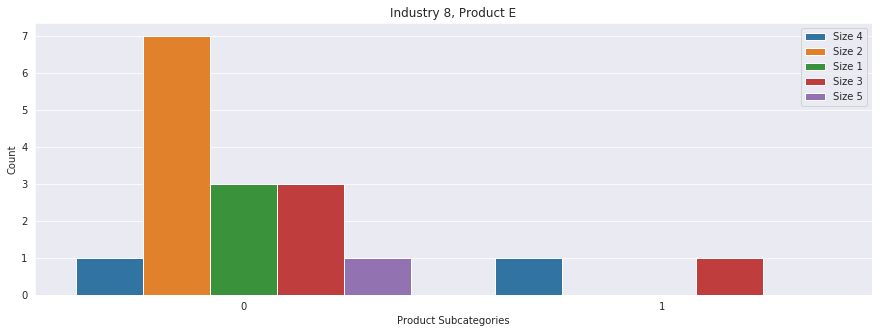

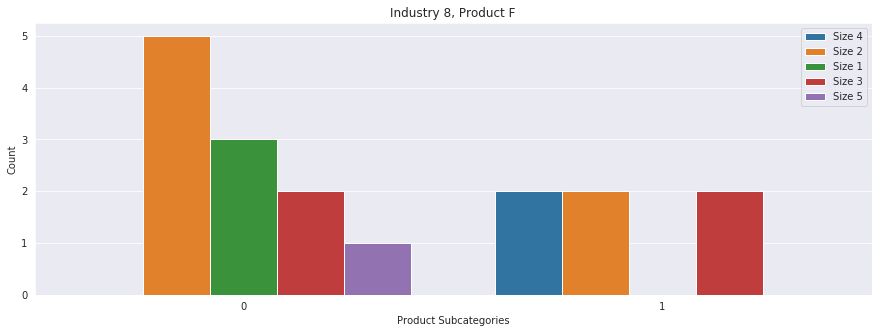

In [40]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(test8['A'], data= test8, hue= test8['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 8, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test8['B'], data= test8, hue= test8['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 8, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test8['C'], data= test8, hue= test8['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 8, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test8['D'], data= test8, hue= test8['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 8, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test8['E'], data= test8, hue= test8['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 8, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test8['F'], data= test8, hue= test8['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 8, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 6
The sum number of the product B: 4
The sum number of the product C: 1
The sum number of the product D: 2
The sum number of the product E: 2
The sum number of the product F: 6
17 clients
[('C', 1), ('D', 2), ('E', 2), ('B', 4), ('A', 6), ('F', 6)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Industry 8')]

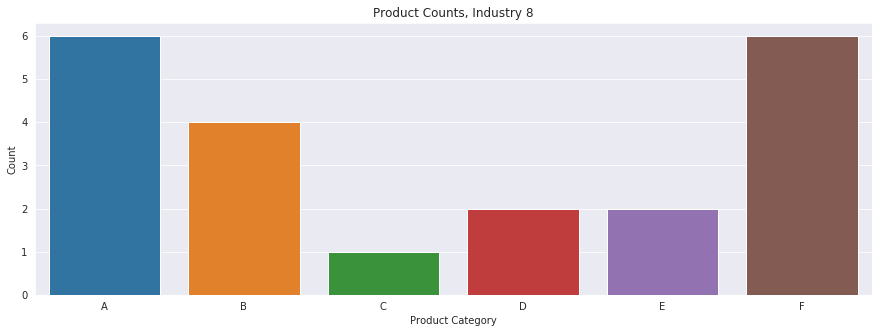

In [98]:
print("The sum number of the product A:" ,sum(test8['A']))
print("The sum number of the product B:" ,sum(test8['B']))
print("The sum number of the product C:" ,sum(test8['C']))
print("The sum number of the product D:" ,sum(test8['D']))
print("The sum number of the product E:" ,sum(test8['E']))
print("The sum number of the product F:" ,sum(test8['F']))
print(len(test8), "clients")

industry_8_list = [('A', sum(test8['A'])), ('B', sum(test8['B'])), ('C',sum(test8['C'])),
             ('D',sum(test8['D'])), ('E',sum(test8['E'])), ('F',sum(test8['F']))]

sums = [sum(test8['A']), sum(test8['B']), sum(test8['C']), sum(test8['D']), sum(test8['E']), sum(test8['F'])]

def sort_by_sum(val): 
    return val[1]  

industry_8_list.sort(key=sort_by_sum)
print(industry_8_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Industry 8')

### Industry 8 --> very few clients; clients most likely to buy products from category F and least likely to buy products from category C

## Industry 9

In [42]:
test9 = df.loc[df['Industry']=='Industry 9']

a = test9.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b=test9.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c=test9.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d=test9.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e=test9.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f=test9.iloc[:,39:41]
f['F'] = f.sum(axis=1)

test9['A'] = a['A']
test9['B'] = b['B']
test9['C'] = c['C']
test9['D'] = d['D']
test9['E'] = e['E']
test9['F'] = f['F']
test9.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
44936       45311   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
137619     138730   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
106194     107050   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
241975     244154   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
367321     370698   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
44936    0   0   0   0   0   0   0   1   1   0   0    0    0    0    0   0   
137619   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
106194   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
241975   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
367321   1   1   0   0   0   0   0   0   0   0   1    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
44936    0   0   0   0   0   0   0   0   0  Industry 9   Level 5  Size 2  0   
137619   0   0   0   0   0   0   0   0   0  Industry 9   Level 4  Size 3  0   
106194   0   0   0   0   0   0   0   0   0  Industry 9   Level 5  Size 2  0   
241975   0   0   0   0   0   0   0   0   0  Industry 9   Level 5  Size 2  0   
367321   0   0   1   0   1   0   0   0   0  Industry 9   Unknown  Size 2  0   

        B  C  D  E  F  
44936   0  0  2  0  0  
137619  0  0  0  0  0  
106194  0  0  0  0  0  
241975  0  0  0  0  0  
367321  0  2  0  3  0

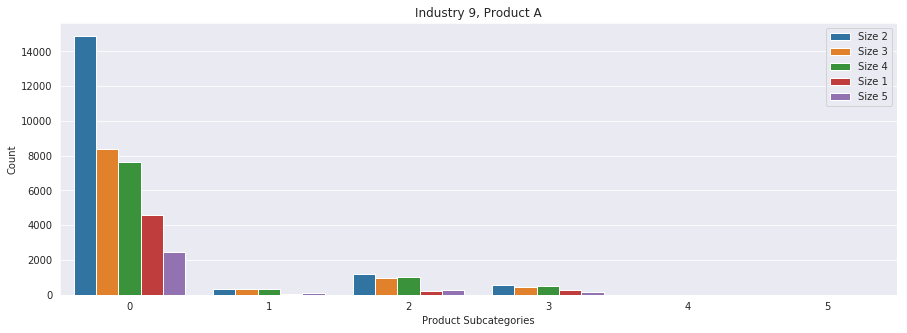

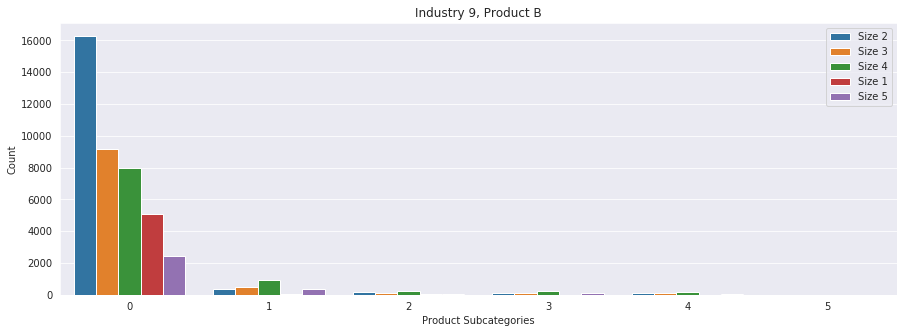

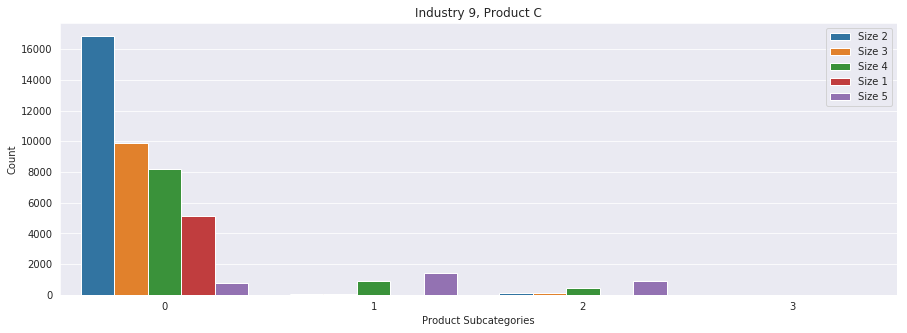

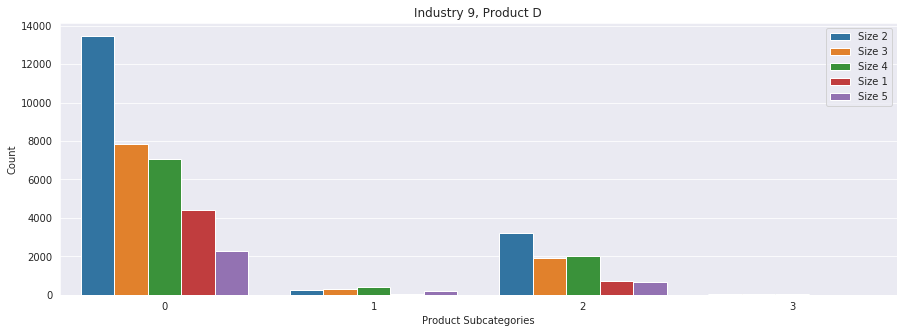

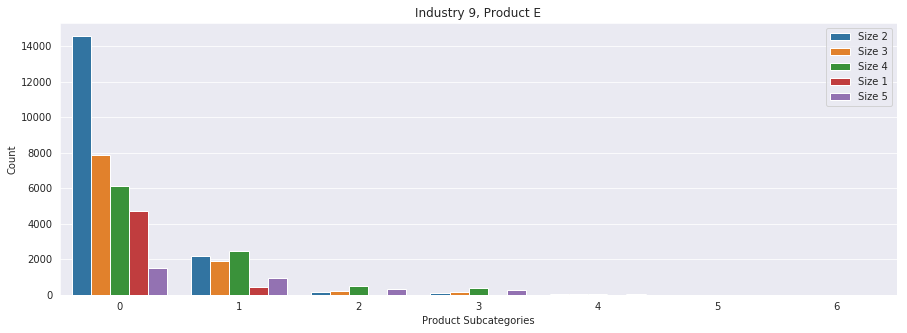

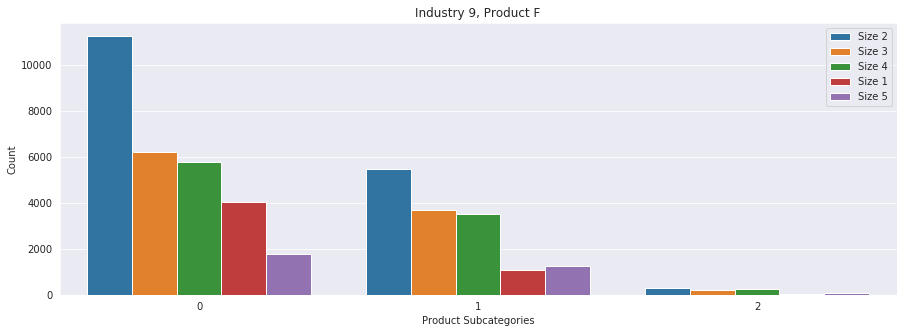

In [43]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(test9['A'], data= test9, hue= test9['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 9, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test9['B'], data= test9, hue= test9['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 9, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test9['C'], data= test9, hue= test9['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 9, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test9['D'], data= test9, hue= test9['Size'])
ax = ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 9, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test9['E'], data= test9, hue= test9['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 9, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test9['F'], data= test9, hue= test9['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 9, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 14710
The sum number of the product B: 7099
The sum number of the product C: 5521
The sum number of the product D: 18624
The sum number of the product E: 13496
The sum number of the product F: 16758
[('C', 5521), ('B', 7099), ('E', 13496), ('A', 14710), ('F', 16758), ('D', 18624)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Industry 9')]

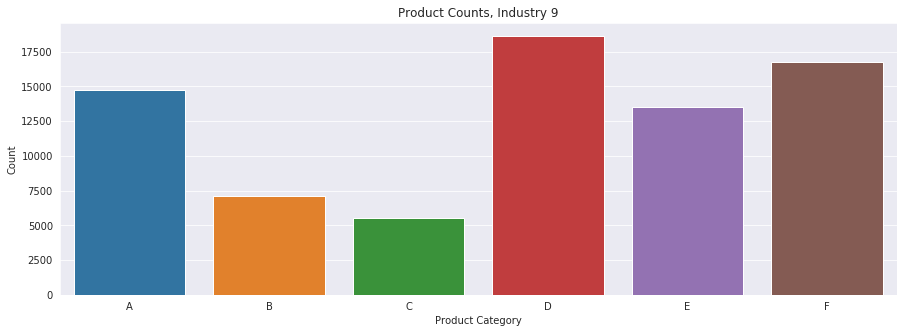

In [99]:
print("The sum number of the product A:" ,sum(test9['A']))
print("The sum number of the product B:" ,sum(test9['B']))
print("The sum number of the product C:" ,sum(test9['C']))
print("The sum number of the product D:" ,sum(test9['D']))
print("The sum number of the product E:" ,sum(test9['E']))
print("The sum number of the product F:" ,sum(test9['F']))

industry_9_list = [('A', sum(test9['A'])), ('B', sum(test9['B'])), ('C',sum(test9['C'])),
             ('D',sum(test9['D'])), ('E',sum(test9['E'])), ('F',sum(test9['F']))]

sums = [sum(test9['A']), sum(test9['B']), sum(test9['C']), sum(test9['D']), sum(test9['E']), sum(test9['F'])]

def sort_by_sum(val): 
    return val[1]  

industry_9_list.sort(key=sort_by_sum)
print(industry_9_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Industry 9')

### Industry 9 --> client most likely to buy products from category D and least likely to buy products from category C 

## Industry 10

In [45]:
test10 = df.loc[df['Industry']=='Industry 10']

a = test10.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b=test10.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c=test10.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d=test10.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e=test10.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f=test10.iloc[:,39:41]
f['F'] = f.sum(axis=1)

test10['A'] = a['A']
test10['B'] = b['B']
test10['C'] = c['C']
test10['D'] = d['D']
test10['E'] = e['E']
test10['F'] = f['F']
test10.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
109633     110507   0   0   0   1   1   1   0   0   0   0   0   0   0   0   0   
187889     189501   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
173271     174774   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
187863     189475   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
188283     189896   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
109633   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
187889   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
173271   0   0   0   0   0   0   0   0   0   0   0    0    0    0    1   0   
187863   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
188283   1   1   0   0   0   0   0   0   0   0   0    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2     Industry Rep.Level    Size  A  \
109633   0   0   0   0   0   0   0   1   0  Industry 10   Level 4  Size 3  3   
187889   0   0   0   0   0   0   0   0   0  Industry 10   Level 4  Size 4  1   
173271   0   0   0   0   0   0   0   0   0  Industry 10   Level 5  Size 4  0   
187863   0   0   0   0   0   0   0   0   0  Industry 10   Level 5  Size 4  0   
188283   0   0   0   0   0   0   0   0   0  Industry 10   Level 5  Size 5  0   

        B  C  D  E  F  
109633  0  0  0  0  1  
187889  0  0  0  0  0  
173271  0  0  0  1  0  
187863  0  0  0  0  0  
188283  0  2  0  0  0

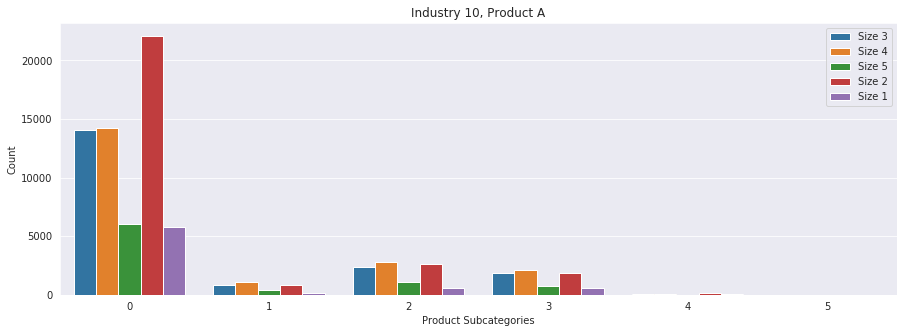

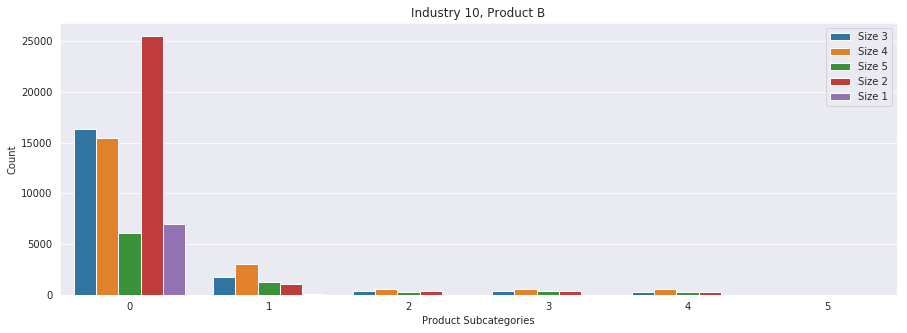

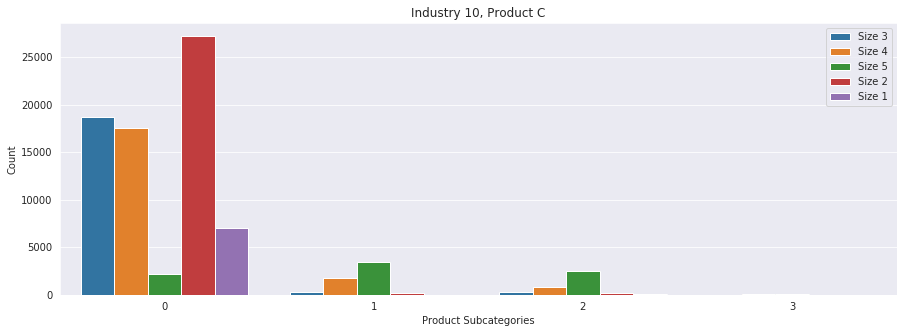

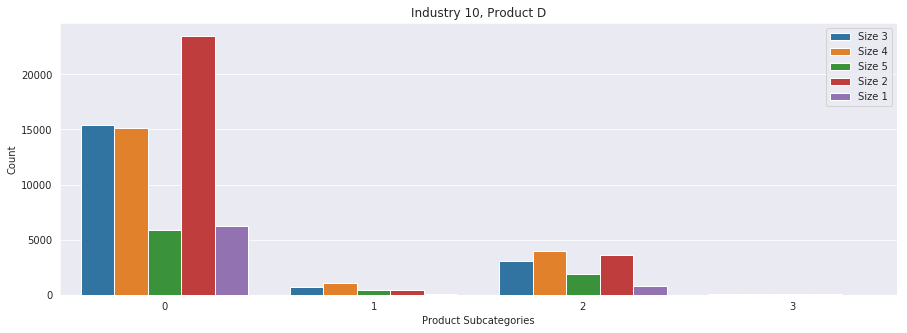

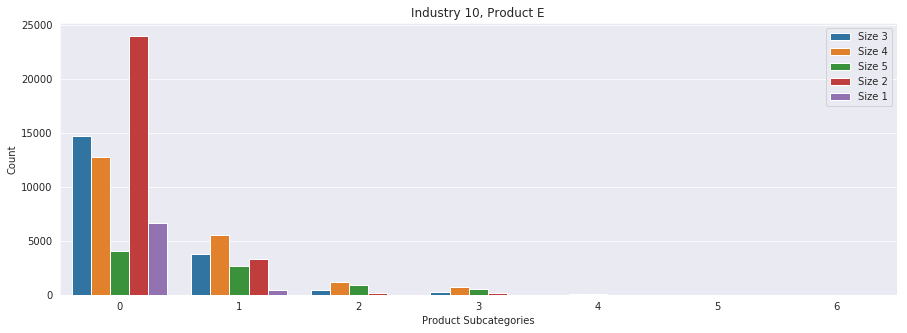

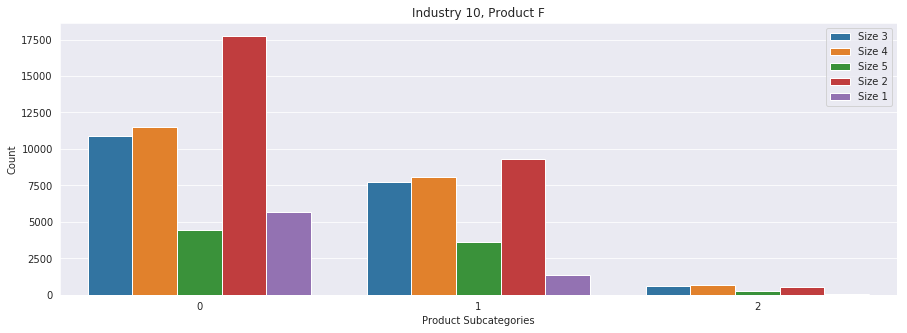

In [46]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(test10['A'], data= test10, hue= test10['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 10, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test10['B'], data= test10, hue= test10['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 10, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test10['C'], data= test10, hue= test10['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 10, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test10['D'], data= test10, hue= test10['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 10, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test10['E'], data= test10, hue= test10['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 10, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test10['F'], data= test10, hue= test10['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 10, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 44971
The sum number of the product B: 21520
The sum number of the product C: 13874
The sum number of the product D: 29954
The sum number of the product E: 27185
The sum number of the product F: 34318
[('C', 13874), ('B', 21520), ('E', 27185), ('D', 29954), ('F', 34318), ('A', 44971)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Industry 10')]

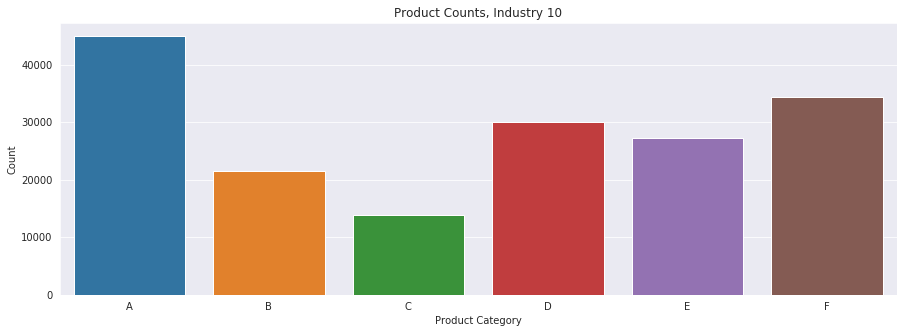

In [100]:
print("The sum number of the product A:" ,sum(test10['A']))
print("The sum number of the product B:" ,sum(test10['B']))
print("The sum number of the product C:" ,sum(test10['C']))
print("The sum number of the product D:" ,sum(test10['D']))
print("The sum number of the product E:" ,sum(test10['E']))
print("The sum number of the product F:" ,sum(test10['F']))

industry_10_list = [('A', sum(test10['A'])), ('B', sum(test10['B'])), ('C',sum(test10['C'])),
             ('D',sum(test10['D'])), ('E',sum(test10['E'])), ('F',sum(test10['F']))]

sums = [sum(test10['A']), sum(test10['B']), sum(test10['C']), sum(test10['D']), sum(test10['E']), sum(test10['F'])]

def sort_by_sum(val): 
    return val[1]  

industry_10_list.sort(key=sort_by_sum)
print(industry_10_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Industry 10')

### Industry 10 --> clients more likely to buy products in category A and least likely to buy products in category C 

## Industry 11

In [48]:
test11 = df.loc[df['Industry']=='Industry 11']

a = test11.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b=test11.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c=test11.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d=test11.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e=test11.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f=test11.iloc[:,39:41]
f['F'] = f.sum(axis=1)

test11['A'] = a['A']
test11['B'] = b['B']
test11['C'] = c['C']
test11['D'] = d['D']
test11['E'] = e['E']
test11['F'] = f['F']
test11.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
346757     349839   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
346760     349842   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
347215     350350   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   
325665     328537   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
346627     349708   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
346757   1   0   0   0   0   0   0   0   0   0   0    0    0    0    1   0   
346760   1   0   0   0   0   0   0   0   0   0   0    0    0    0    1   0   
347215   1   0   0   0   0   0   0   0   0   0   0    0    0    0    1   0   
325665   1   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
346627   1   0   0   0   0   0   0   0   0   0   0    0    1    0    1   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2     Industry Rep.Level    Size  A  \
346757   0   0   0   0   0   0   0   0   0  Industry 11   Level 1  Size 5  0   
346760   0   0   0   0   0   0   0   0   0  Industry 11   Level 1  Size 5  0   
347215   0   0   0   0   0   0   0   0   1  Industry 11   Level 1  Size 5  2   
325665   0   0   0   0   0   0   0   0   0  Industry 11   Level 4  Size 4  0   
346627   0   0   0   0   0   0   0   0   1  Industry 11   Level 1  Size 5  0   

        B  C  D  E  F  
346757  0  1  0  1  0  
346760  0  1  0  1  0  
347215  0  1  0  1  1  
325665  0  1  0  0  0  
346627  1  1  0  2  1

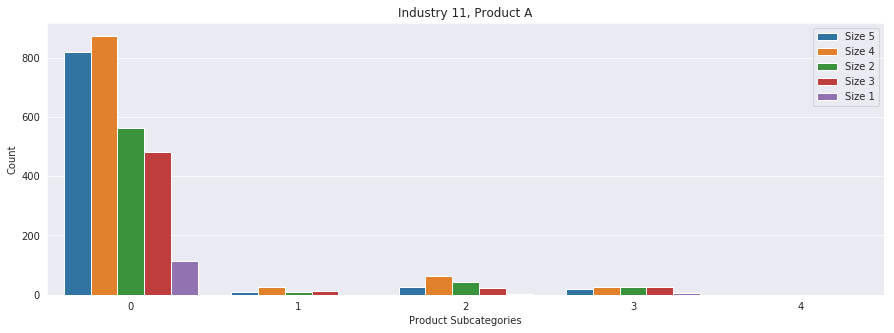

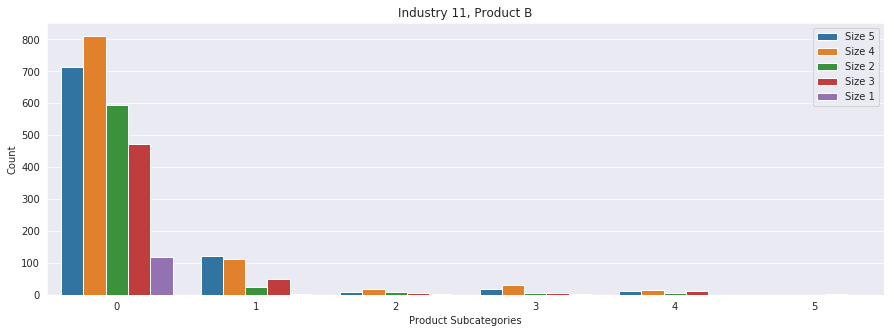

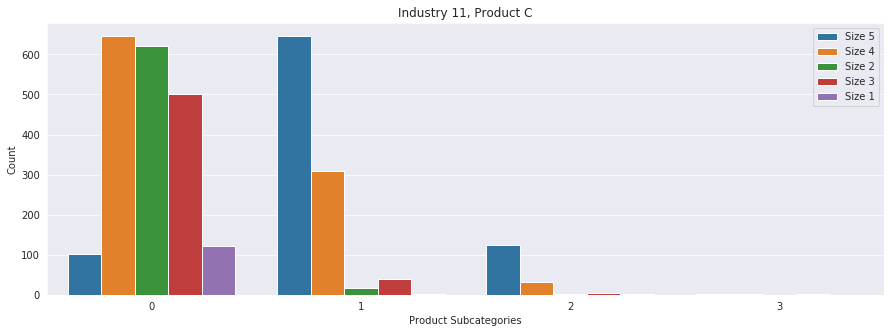

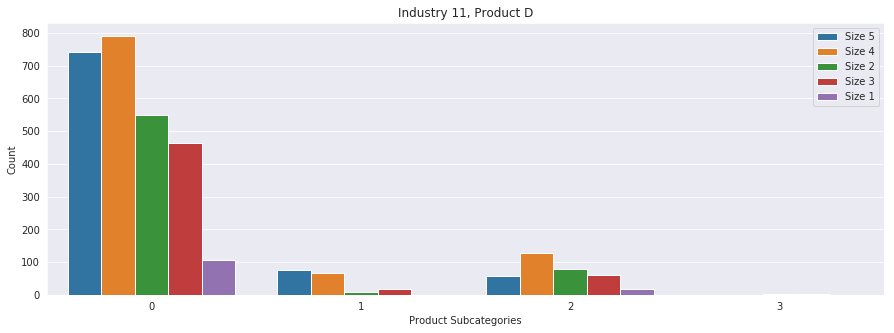

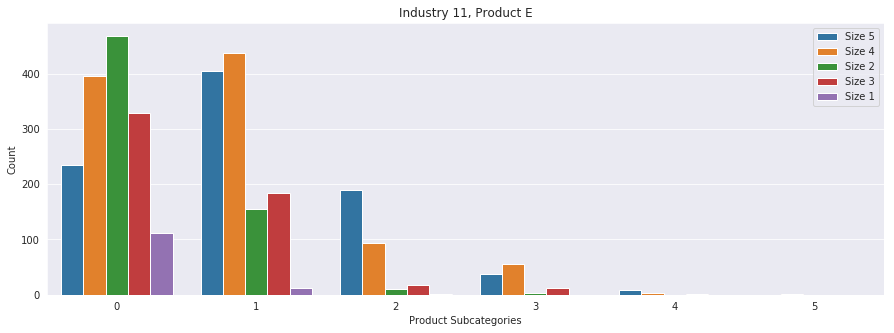

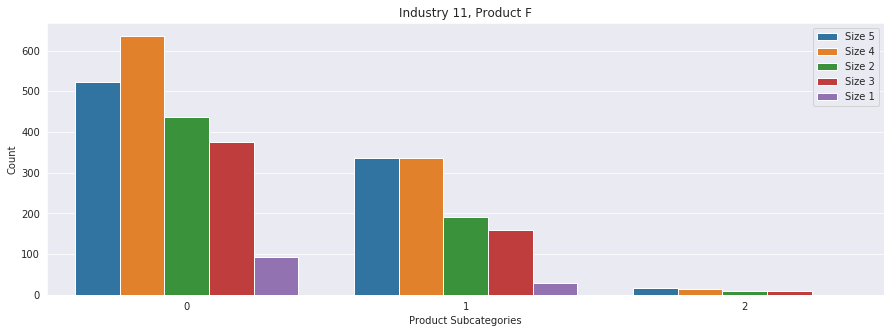

In [49]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(test11['A'], data= test11, hue= test11['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 11, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test11['B'], data= test11, hue= test11['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 11, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test11['C'], data= test11, hue= test11['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 11, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test11['D'], data= test11, hue= test11['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 11, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test11['E'], data= test11, hue= test11['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 11, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test11['F'], data= test11, hue= test11['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 11, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 683
The sum number of the product B: 759
The sum number of the product C: 1353
The sum number of the product D: 861
The sum number of the product E: 2207
The sum number of the product F: 1154
3168 clients
[('A', 683), ('B', 759), ('D', 861), ('F', 1154), ('C', 1353), ('E', 2207)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Industry 11')]

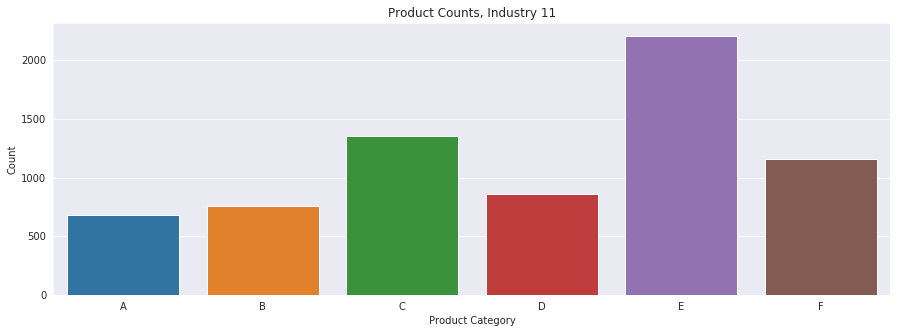

In [101]:
print("The sum number of the product A:" ,sum(test11['A']))
print("The sum number of the product B:" ,sum(test11['B']))
print("The sum number of the product C:" ,sum(test11['C']))
print("The sum number of the product D:" ,sum(test11['D']))
print("The sum number of the product E:" ,sum(test11['E']))
print("The sum number of the product F:" ,sum(test11['F']))
print(len(test11) , "clients")

industry_11_list = [('A', sum(test11['A'])), ('B', sum(test11['B'])), ('C',sum(test11['C'])),
             ('D',sum(test11['D'])), ('E',sum(test11['E'])), ('F',sum(test11['F']))]

sums = [sum(test11['A']), sum(test11['B']), sum(test11['C']), sum(test11['D']), sum(test11['E']), sum(test11['F'])]

def sort_by_sum(val): 
    return val[1]  

industry_11_list.sort(key=sort_by_sum)
print(industry_11_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Industry 11')

### Industry 11 --> clients more likely to buy products in category E and least likely to buy products in category A

## Industry 12

In [51]:
test12 = df.loc[df['Industry']=='Industry 12']

a = test12.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b=test12.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c=test12.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d=test12.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e=test12.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f=test12.iloc[:,39:41]
f['F'] = f.sum(axis=1)

test12['A'] = a['A']
test12['B'] = b['B']
test12['C'] = c['C']
test12['D'] = d['D']
test12['E'] = e['E']
test12['F'] = f['F']
test12.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
205372     207157   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
289852     292437   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
288199     290762   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
56495       56928   0   0   0   1   1   1   0   0   0   0   0   0   0   0   0   
229619     231727   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
205372   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
289852   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
288199   0   0   0   0   0   0   0   0   0   0   0    0    0    0    1   0   
56495    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
229619   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2     Industry Rep.Level    Size  A  \
205372   0   0   0   0   0   0   0   0   0  Industry 12   Level 5  Size 2  0   
289852   0   0   0   0   0   0   0   0   0  Industry 12   Level 4  Size 3  0   
288199   0   0   0   0   0   0   0   0   0  Industry 12   Level 5  Size 4  0   
56495    0   0   0   0   0   0   0   0   0  Industry 12   Level 4  Size 4  3   
229619   0   0   0   0   0   0   0   0   0  Industry 12   Level 5  Size 1  0   

        B  C  D  E  F  
205372  0  0  0  0  0  
289852  0  0  0  0  0  
288199  0  0  0  1  0  
56495   0  0  0  0  0  
229619  0  0  0  0  0

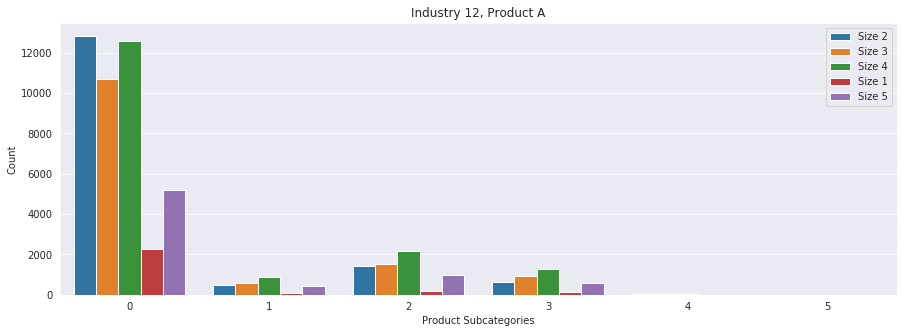

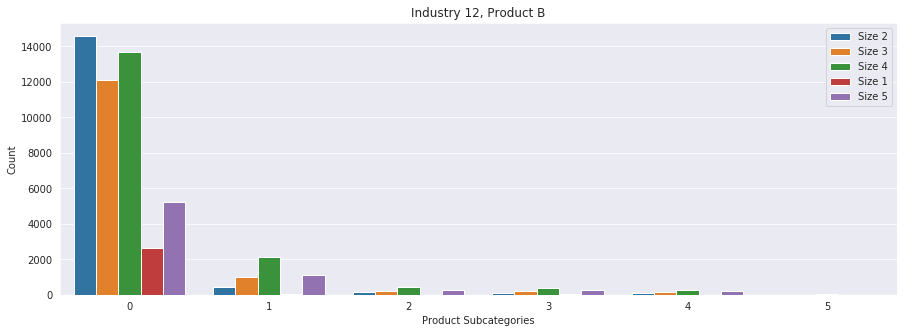

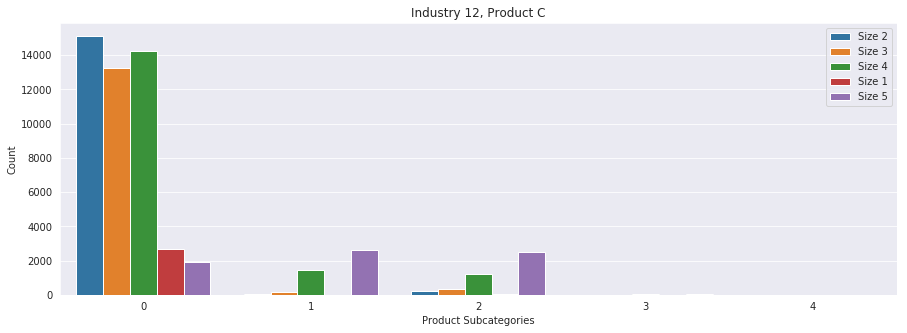

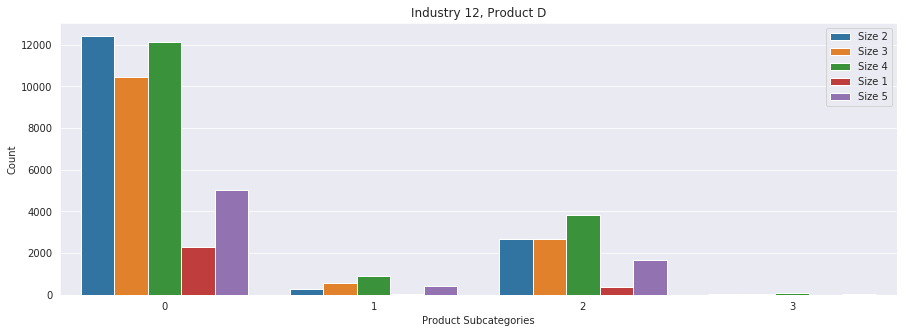

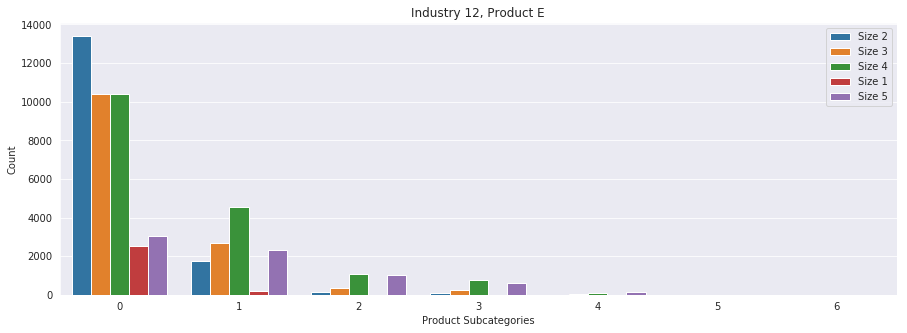

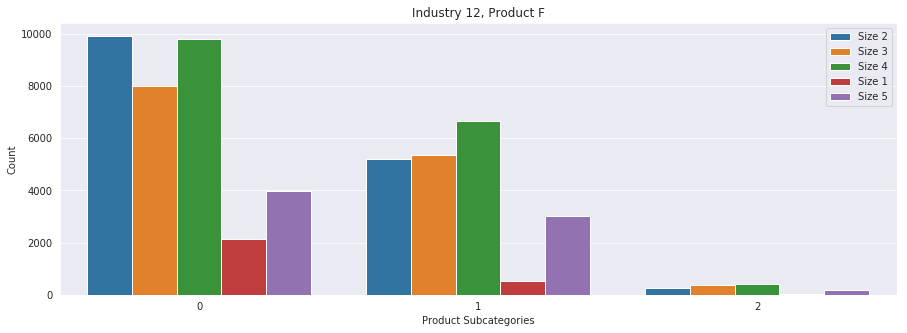

In [52]:
plt.figure(figsize=(15,5))
ax = sns.countplot(test12['A'], data= test12, hue= test12['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 12, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test12['B'], data= test12, hue= test12['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 12, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test12['C'], data= test12, hue= test12['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 12, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test12['D'], data= test12, hue= test12['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 12, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test12['E'], data= test12, hue= test12['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 12, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test12['F'], data= test12, hue= test12['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 12, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 25896
The sum number of the product B: 13116
The sum number of the product C: 13159
The sum number of the product D: 25195
The sum number of the product E: 23352
The sum number of the product F: 23311
[('B', 13116), ('C', 13159), ('F', 23311), ('E', 23352), ('D', 25195), ('A', 25896)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Industry 12')]

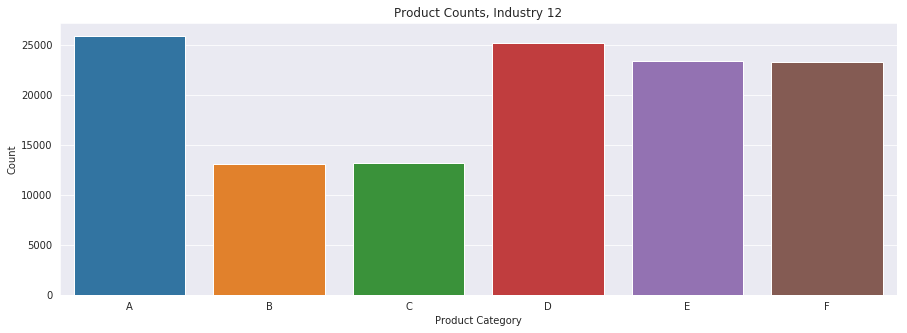

In [102]:
print("The sum number of the product A:" ,sum(test12['A']))
print("The sum number of the product B:" ,sum(test12['B']))
print("The sum number of the product C:" ,sum(test12['C']))
print("The sum number of the product D:" ,sum(test12['D']))
print("The sum number of the product E:" ,sum(test12['E']))
print("The sum number of the product F:" ,sum(test12['F']))

industry_12_list = [('A', sum(test12['A'])), ('B', sum(test12['B'])), ('C',sum(test12['C'])),
             ('D',sum(test12['D'])), ('E',sum(test12['E'])), ('F',sum(test12['F']))]
sums = [sum(test12['A']), sum(test12['B']), sum(test12['C']), sum(test12['D']), sum(test12['E']), sum(test12['F'])]

def sort_by_sum(val): 
    return val[1]  

industry_12_list.sort(key=sort_by_sum)
print(industry_12_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Industry 12')

### Industry 12 --> clients most likely to buy products from category A and least likely to buy products from category B

## Industry 13

In [54]:
test13 = df.loc[df['Industry']=='Industry 13']

a = test13.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b=test13.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c=test13.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d=test13.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e=test13.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f=test13.iloc[:,39:41]
f['F'] = f.sum(axis=1)

test13['A'] = a['A']
test13['B'] = b['B']
test13['C'] = c['C']
test13['D'] = d['D']
test13['E'] = e['E']
test13['F'] = f['F']
test13.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
217919     219901   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
364085     367427   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
342789     345775   0   0   0   0   0   0   0   0   1   1   1   0   0   0   1   
343153     346139   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
382440     386011   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
217919   0   0   0   0   0   0   0   1   1   0   0    0    0    0    1   0   
364085   1   0   0   0   0   0   0   1   1   0   1    0    0    0    0   0   
342789   1   1   0   0   1   0   0   0   1   0   1    0    0    0    1   0   
343153   1   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
382440   1   0   0   0   0   0   0   1   1   0   0    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2     Industry Rep.Level    Size  A  \
217919   0   0   0   0   0   0   0   0   0  Industry 13   Level 2  Size 4  0   
364085   1   0   1   0   0   0   0   0   0  Industry 13   Unknown  Size 4  0   
342789   0   0   0   0   1   0   0   0   1  Industry 13   Level 1  Size 3  1   
343153   0   0   0   0   0   0   0   0   0  Industry 13   Level 1  Size 4  0   
382440   0   0   0   0   0   0   0   0   1  Industry 13   Unknown  Size 5  1   

        B  C  D  E  F  
217919  0  0  2  1  0  
364085  0  1  2  3  0  
342789  3  3  1  3  1  
343153  0  1  0  0  0  
382440  0  1  2  0  1

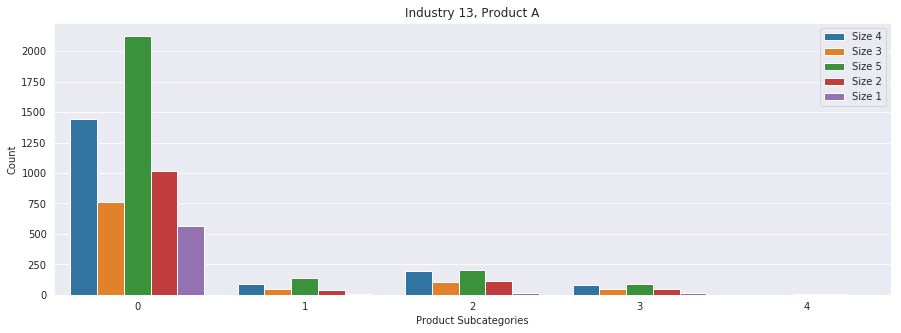

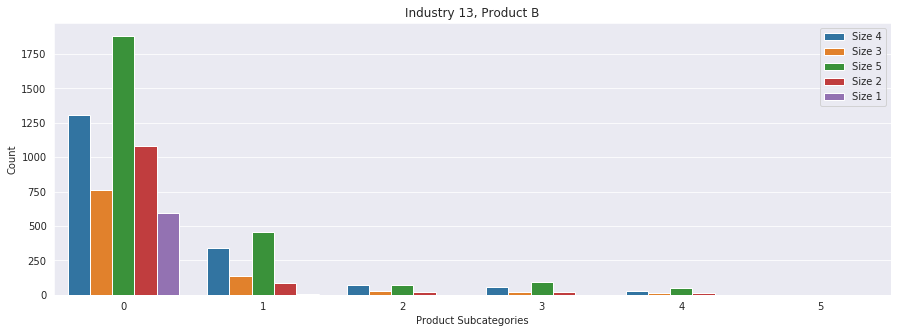

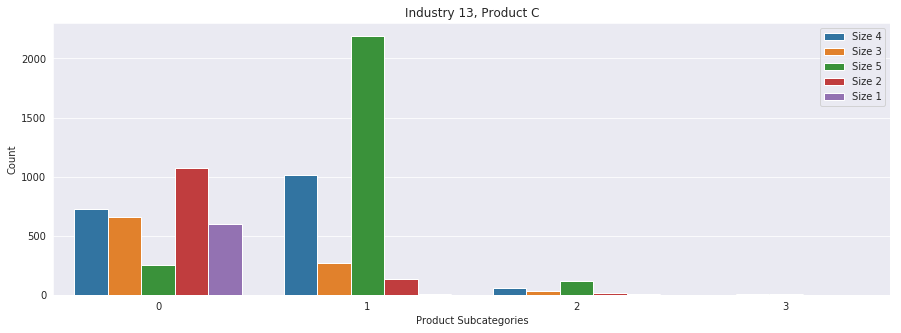

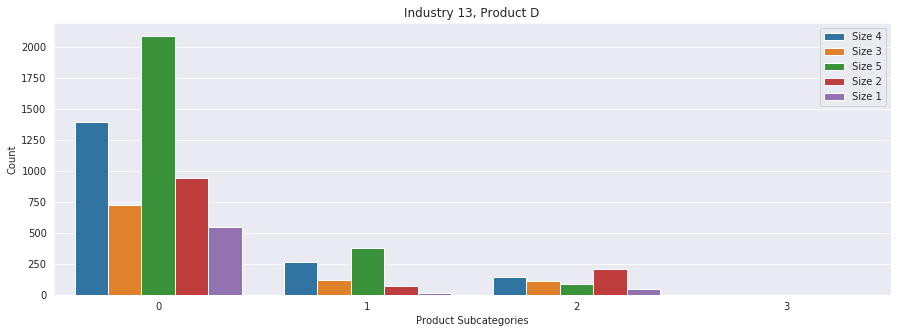

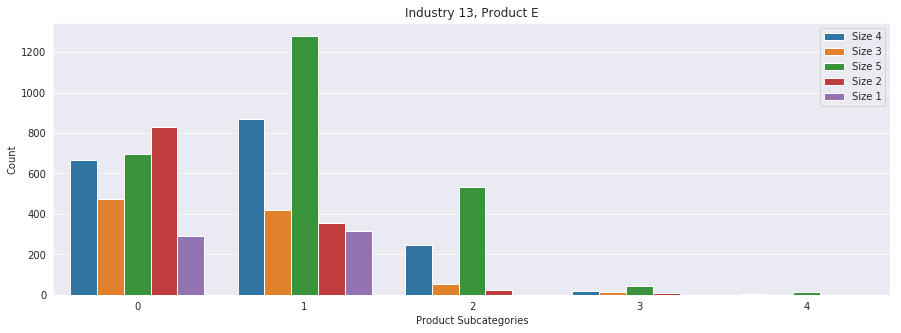

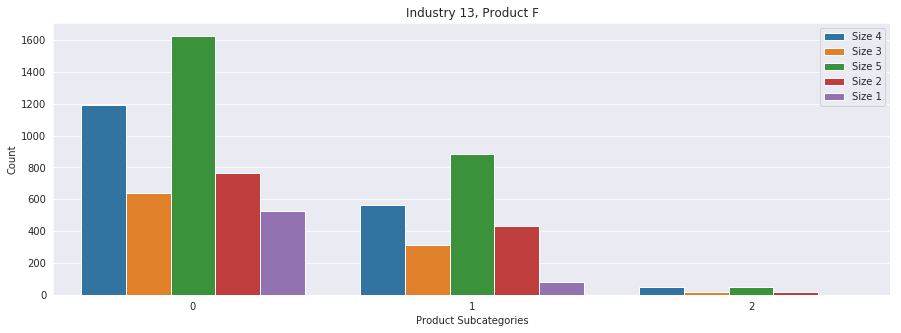

In [55]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(test13['A'], data= test13, hue= test13['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 13, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test13['B'], data= test13, hue= test13['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 13, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test13['C'], data= test13, hue= test13['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 13, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test13['D'], data= test13, hue= test13['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 13, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test13['E'], data= test13, hue= test13['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 13, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(test13['F'], data= test13, hue= test13['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Industry 13, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 2462
The sum number of the product B: 2417
The sum number of the product C: 4086
The sum number of the product D: 2077
The sum number of the product E: 5271
The sum number of the product F: 2533
[('D', 2077), ('B', 2417), ('A', 2462), ('F', 2533), ('C', 4086), ('E', 5271)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Industry 13')]

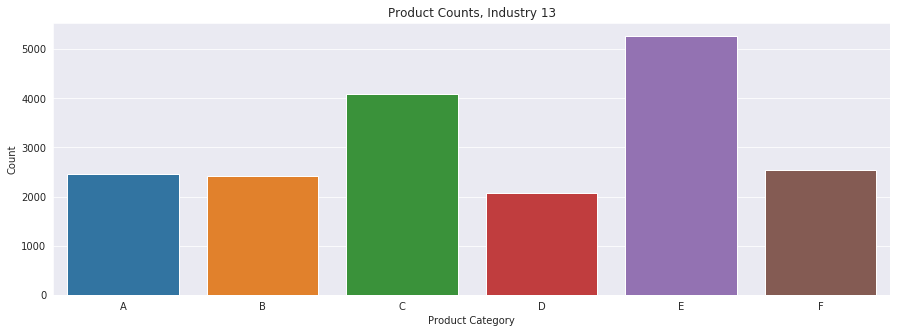

In [103]:
print("The sum number of the product A:" ,sum(test13['A']))
print("The sum number of the product B:" ,sum(test13['B']))
print("The sum number of the product C:" ,sum(test13['C']))
print("The sum number of the product D:" ,sum(test13['D']))
print("The sum number of the product E:" ,sum(test13['E']))
print("The sum number of the product F:" ,sum(test13['F']))

industry_13_list = [('A', sum(test13['A'])), ('B', sum(test13['B'])), ('C',sum(test13['C'])),
             ('D',sum(test13['D'])), ('E',sum(test13['E'])), ('F',sum(test13['F']))]

sums = [sum(test13['A']), sum(test13['B']), sum(test13['C']), sum(test13['D']), sum(test13['E']), sum(test13['F'])]

def sort_by_sum(val): 
    return val[1]  

industry_13_list.sort(key=sort_by_sum)
print(industry_13_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Industry 13')

### Industry 13 --> clients most likely to buy products from category E and least likely to buy products from category D

# Analysis by Size
#### 1. Subset the data by Size 
#### 2. Find the sum of low-level products to get sum for each high level product
#### 3. We can see how many high level products each client has based on size (hue is Industry) 

## Size 1

In [57]:
size1 = df.loc[df['Size']=='Size 1']

a = size1.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b=size1.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c=size1.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d=size1.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e=size1.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f=size1.iloc[:,39:41]
f['F'] = f.sum(axis=1)

size1['A'] = a['A']
size1['B'] = b['B']
size1['C'] = c['C']
size1['D'] = d['D']
size1['E'] = e['E']
size1['F'] = f['F']
size1.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
271013     273455   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
270980     273422   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
270963     273405   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
74420       75013   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
153864     155196   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
271013   0   0   0   0   0   0   0   0   0   0   0    0    0    0    1   0   
270980   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
270963   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
74420    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
153864   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
271013   0   0   0   0   0   0   0   0   0  Industry 1   Level 4  Size 1  0   
270980   0   0   0   0   0   0   0   0   0  Industry 1   Level 5  Size 1  0   
270963   0   0   0   0   0   0   0   0   0  Industry 1   Level 4  Size 1  0   
74420    0   0   0   0   0   0   0   0   0  Industry 1   Level 4  Size 1  0   
153864   0   0   0   0   0   0   0   0   0  Industry 1   Level 5  Size 1  0   

        B  C  D  E  F  
271013  0  0  0  1  0  
270980  0  0  0  0  0  
270963  0  0  0  0  0  
74420   0  0  0  0  0  
153864  0  0  0  0  0

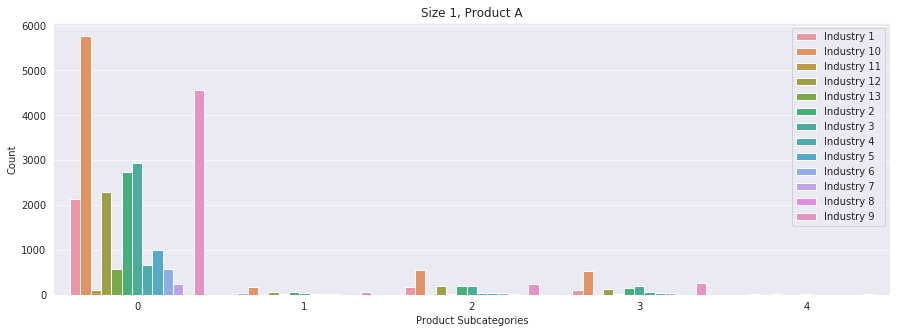

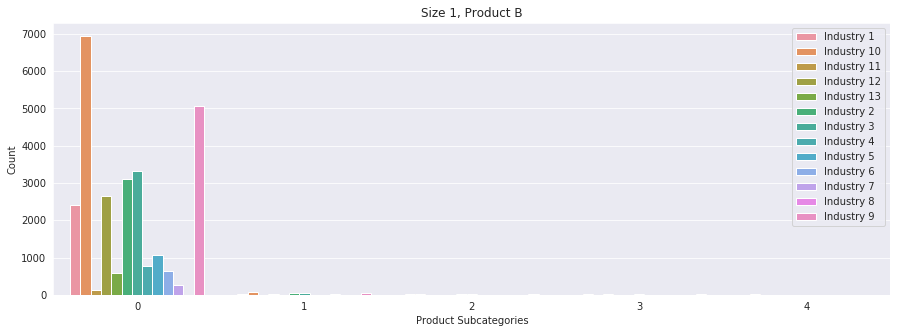

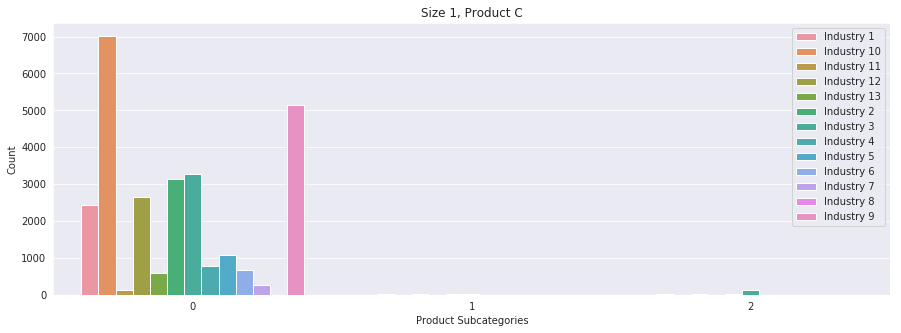

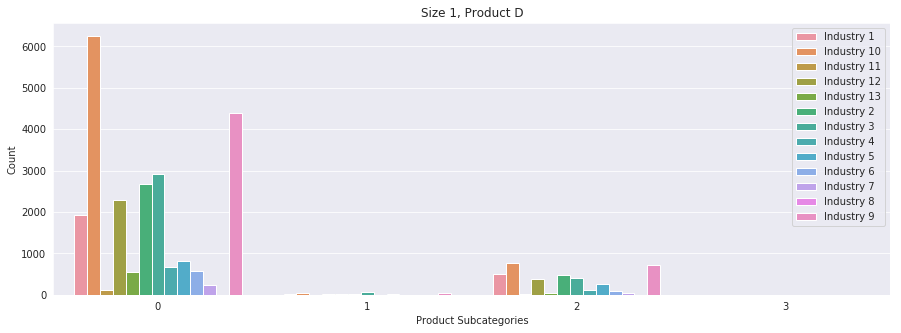

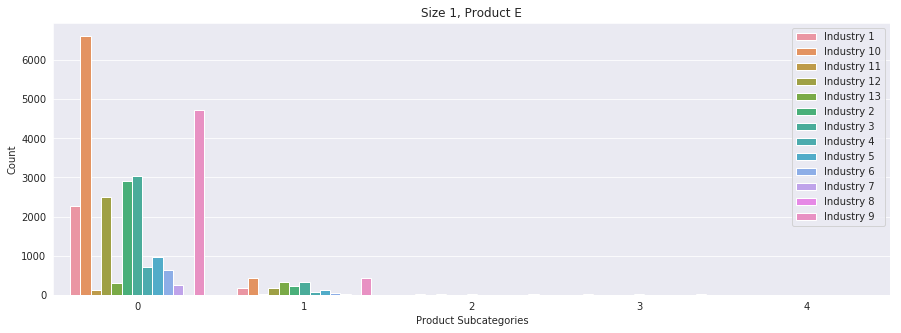

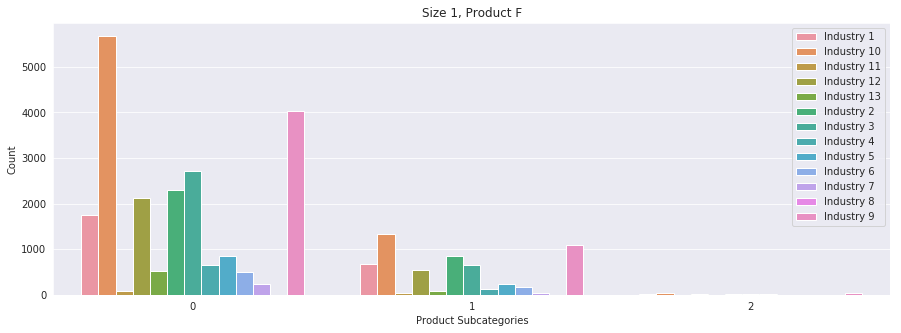

In [58]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(size1['A'], data= size1, hue= size1['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 1, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size1['B'], data= size1, hue= size1['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 1, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size1['C'], data= size1, hue= size1['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 1, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size1['D'], data= size1, hue= size1['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 1, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size1['E'], data= size1, hue= size1['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 1, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size1['F'], data= size1, hue= size1['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 1, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 8975
The sum number of the product B: 785
The sum number of the product C: 531
The sum number of the product D: 7917
The sum number of the product E: 2609
The sum number of the product F: 6208
[('C', 531), ('B', 785), ('E', 2609), ('F', 6208), ('D', 7917), ('A', 8975)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Size 1')]

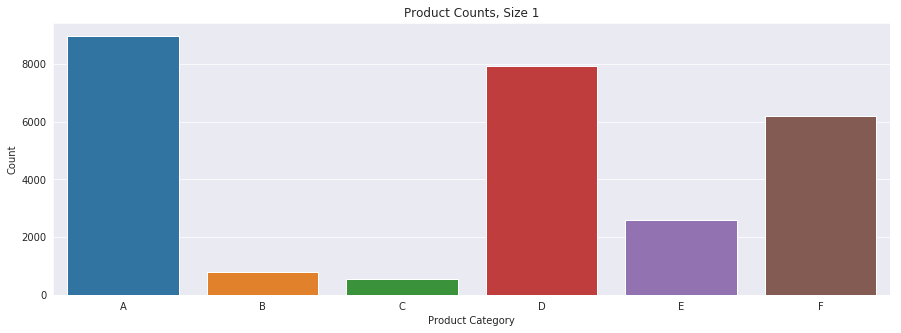

In [104]:
print("The sum number of the product A:" ,sum(size1['A']))
print("The sum number of the product B:" ,sum(size1['B']))
print("The sum number of the product C:" ,sum(size1['C']))
print("The sum number of the product D:" ,sum(size1['D']))
print("The sum number of the product E:" ,sum(size1['E']))
print("The sum number of the product F:" ,sum(size1['F']))

size_1_list = [('A', sum(size1['A'])), ('B', sum(size1['B'])), ('C',sum(size1['C'])),
             ('D',sum(size1['D'])), ('E',sum(size1['E'])), ('F',sum(size1['F']))]

sums = [sum(size1['A']), sum(size1['B']), sum(size1['C']), sum(size1['D']), sum(size1['E']), sum(size1['F'])]

def sort_by_sum(val): 
    return val[1]  

size_1_list.sort(key=sort_by_sum)
print(size_1_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Size 1')

### Clients who have a company of Size 1 are more likely to buy products in category A and least likely to buy products in category C

## Size 2 

In [60]:
size2 = df.loc[df['Size']=='Size 2']

a = size2.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b=size2.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c=size2.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d=size2.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e=size2.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f=size2.iloc[:,39:41]
f['F'] = f.sum(axis=1)

size2['A'] = a['A']
size2['B'] = b['B']
size2['C'] = c['C']
size2['D'] = d['D']
size2['E'] = e['E']
size2['F'] = f['F']
size2.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
153807     155135   1   0   0   1   1   0   0   0   0   0   0   0   0   0   0   
74437       75030   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   
153812     155141   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
153816     155145   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
153820     155149   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
153807   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
74437    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
153812   0   0   0   0   0   0   0   1   1   0   0    0    0    0    0   0   
153816   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
153820   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
153807   0   0   0   0   0   0   0   1   0  Industry 1   Level 4  Size 2  3   
74437    0   0   0   0   0   0   0   0   1  Industry 1   Level 4  Size 2  0   
153812   0   0   0   0   0   0   0   0   0  Industry 1   Level 4  Size 2  0   
153816   0   0   0   0   0   0   0   1   0  Industry 1   Level 4  Size 2  0   
153820   0   0   0   0   0   0   0   0   0  Industry 1   Level 5  Size 2  0   

        B  C  D  E  F  
153807  0  0  0  0  1  
74437   2  0  0  0  1  
153812  0  0  2  0  0  
153816  0  0  0  0  1  
153820  0  0  0  0  0

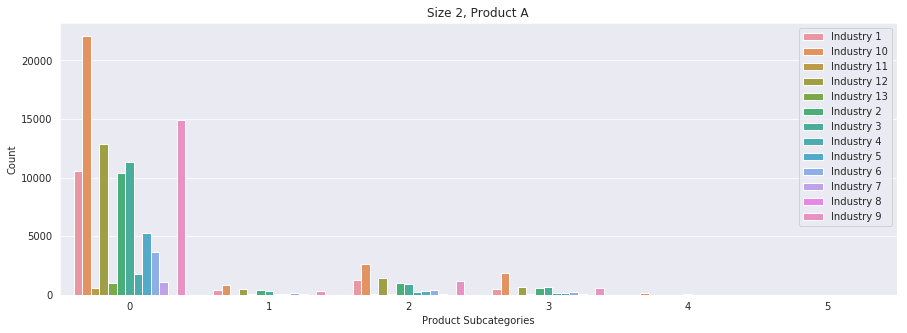

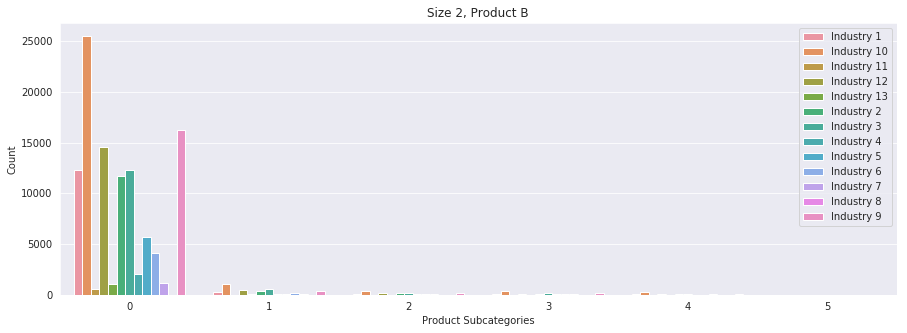

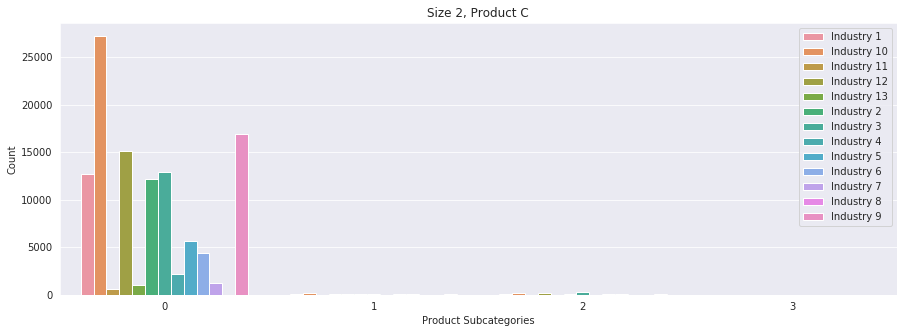

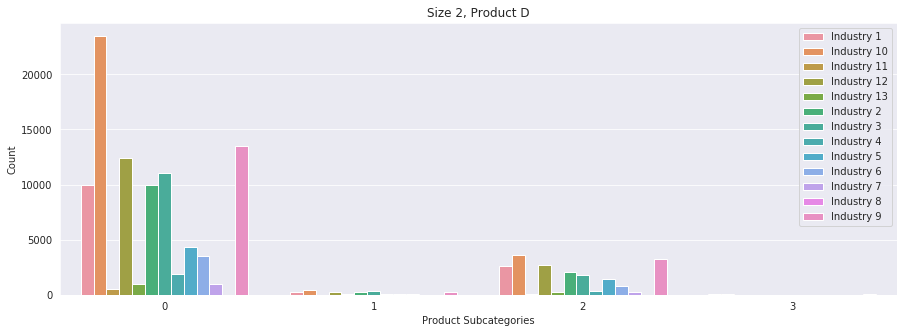

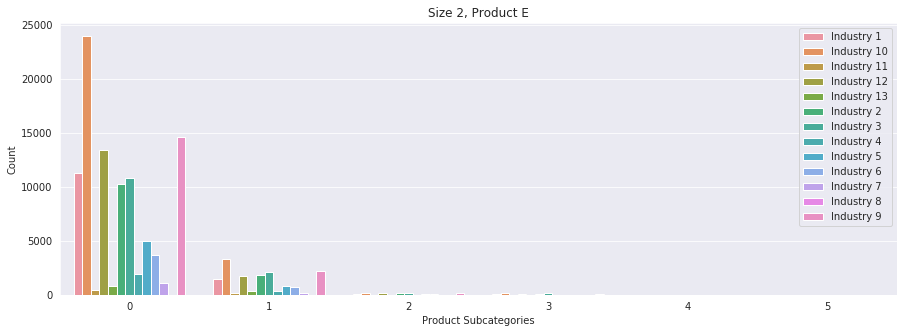

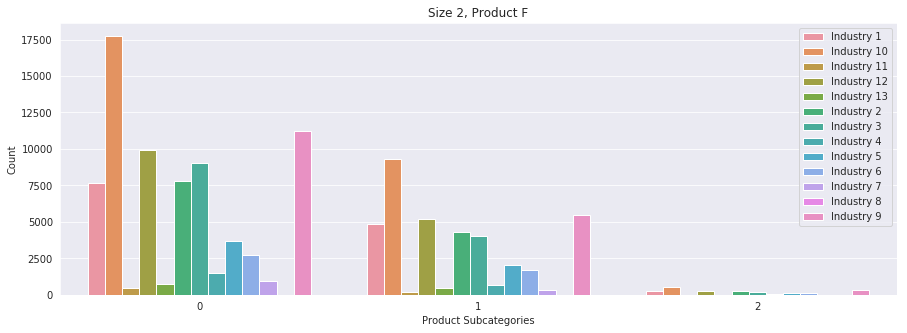

In [61]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(size2['A'], data= size2, hue= size2['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 2, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size2['B'], data= size2, hue= size2['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 2, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size2['C'], data= size2, hue= size2['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 2, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size2['D'], data= size2, hue= size2['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 2, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size2['E'], data= size2, hue= size2['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 2, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size2['F'], data= size2, hue= size2['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 2, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 40100
The sum number of the product B: 12563
The sum number of the product C: 3230
The sum number of the product D: 41033
The sum number of the product E: 19693
The sum number of the product F: 42815
[('C', 3230), ('B', 12563), ('E', 19693), ('A', 40100), ('D', 41033), ('F', 42815)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Size 2')]

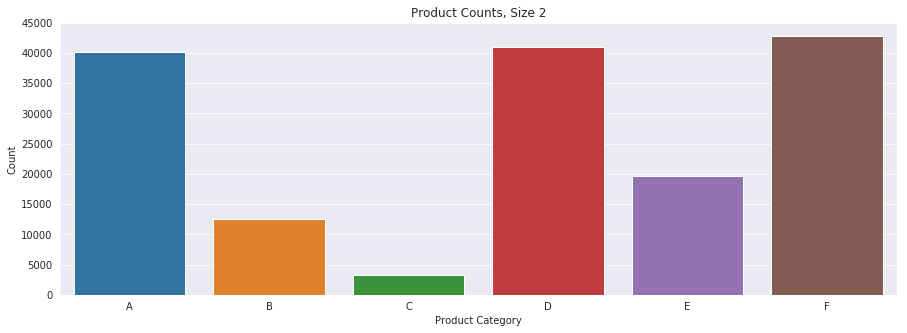

In [105]:
print("The sum number of the product A:" ,sum(size2['A']))
print("The sum number of the product B:" ,sum(size2['B']))
print("The sum number of the product C:" ,sum(size2['C']))
print("The sum number of the product D:" ,sum(size2['D']))
print("The sum number of the product E:" ,sum(size2['E']))
print("The sum number of the product F:" ,sum(size2['F']))

size_2_list = [('A', sum(size2['A'])), ('B', sum(size2['B'])), ('C',sum(size2['C'])),
             ('D',sum(size2['D'])), ('E',sum(size2['E'])), ('F',sum(size2['F']))]

sums = [sum(size2['A']), sum(size2['B']), sum(size2['C']), sum(size2['D']), sum(size2['E']), sum(size2['F'])]

def sort_by_sum(val): 
    return val[1]  

size_2_list.sort(key=sort_by_sum)
print(size_2_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Size 2')

### Clients who have a company of Size 2 are more likely to buy products in category F and least likely to buy products in category C

## Size 3

In [63]:
size3 = df.loc[df['Size']=='Size 3']

a = size3.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b=size3.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c=size3.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d=size3.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e=size3.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f=size3.iloc[:,39:41]
f['F'] = f.sum(axis=1)

size3['A'] = a['A']
size3['B'] = b['B']
size3['C'] = c['C']
size3['D'] = d['D']
size3['E'] = e['E']
size3['F'] = f['F']
size3.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
96161       96949   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
74440       75033   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
271010     273452   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
74431       75024   0   0   0   0   0   0   0   0   0   1   1   1   0   0   0   
74430       75023   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
96161    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
74440    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
271010   0   0   0   0   0   0   0   0   0   0   0    0    0    0    1   0   
74431    0   0   0   0   0   0   0   1   1   0   0    0    0    0    0   0   
74430    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
96161    0   0   0   0   0   0   0   0   0  Industry 1   Level 5  Size 3  0   
74440    0   0   0   0   0   0   0   0   1  Industry 1   Level 4  Size 3  0   
271010   0   0   0   0   0   0   0   0   0  Industry 1   Level 4  Size 3  0   
74431    0   0   0   0   0   0   0   0   1  Industry 1   Level 4  Size 3  0   
74430    0   0   0   0   0   0   0   0   1  Industry 1   Level 4  Size 3  0   

        B  C  D  E  F  
96161   0  0  0  0  0  
74440   0  0  0  0  1  
271010  0  0  0  1  0  
74431   3  0  2  0  1  
74430   0  0  0  0  1

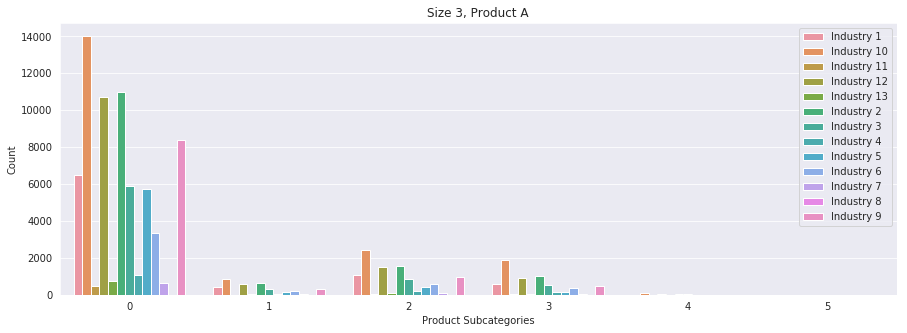

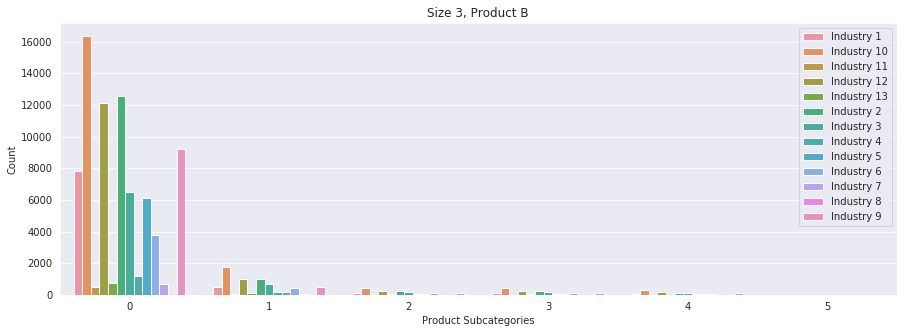

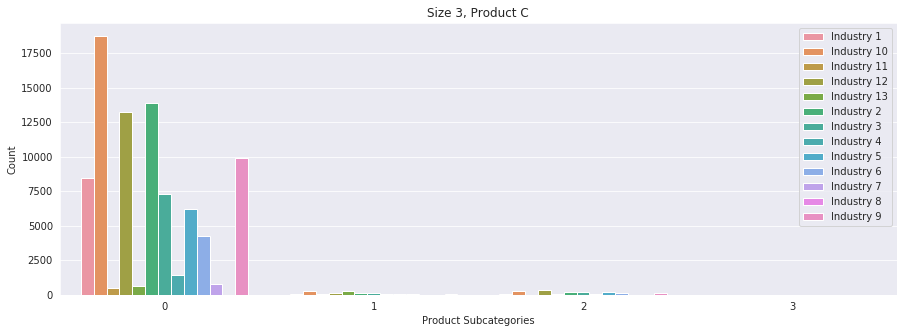

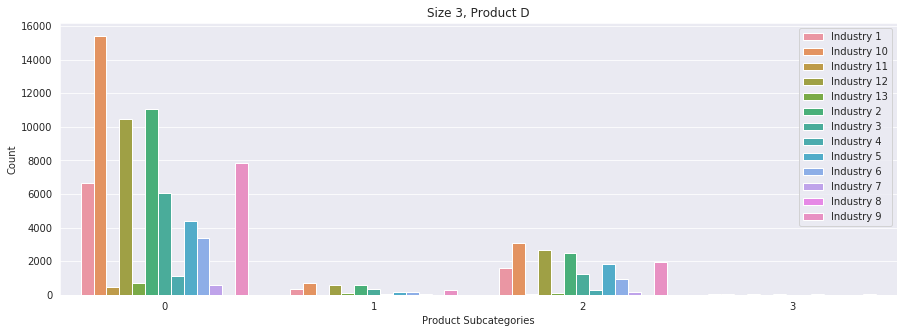

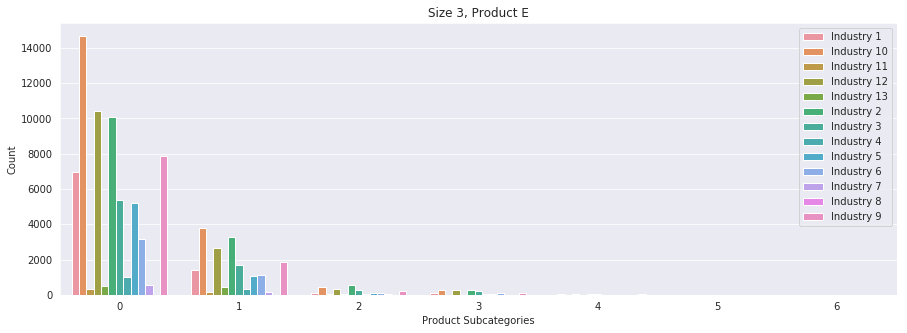

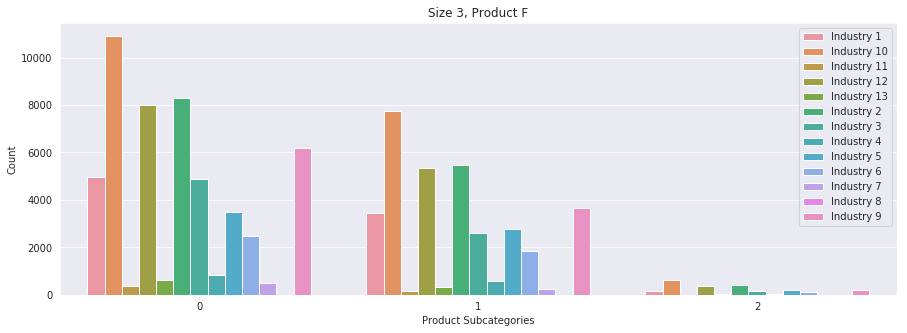

In [64]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(size3['A'], data= size3, hue= size3['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 3, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size3['B'], data= size3, hue= size3['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 3, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size3['C'], data= size3, hue= size3['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 3, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size3['D'], data= size3, hue= size3['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 3, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size3['E'], data= size3, hue= size3['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 3, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size3['F'], data= size3, hue= size3['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 3, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 42172
The sum number of the product B: 18139
The sum number of the product C: 4427
The sum number of the product D: 36971
The sum number of the product E: 27762
The sum number of the product F: 38932
[('C', 4427), ('B', 18139), ('E', 27762), ('D', 36971), ('F', 38932), ('A', 42172)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Size 3')]

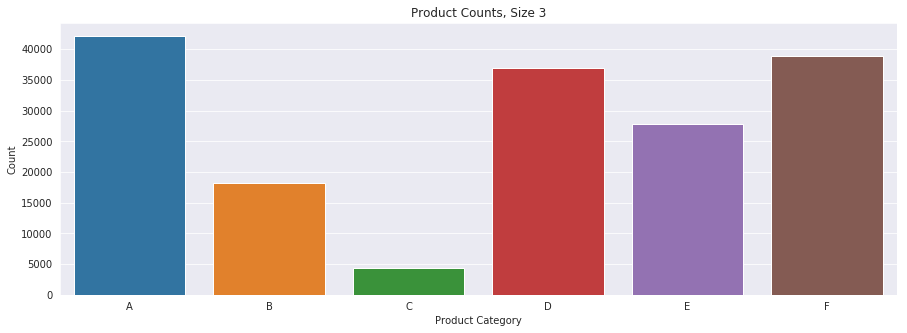

In [106]:
print("The sum number of the product A:" ,sum(size3['A']))
print("The sum number of the product B:" ,sum(size3['B']))
print("The sum number of the product C:" ,sum(size3['C']))
print("The sum number of the product D:" ,sum(size3['D']))
print("The sum number of the product E:" ,sum(size3['E']))
print("The sum number of the product F:" ,sum(size3['F']))

size_3_list = [('A', sum(size3['A'])), ('B', sum(size3['B'])), ('C',sum(size3['C'])),
             ('D',sum(size3['D'])), ('E',sum(size3['E'])), ('F',sum(size3['F']))]

sums = [sum(size3['A']), sum(size3['B']), sum(size3['C']), sum(size3['D']), sum(size3['E']), sum(size3['F'])]

def sort_by_sum(val): 
    return val[1]  

size_3_list.sort(key=sort_by_sum)
print(size_3_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Size 3')

### Clients who have a company of Size 3 are more likely to buy products in category A and least likely to buy products in category C

## Size 4

In [66]:
size4 = df.loc[df['Size']=='Size 4']

a = size4.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b=size4.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c=size4.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d=size4.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e=size4.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f=size4.iloc[:,39:41]
f['F'] = f.sum(axis=1)

size4['A'] = a['A']
size4['B'] = b['B']
size4['C'] = c['C']
size4['D'] = d['D']
size4['E'] = e['E']
size4['F'] = f['F']
size4.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
34370       34624   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
271001     273443   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
74446       75039   0   0   0   1   1   0   0   0   0   0   0   1   0   0   0   
34331       34584   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
34332       34585   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
34370    0   0   0   0   0   0   0   0   0   0   0    0    0    0    1   0   
271001   0   0   0   0   0   0   0   1   1   0   0    0    0    0    1   0   
74446    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
34331    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
34332    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
34370    0   0   0   0   0   0   0   0   0  Industry 1   Level 2  Size 4  0   
271001   0   0   0   0   0   0   0   0   0  Industry 1   Level 4  Size 4  0   
74446    0   0   0   0   0   0   0   0   1  Industry 1   Level 4  Size 4  2   
34331    0   0   0   0   0   0   0   0   0  Industry 1   Level 5  Size 4  0   
34332    0   0   0   0   0   0   0   0   1  Industry 1   Level 4  Size 4  0   

        B  C  D  E  F  
34370   0  0  0  1  0  
271001  0  0  2  1  0  
74446   1  0  0  0  1  
34331   0  0  0  0  0  
34332   0  0  0  0  1

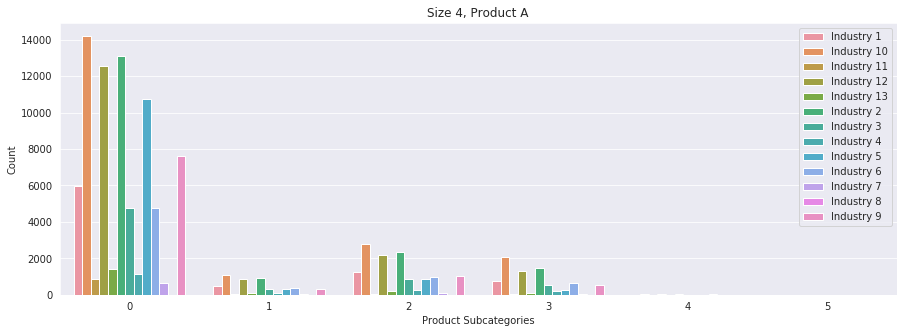

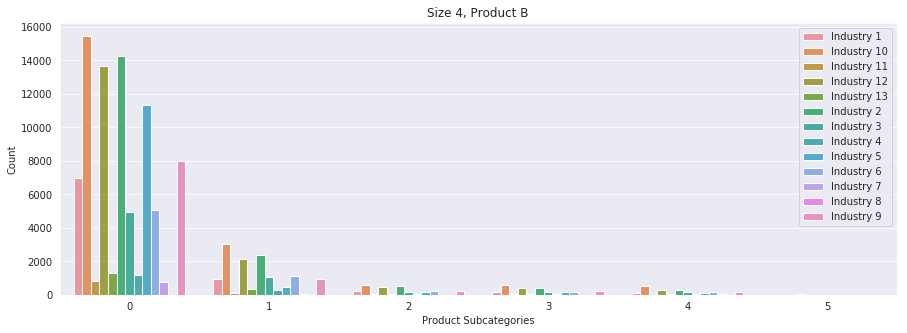

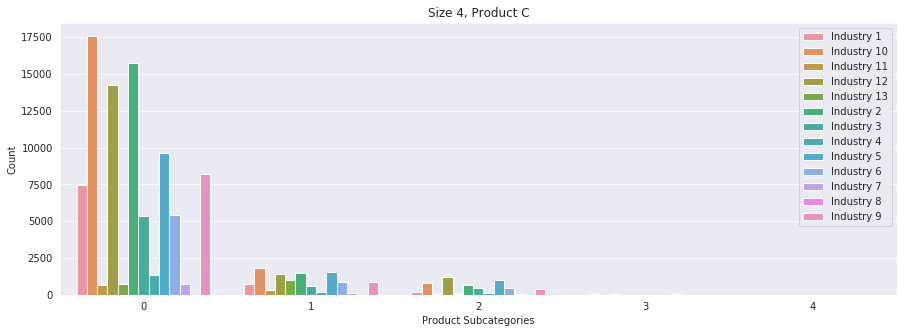

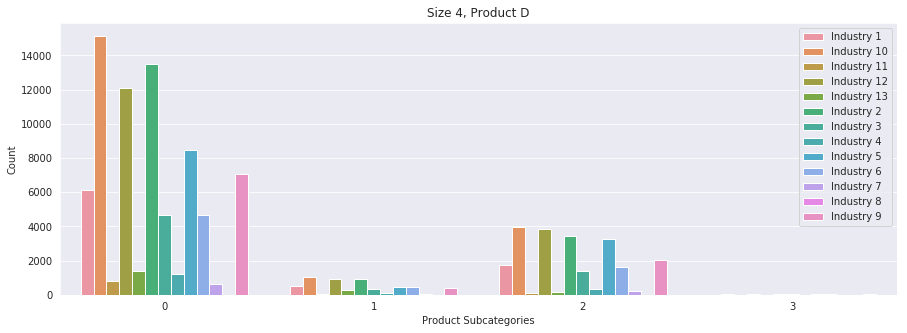

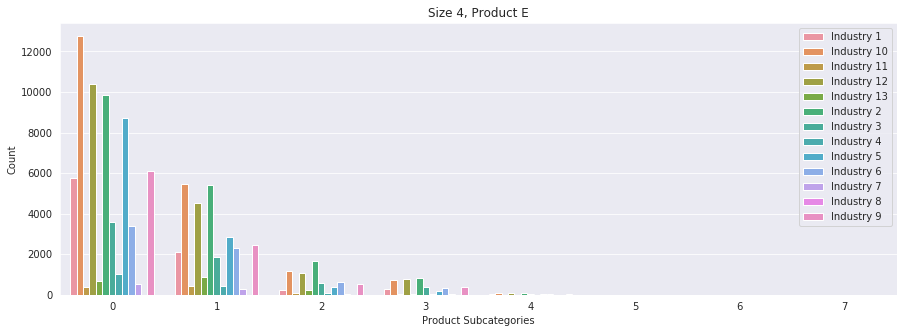

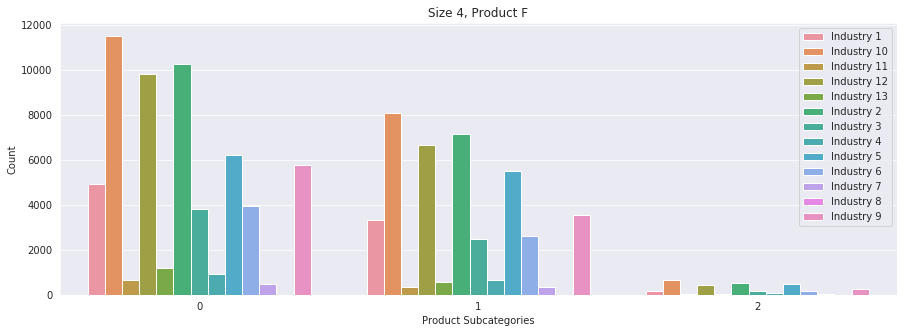

In [67]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(size4['A'], data= size4, hue= size4['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 4, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size4['B'], data= size4, hue= size4['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 4, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size4['C'], data= size4, hue= size4['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 4, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size4['D'], data= size4, hue= size4['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 4, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size4['E'], data= size4, hue= size4['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 4, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size4['F'], data= size4, hue= size4['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 4, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 54998
The sum number of the product B: 33375
The sum number of the product C: 22394
The sum number of the product D: 50806
The sum number of the product E: 57078
The sum number of the product F: 47196
[('C', 22394), ('B', 33375), ('F', 47196), ('D', 50806), ('A', 54998), ('E', 57078)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Size 4')]

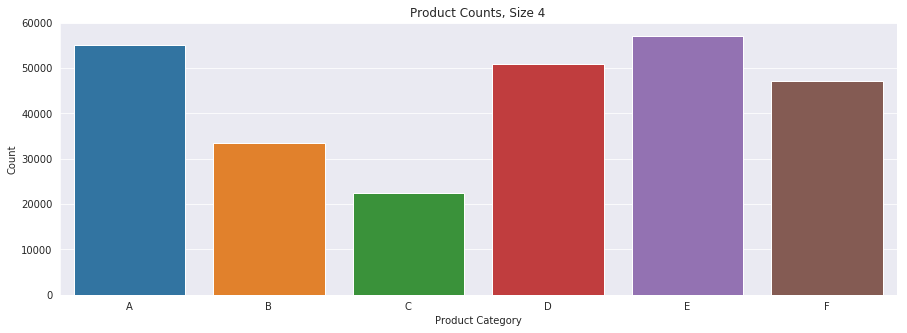

In [107]:
print("The sum number of the product A:" ,sum(size4['A']))
print("The sum number of the product B:" ,sum(size4['B']))
print("The sum number of the product C:" ,sum(size4['C']))
print("The sum number of the product D:" ,sum(size4['D']))
print("The sum number of the product E:" ,sum(size4['E']))
print("The sum number of the product F:" ,sum(size4['F']))

size_4_list = [('A', sum(size4['A'])), ('B', sum(size4['B'])), ('C',sum(size4['C'])),
             ('D',sum(size4['D'])), ('E',sum(size4['E'])), ('F',sum(size4['F']))]

sums = [sum(size4['A']), sum(size4['B']), sum(size4['C']), sum(size4['D']), sum(size4['E']), sum(size4['F'])]

def sort_by_sum(val): 
    return val[1]  

size_4_list.sort(key=sort_by_sum)
print(size_4_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Size 4')

### Clients who have a company of Size 4 are more likely to buy products in category E and least likely to buy products in category C

## Size 5

In [69]:
size5 = df.loc[df['Size']=='Size 5']

a = size5.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b=size5.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c=size5.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d=size5.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e=size5.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f=size5.iloc[:,39:41]
f['F'] = f.sum(axis=1)

size5['A'] = a['A']
size5['B'] = b['B']
size5['C'] = c['C']
size5['D'] = d['D']
size5['E'] = e['E']
size5['F'] = f['F']
size5.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
271122     273565   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
34299       34552   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
270218     272655   0   0   0   1   1   1   0   0   0   0   0   0   0   0   0   
153189     154511   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
153221     154545   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
271122   1   0   0   0   0   0   0   1   1   0   0    0    0    0    1   0   
34299    0   0   0   0   0   0   0   0   0   1   0    0    0    0    1   0   
270218   1   0   0   0   0   0   0   1   1   0   0    0    0    0    0   0   
153189   1   0   0   0   0   0   0   0   1   0   1    0    0    0    1   0   
153221   1   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
271122   0   0   0   0   0   0   0   0   0  Industry 1   Level 2  Size 5  0   
34299    0   0   0   0   0   0   0   1   0  Industry 1   Level 4  Size 5  0   
270218   0   0   0   0   0   0   0   0   0  Industry 1   Level 3  Size 5  3   
153189   0   0   0   0   0   0   0   0   1  Industry 1   Level 2  Size 5  0   
153221   0   0   0   0   0   0   0   1   0  Industry 1   Level 4  Size 5  0   

        B  C  D  E  F  
271122  0  1  2  1  0  
34299   0  0  1  1  1  
270218  0  1  2  0  0  
153189  0  1  1  2  1  
153221  0  1  0  0  1

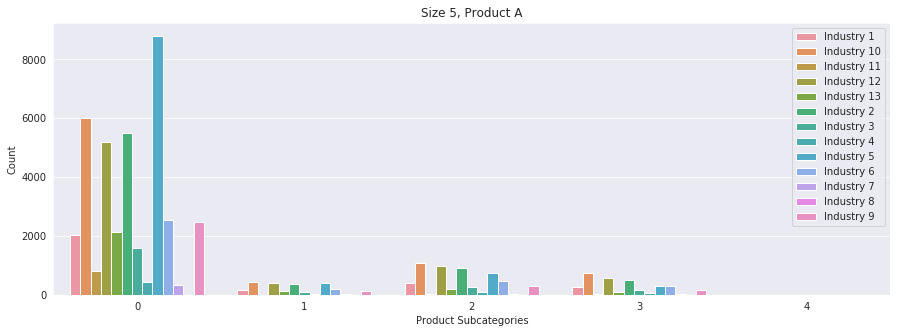

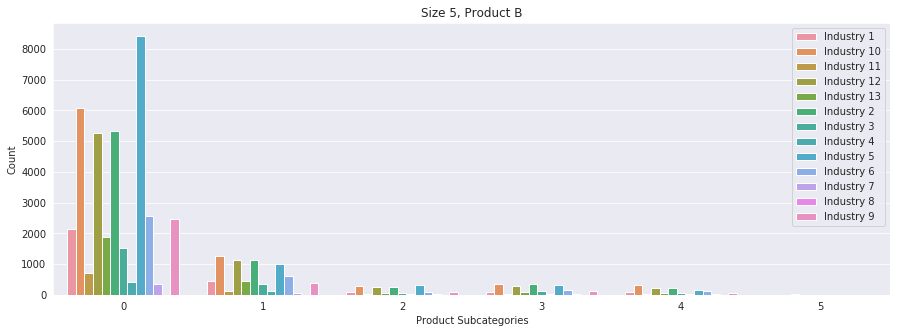

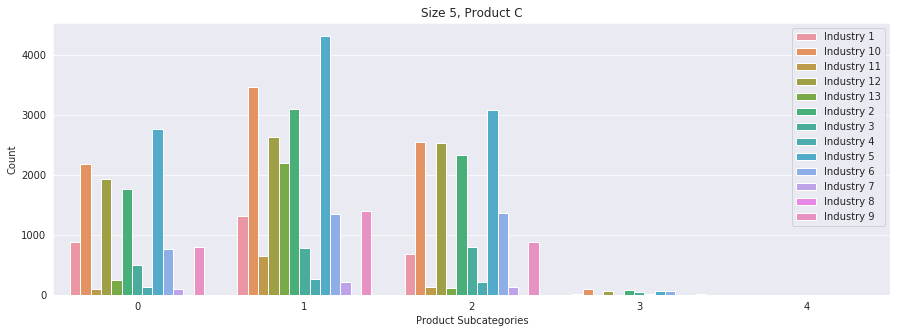

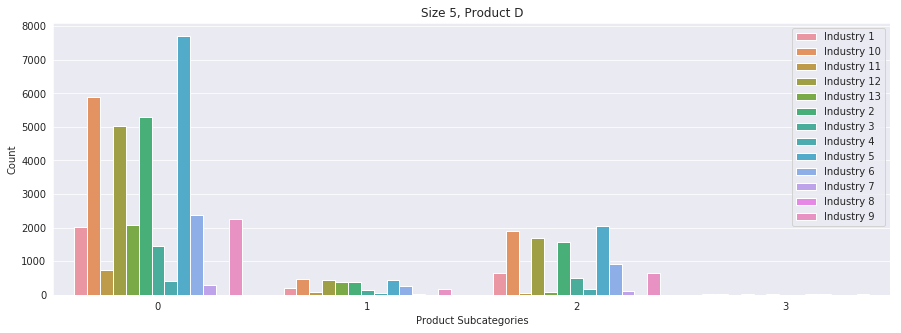

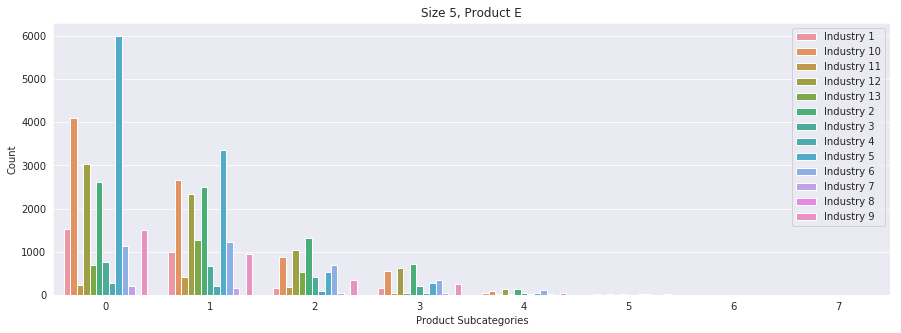

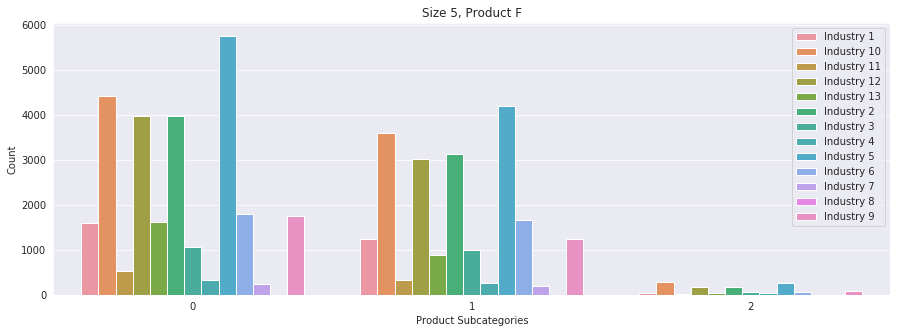

In [70]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(size5['A'], data= size5, hue= size5['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 5, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size5['B'], data= size5, hue= size5['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 5, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size5['C'], data= size5, hue= size5['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 5, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size5['D'], data= size5, hue= size5['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 5, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size5['E'], data= size5, hue= size5['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 5, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(size5['F'], data= size5, hue= size5['Industry'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Size 5, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 23250
The sum number of the product B: 21477
The sum number of the product C: 52592
The sum number of the product D: 24086
The sum number of the product E: 42222
The sum number of the product F: 23229
[('B', 21477), ('F', 23229), ('A', 23250), ('D', 24086), ('E', 42222), ('C', 52592)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Size 5')]

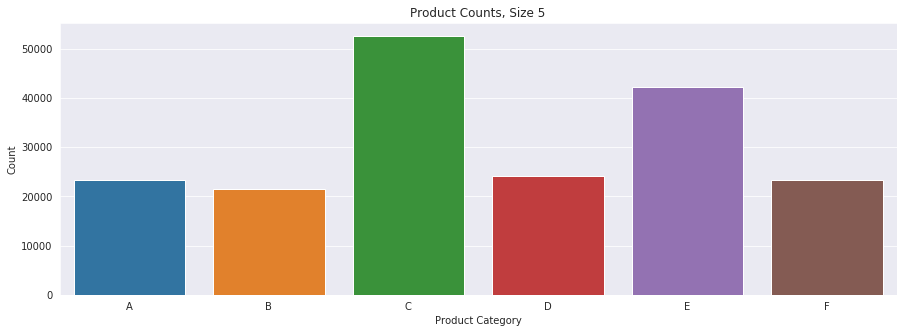

In [108]:
print("The sum number of the product A:" ,sum(size5['A']))
print("The sum number of the product B:" ,sum(size5['B']))
print("The sum number of the product C:" ,sum(size5['C']))
print("The sum number of the product D:" ,sum(size5['D']))
print("The sum number of the product E:" ,sum(size5['E']))
print("The sum number of the product F:" ,sum(size5['F']))

size_5_list = [('A', sum(size5['A'])), ('B', sum(size5['B'])), ('C',sum(size5['C'])),
             ('D',sum(size5['D'])), ('E',sum(size5['E'])), ('F',sum(size5['F']))]

sums = [sum(size5['A']), sum(size5['B']), sum(size5['C']), sum(size5['D']), sum(size5['E']), sum(size5['F'])]

def sort_by_sum(val): 
    return val[1]  

size_5_list.sort(key=sort_by_sum)
print(size_5_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Size 5')

### Clients who have a company of Size 5 are more likely to buy products in category C and least likely to buy products in category B

# Analysis by Representative Level
#### 1. Subset the data by Rep.Level
#### 2. Find the sum of low-level products to get sum for each high level product
#### 3. We can see how many high level products each client has based on Rep.Level (hue is Size) 

In [72]:
list(set(df["Rep.Level"]))

['Unknown', 'Level 2', 'Level 4', 'Level 1', 'Level 5', 'Level 3']

### Representative Level 1

In [73]:
rep1 = df.loc[df['Rep.Level']=='Level 1']

a = rep1.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b = rep1.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c = rep1.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d = rep1.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e = rep1.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f = rep1.iloc[:,39:41]
f['F'] = f.sum(axis=1)

rep1['A'] = a['A']
rep1['B'] = b['B']
rep1['C'] = c['C']
rep1['D'] = d['D']
rep1['E'] = e['E']
rep1['F'] = f['F']
rep1.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
340773     343750   0   0   0   1   1   1   0   0   0   0   0   1   0   0   0   
347155     350240   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
347162     350247   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
347164     350249   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   
347170     350256   0   0   0   1   1   1   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
340773   1   0   0   0   0   0   0   0   1   0   0    0    0    0    0   0   
347155   0   0   0   0   0   0   0   0   0   0   0    0    0    0    1   0   
347162   1   0   0   0   0   0   0   0   0   0   0    0    0    0    1   0   
347164   1   0   0   0   0   0   0   0   0   0   0    0    0    0    1   0   
347170   1   0   0   0   0   0   0   0   0   1   0    0    0    0    1   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
340773   0   0   0   0   0   0   0   0   1  Industry 1   Level 1  Size 5  3   
347155   0   0   0   0   0   0   0   0   0  Industry 1   Level 1  Size 3  0   
347162   0   0   0   0   0   0   0   0   1  Industry 1   Level 1  Size 4  0   
347164   0   0   0   0   0   0   0   0   1  Industry 1   Level 1  Size 5  2   
347170   0   0   0   0   0   0   0   0   1  Industry 1   Level 1  Size 4  3   

        B  C  D  E  F  
340773  1  1  1  0  1  
347155  0  0  0  1  0  
347162  0  1  0  1  1  
347164  0  1  0  1  1  
347170  0  1  1  1  1

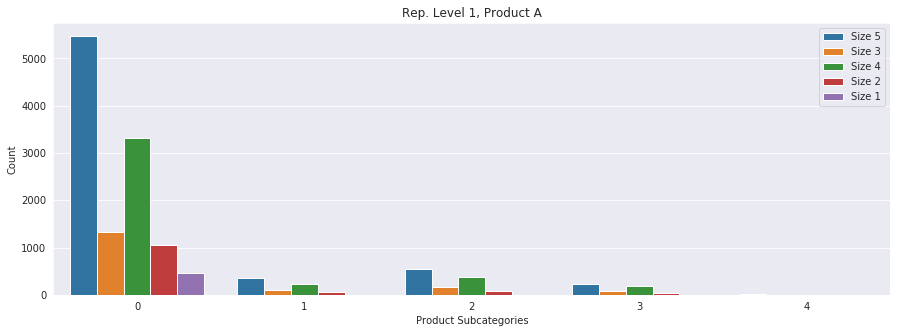

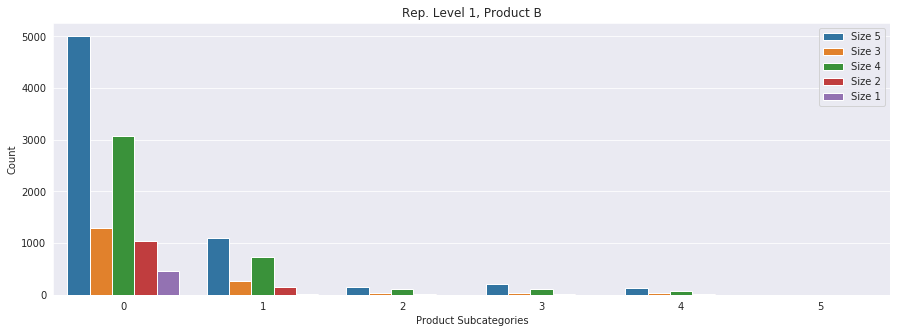

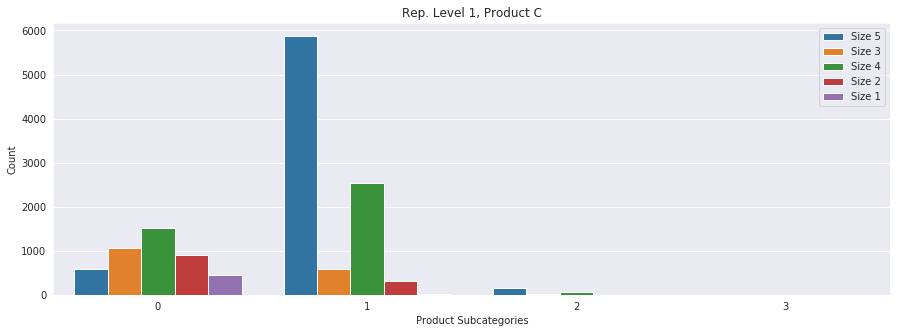

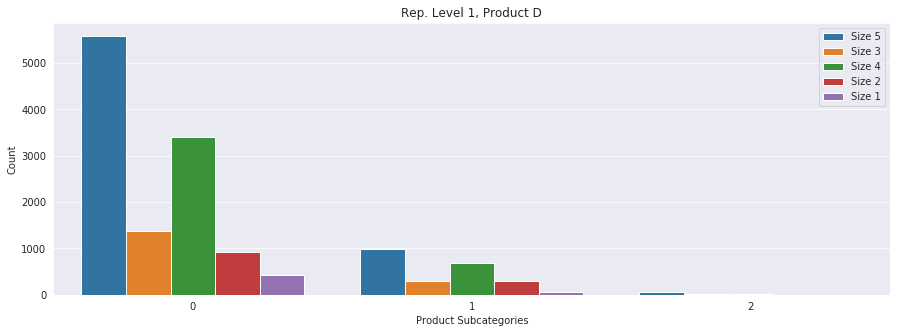

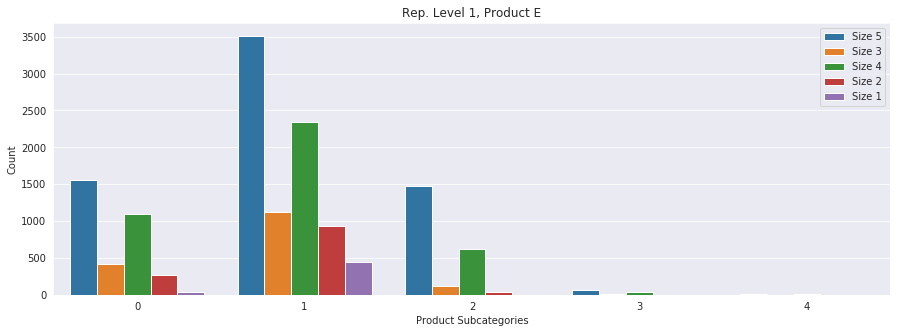

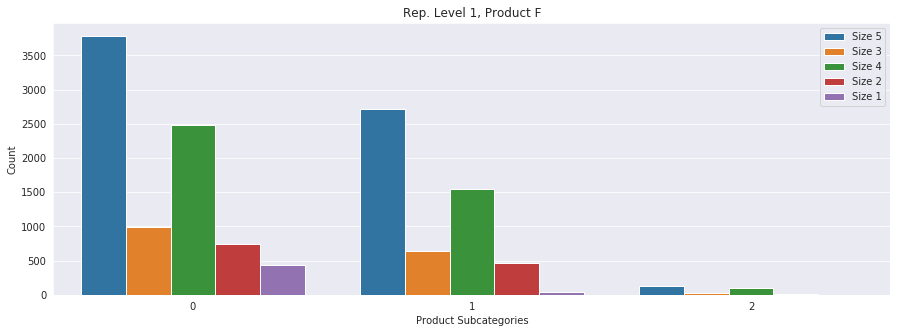

In [109]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(rep1['A'], data= rep1, hue= rep1['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 1, Product A')
plt.legend(loc='upper right')


plt.figure(figsize=(15,5))
ax = sns.countplot(rep1['B'], data= rep1, hue= rep1['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 1, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep1['C'], data= rep1, hue= rep1['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 1, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep1['D'], data= rep1, hue= rep1['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 1, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep1['E'], data= rep1, hue= rep1['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 1, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep1['F'], data= rep1, hue= rep1['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 1, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 4722
The sum number of the product B: 5068
The sum number of the product C: 9836
The sum number of the product D: 2509
The sum number of the product E: 13285
The sum number of the product F: 5957
[('D', 2509), ('A', 4722), ('B', 5068), ('F', 5957), ('C', 9836), ('E', 13285)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Rep. Level 1')]

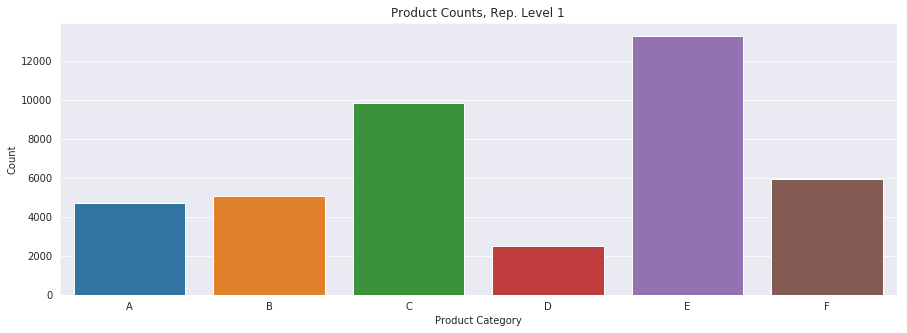

In [110]:
print("The sum number of the product A:" ,sum(rep1['A']))
print("The sum number of the product B:" ,sum(rep1['B']))
print("The sum number of the product C:" ,sum(rep1['C']))
print("The sum number of the product D:" ,sum(rep1['D']))
print("The sum number of the product E:" ,sum(rep1['E']))
print("The sum number of the product F:" ,sum(rep1['F']))

rep_1_list = [('A', sum(rep1['A'])), ('B', sum(rep1['B'])), ('C',sum(rep1['C'])),
             ('D',sum(rep1['D'])), ('E',sum(rep1['E'])), ('F',sum(rep1['F']))]

sums = [sum(rep1['A']), sum(rep1['B']), sum(rep1['C']), sum(rep1['D']), sum(rep1['E']), sum(rep1['F'])]

def sort_by_sum(val): 
    return val[1]  

rep_1_list.sort(key=sort_by_sum)
print(rep_1_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Rep. Level 1')

### Rep. Level 1 --> clients with Rep. Level 1 are more likely to buy products in category E and least likely to buy products in category D

### Representative Level 2

In [76]:
rep2 = df.loc[df['Rep.Level']=='Level 2']

a = rep2.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b = rep2.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c = rep2.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d = rep2.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e = rep2.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f = rep2.iloc[:,39:41]
f['F'] = f.sum(axis=1)

rep2['A'] = a['A']
rep2['B'] = b['B']
rep2['C'] = c['C']
rep2['D'] = d['D']
rep2['E'] = e['E']
rep2['F'] = f['F']
rep2.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
34370       34624   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
271123     273566   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
271122     273565   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
34420       34675   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
270866     273307   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
34370    0   0   0   0   0   0   0   0   0   0   0    0    0    0    1   0   
271123   1   0   0   0   0   0   0   1   1   0   0    0    0    0    1   0   
271122   1   0   0   0   0   0   0   1   1   0   0    0    0    0    1   0   
34420    0   0   0   0   0   0   0   0   0   0   0    0    0    0    1   0   
270866   0   0   0   0   0   0   0   1   1   0   0    0    0    0    1   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
34370    0   0   0   0   0   0   0   0   0  Industry 1   Level 2  Size 4  0   
271123   0   0   0   0   0   0   0   0   0  Industry 1   Level 2  Size 4  0   
271122   0   0   0   0   0   0   0   0   0  Industry 1   Level 2  Size 5  0   
34420    0   0   0   0   0   0   0   1   1  Industry 1   Level 2  Size 3  0   
270866   0   0   0   0   0   0   0   0   0  Industry 1   Level 2  Size 3  0   

        B  C  D  E  F  
34370   0  0  0  1  0  
271123  0  1  2  1  0  
271122  0  1  2  1  0  
34420   0  0  0  1  2  
270866  1  0  2  1  0

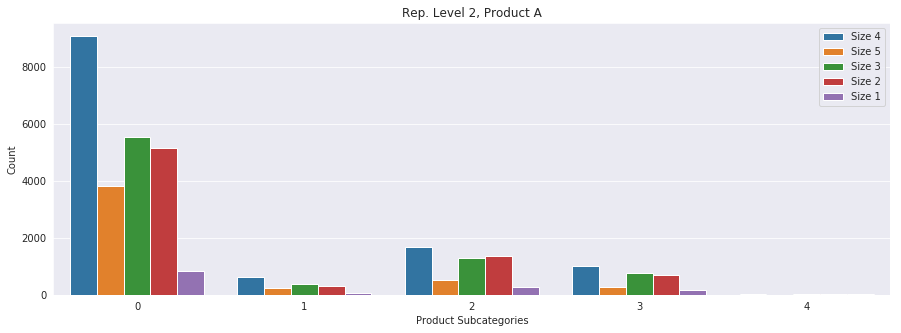

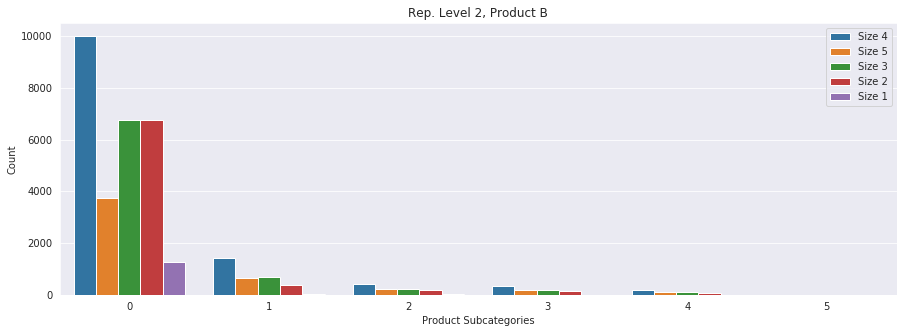

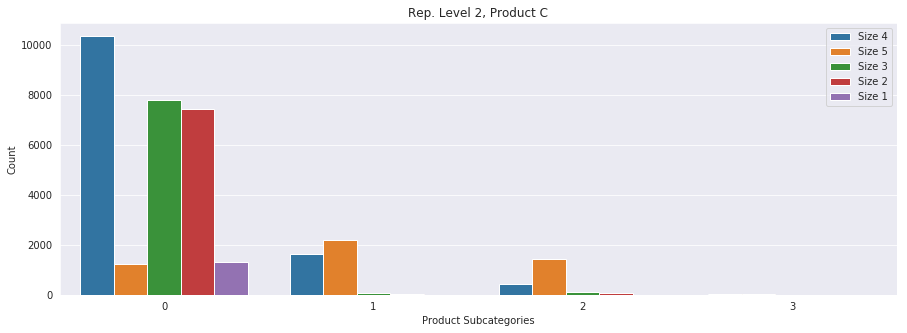

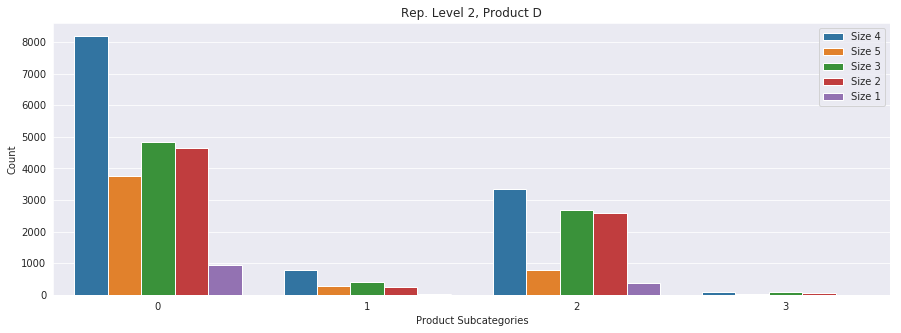

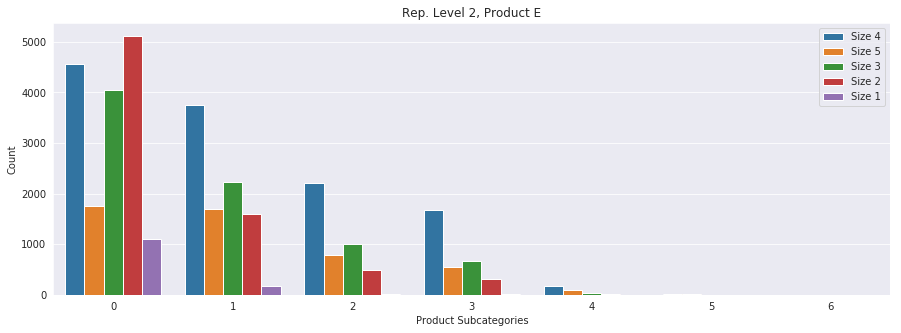

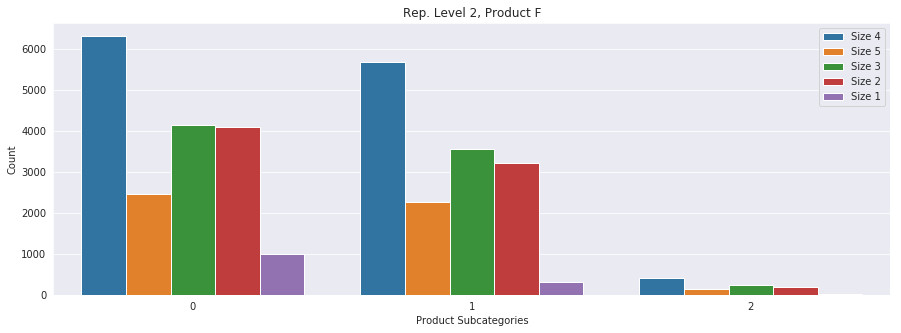

In [111]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(rep2['A'], data= rep2, hue= rep2['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 2, Product A')
plt.legend(loc='upper right')


plt.figure(figsize=(15,5))
ax = sns.countplot(rep2['B'], data= rep2, hue= rep2['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 2, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep2['C'], data= rep2, hue= rep2['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 2, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep2['D'], data= rep2, hue= rep2['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 2, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep2['E'], data= rep2, hue= rep2['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 2, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep2['F'], data= rep2, hue= rep2['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 2, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 20922
The sum number of the product B: 9665
The sum number of the product C: 8138
The sum number of the product D: 22045
The sum number of the product E: 29521
The sum number of the product F: 17098
[('C', 8138), ('B', 9665), ('F', 17098), ('A', 20922), ('D', 22045), ('E', 29521)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Rep. Level 2')]

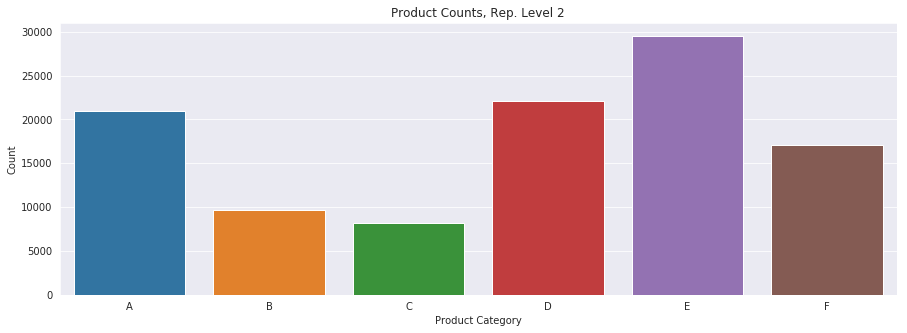

In [112]:
print("The sum number of the product A:" ,sum(rep2['A']))
print("The sum number of the product B:" ,sum(rep2['B']))
print("The sum number of the product C:" ,sum(rep2['C']))
print("The sum number of the product D:" ,sum(rep2['D']))
print("The sum number of the product E:" ,sum(rep2['E']))
print("The sum number of the product F:" ,sum(rep2['F']))

rep_2_list = [('A', sum(rep2['A'])), ('B', sum(rep2['B'])), ('C',sum(rep2['C'])),
             ('D',sum(rep2['D'])), ('E',sum(rep2['E'])), ('F',sum(rep2['F']))]

sums = [sum(rep2['A']), sum(rep2['B']), sum(rep2['C']), sum(rep2['D']), sum(rep2['E']), sum(rep2['F'])]

def sort_by_sum(val): 
    return val[1]  

rep_2_list.sort(key=sort_by_sum)
print(rep_2_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Rep. Level 2')

### Rep. Level 2 --> clients with Rep. Level 2 are more likely to buy products in category E and least likely to buy products in category C

In [79]:
rep3 = df.loc[df['Rep.Level']=='Level 3']

a = rep3.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b = rep3.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c = rep3.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d = rep3.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e = rep3.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f = rep3.iloc[:,39:41]
f['F'] = f.sum(axis=1)

rep3['A'] = a['A']
rep3['B'] = b['B']
rep3['C'] = c['C']
rep3['D'] = d['D']
rep3['E'] = e['E']
rep3['F'] = f['F']
rep3.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
270357     272794   0   0   0   1   1   1   0   0   0   1   1   1   0   0   0   
270213     272650   0   0   0   1   1   0   0   0   0   1   1   1   0   0   1   
270147     272584   0   0   0   1   1   1   0   0   0   0   0   0   0   0   0   
270218     272655   0   0   0   1   1   1   0   0   0   0   0   0   0   0   0   
270274     272711   0   0   0   1   1   1   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
270357   1   1   0   0   0   0   0   1   1   0   0    0    0    0    1   0   
270213   0   0   0   0   0   0   0   1   1   0   0    0    0    0    1   0   
270147   0   0   0   0   0   0   0   1   1   0   0    0    0    0    0   0   
270218   1   0   0   0   0   0   0   1   1   0   0    0    0    0    0   0   
270274   0   0   0   0   0   0   0   1   1   0   0    0    0    0    1   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
270357   0   0   0   0   0   0   0   0   0  Industry 1   Level 3  Size 4  3   
270213   0   0   0   0   0   0   0   0   0  Industry 1   Level 3  Size 4  2   
270147   0   0   0   0   0   0   0   0   0  Industry 1   Level 3  Size 4  3   
270218   0   0   0   0   0   0   0   0   0  Industry 1   Level 3  Size 5  3   
270274   0   0   0   0   0   0   0   1   0  Industry 1   Level 3  Size 3  3   

        B  C  D  E  F  
270357  3  2  2  1  0  
270213  4  0  2  1  0  
270147  0  0  2  0  0  
270218  0  1  2  0  0  
270274  0  0  2  1  1

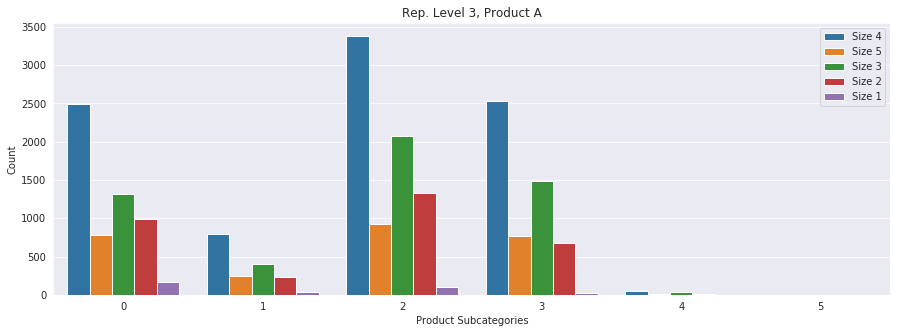

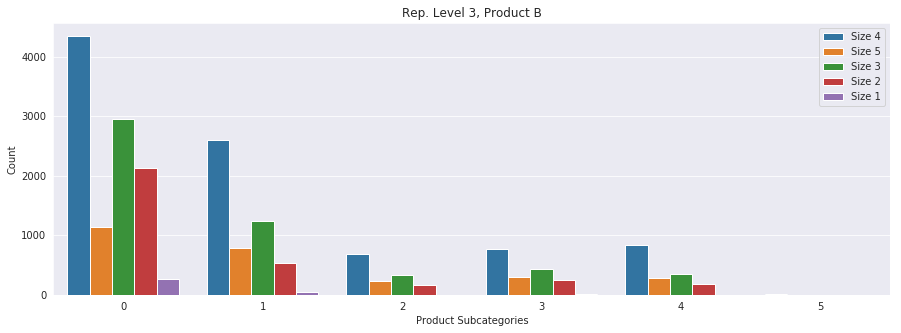

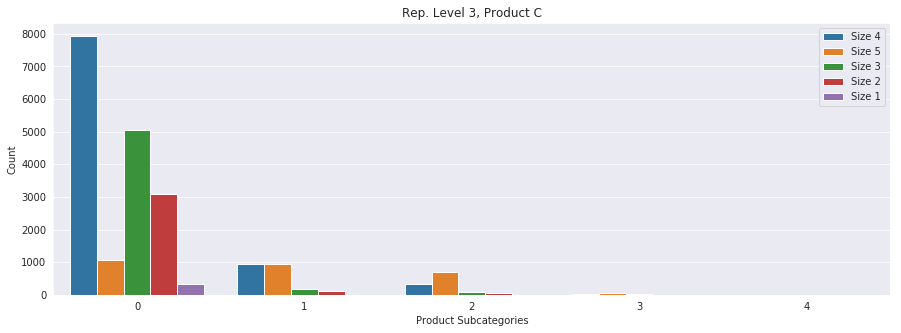

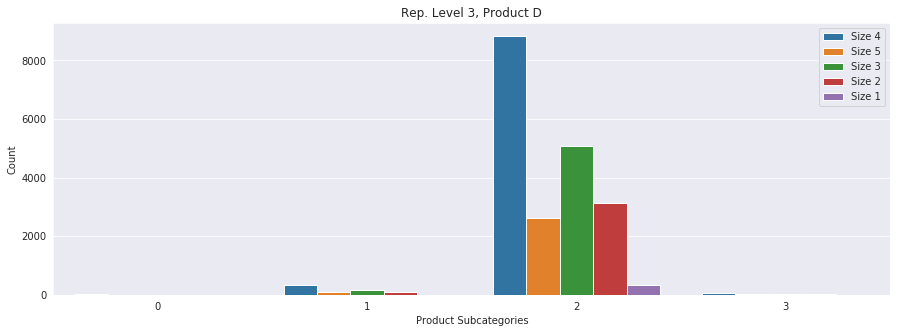

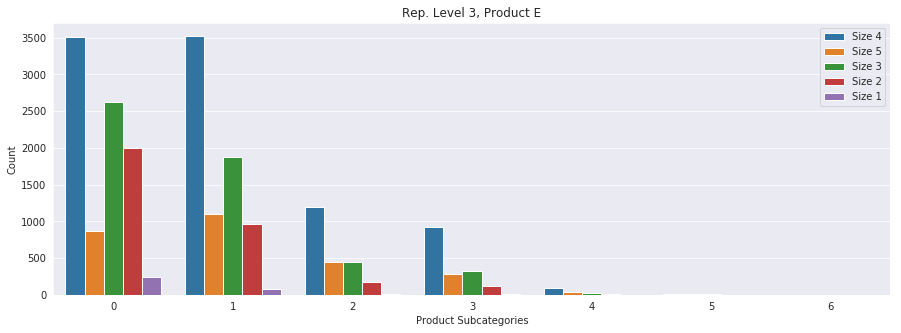

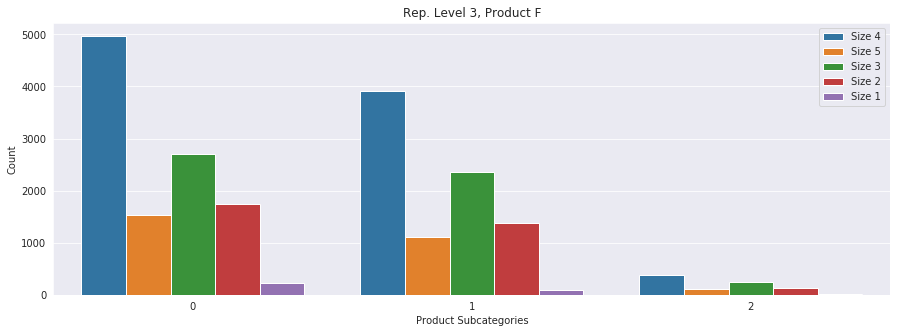

In [113]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(rep3['A'], data= rep3, hue= rep3['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 3, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep3['B'], data= rep3, hue= rep3['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 3, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep3['C'], data= rep3, hue= rep3['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 3, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep3['D'], data= rep3, hue= rep3['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 3, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep3['E'], data= rep3, hue= rep3['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 3, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep3['F'], data= rep3, hue= rep3['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 3, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 34279
The sum number of the product B: 20085
The sum number of the product C: 4758
The sum number of the product D: 41174
The sum number of the product E: 17825
The sum number of the product F: 10580
[('C', 4758), ('F', 10580), ('E', 17825), ('B', 20085), ('A', 34279), ('D', 41174)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Rep. Level 3')]

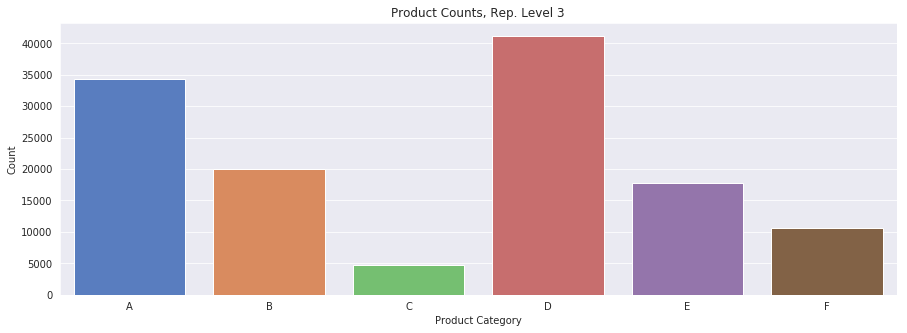

In [81]:
print("The sum number of the product A:" ,sum(rep3['A']))
print("The sum number of the product B:" ,sum(rep3['B']))
print("The sum number of the product C:" ,sum(rep3['C']))
print("The sum number of the product D:" ,sum(rep3['D']))
print("The sum number of the product E:" ,sum(rep3['E']))
print("The sum number of the product F:" ,sum(rep3['F']))

rep_3_list = [('A', sum(rep3['A'])), ('B', sum(rep3['B'])), ('C',sum(rep3['C'])),
             ('D',sum(rep3['D'])), ('E',sum(rep3['E'])), ('F',sum(rep3['F']))]

sums = [sum(rep3['A']), sum(rep3['B']), sum(rep3['C']), sum(rep3['D']), sum(rep3['E']), sum(rep3['F'])]

def sort_by_sum(val): 
    return val[1]  

rep_3_list.sort(key=sort_by_sum)
print(rep_3_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Rep. Level 3')

### Rep. Level 3 --> clients with Rep. Level 3 are more likely to buy products in category D and least likely to buy products in category C

### Representative Level 4

In [82]:
rep4 = df.loc[df['Rep.Level']=='Level 4']

a = rep4.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b = rep4.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c = rep4.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d = rep4.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e = rep4.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f = rep4.iloc[:,39:41]
f['F'] = f.sum(axis=1)

rep4['A'] = a['A']
rep4['B'] = b['B']
rep4['C'] = c['C']
rep4['D'] = d['D']
rep4['E'] = e['E']
rep4['F'] = f['F']
rep4.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
74440       75033   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
153807     155135   1   0   0   1   1   0   0   0   0   0   0   0   0   0   0   
74437       75030   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   
153812     155141   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
153816     155145   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
74440    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
153807   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
74437    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
153812   0   0   0   0   0   0   0   1   1   0   0    0    0    0    0   0   
153816   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
74440    0   0   0   0   0   0   0   0   1  Industry 1   Level 4  Size 3  0   
153807   0   0   0   0   0   0   0   1   0  Industry 1   Level 4  Size 2  3   
74437    0   0   0   0   0   0   0   0   1  Industry 1   Level 4  Size 2  0   
153812   0   0   0   0   0   0   0   0   0  Industry 1   Level 4  Size 2  0   
153816   0   0   0   0   0   0   0   1   0  Industry 1   Level 4  Size 2  0   

        B  C  D  E  F  
74440   0  0  0  0  1  
153807  0  0  0  0  1  
74437   2  0  0  0  1  
153812  0  0  2  0  0  
153816  0  0  0  0  1

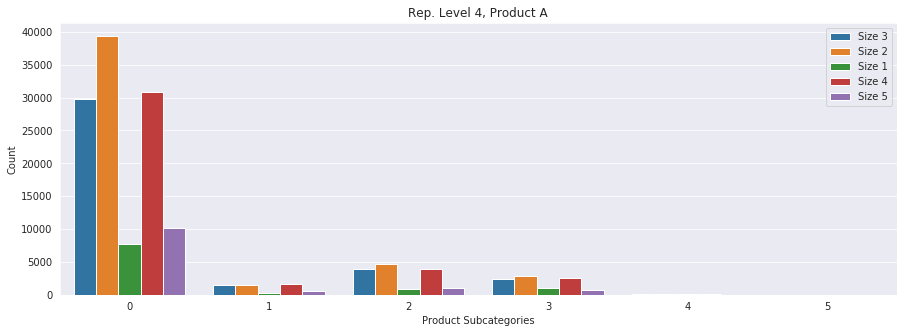

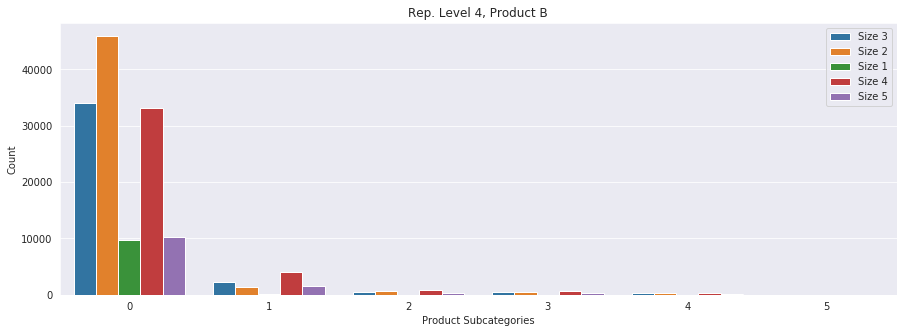

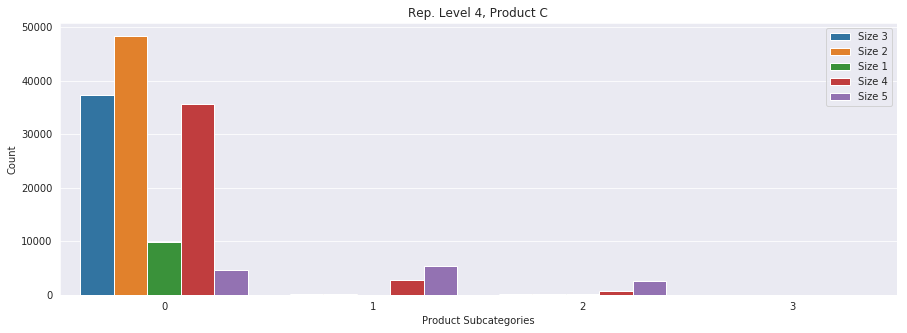

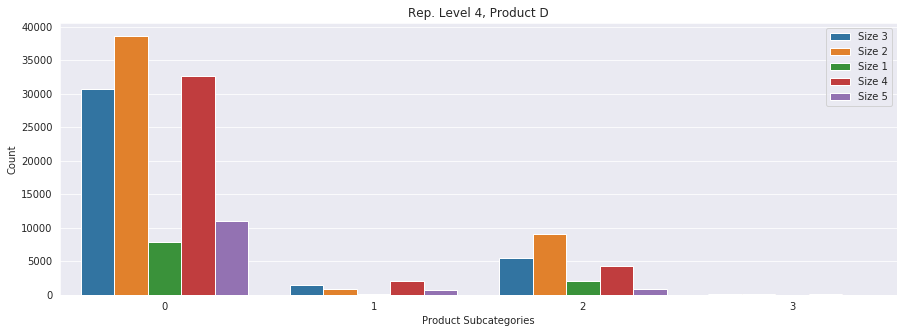

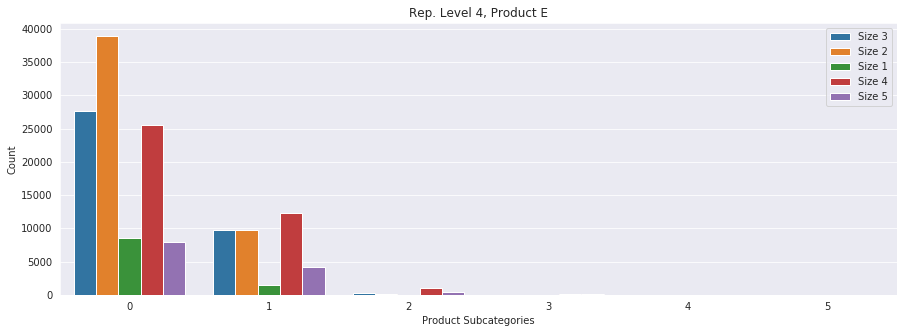

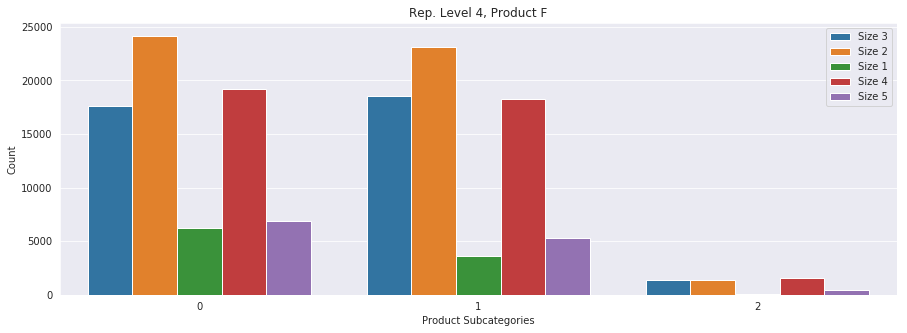

In [114]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(rep4['A'], data= rep4, hue= rep4['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 4, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep4['B'], data= rep4, hue= rep4['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 4, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep4['C'], data= rep4, hue= rep4['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 4, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep4['D'], data= rep4, hue= rep4['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 4, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep4['E'], data= rep4, hue= rep4['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 4, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep4['F'], data= rep4, hue= rep4['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 4, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 64902
The sum number of the product B: 24522
The sum number of the product C: 15746
The sum number of the product D: 49358
The sum number of the product E: 41367
The sum number of the product F: 78657
[('C', 15746), ('B', 24522), ('E', 41367), ('D', 49358), ('A', 64902), ('F', 78657)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Rep. Level 4')]

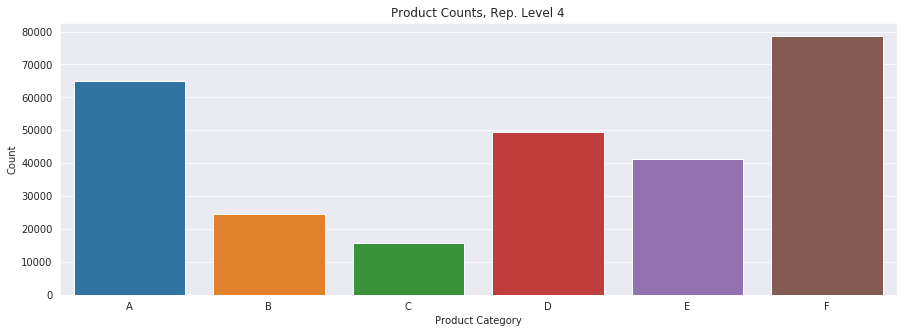

In [115]:
print("The sum number of the product A:" ,sum(rep4['A']))
print("The sum number of the product B:" ,sum(rep4['B']))
print("The sum number of the product C:" ,sum(rep4['C']))
print("The sum number of the product D:" ,sum(rep4['D']))
print("The sum number of the product E:" ,sum(rep4['E']))
print("The sum number of the product F:" ,sum(rep4['F']))

rep_4_list = [('A', sum(rep4['A'])), ('B', sum(rep4['B'])), ('C',sum(rep4['C'])),
             ('D',sum(rep4['D'])), ('E',sum(rep4['E'])), ('F',sum(rep4['F']))]

sums = [sum(rep4['A']), sum(rep4['B']), sum(rep4['C']), sum(rep4['D']), sum(rep4['E']), sum(rep4['F'])]

def sort_by_sum(val): 
    return val[1]  

rep_4_list.sort(key=sort_by_sum)
print(rep_4_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Rep. Level 4')

### Rep. Level 4 --> clients with Rep. Level 4 are more likely to buy products in category F and least likely to buy products in category C

### Representative Level 5

In [85]:
rep5 = df.loc[df['Rep.Level']=='Level 5']

a = rep5.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b = rep5.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c = rep5.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d = rep5.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e = rep5.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f = rep5.iloc[:,39:41]
f['F'] = f.sum(axis=1)

rep5['A'] = a['A']
rep5['B'] = b['B']
rep5['C'] = c['C']
rep5['D'] = d['D']
rep5['E'] = e['E']
rep5['F'] = f['F']
rep5.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
96161       96949   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
153820     155149   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
34375       34629   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
270980     273422   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
34328       34581   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
96161    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
153820   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
34375    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
270980   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
34328    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
96161    0   0   0   0   0   0   0   0   0  Industry 1   Level 5  Size 3  0   
153820   0   0   0   0   0   0   0   0   0  Industry 1   Level 5  Size 2  0   
34375    0   0   0   0   0   0   0   0   0  Industry 1   Level 5  Size 2  0   
270980   0   0   0   0   0   0   0   0   0  Industry 1   Level 5  Size 1  0   
34328    0   0   0   0   0   0   0   0   0  Industry 1   Level 5  Size 2  0   

        B  C  D  E  F  
96161   0  0  0  0  0  
153820  0  0  0  0  0  
34375   0  0  0  0  0  
270980  0  0  0  0  0  
34328   0  0  0  0  0

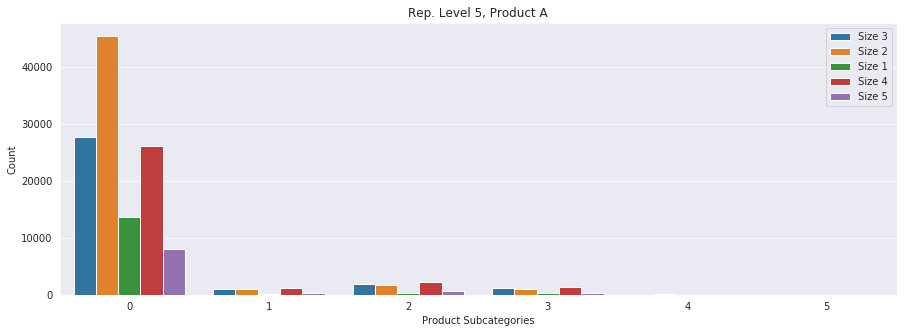

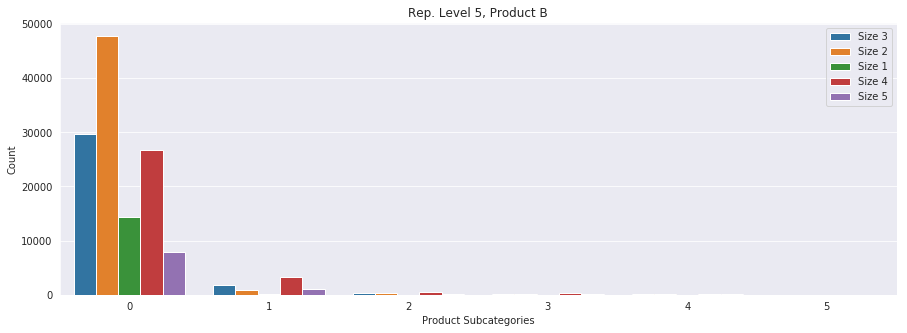

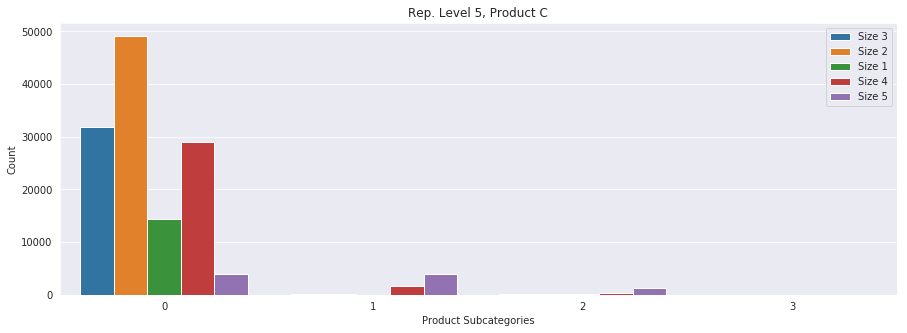

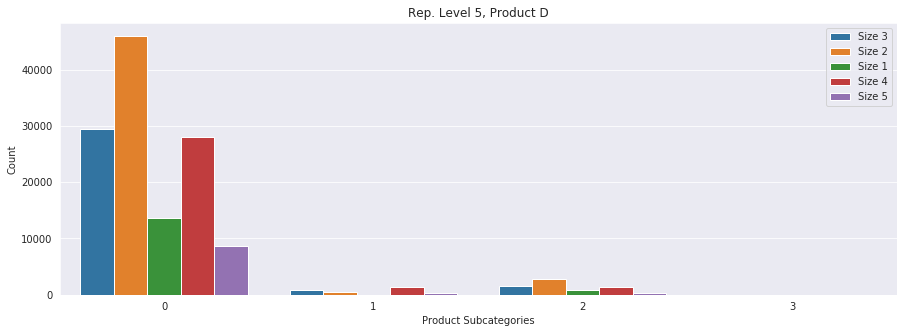

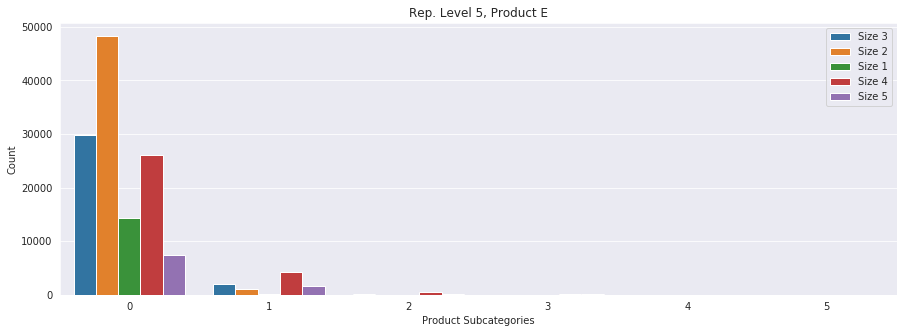

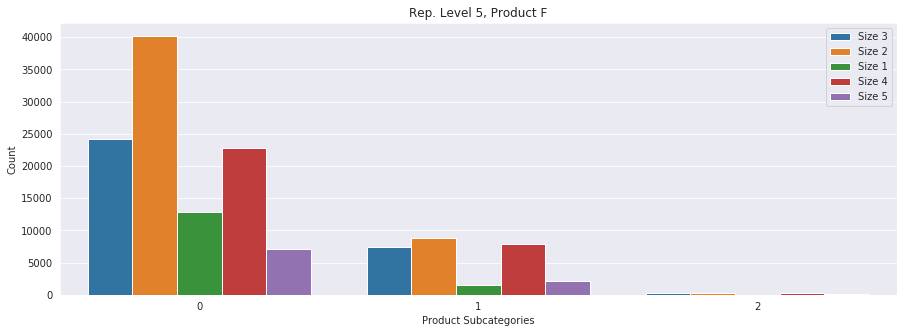

In [116]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(rep5['A'], data= rep5, hue= rep5['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 5, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep5['B'], data= rep5, hue= rep5['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 5, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep5['C'], data= rep5, hue= rep5['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 5, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep5['D'], data= rep5, hue= rep5['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 5, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep5['E'], data= rep5, hue= rep5['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 5, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(rep5['F'], data= rep5, hue= rep5['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level 5, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 30841
The sum number of the product B: 13703
The sum number of the product C: 9813
The sum number of the product D: 17743
The sum number of the product E: 11817
The sum number of the product F: 30114
[('C', 9813), ('E', 11817), ('B', 13703), ('D', 17743), ('F', 30114), ('A', 30841)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Rep. Level 5')]

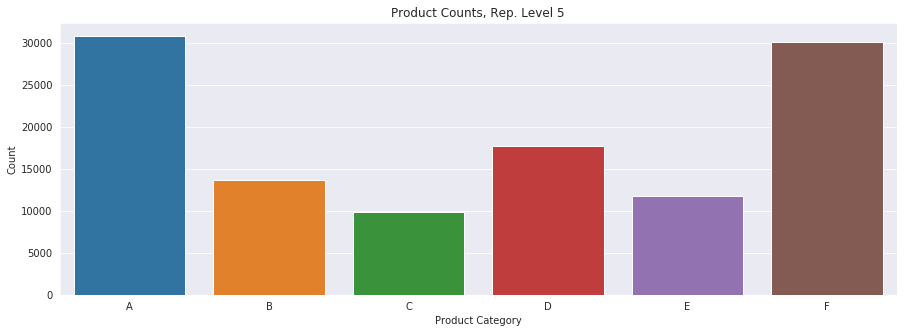

In [117]:
print("The sum number of the product A:" ,sum(rep5['A']))
print("The sum number of the product B:" ,sum(rep5['B']))
print("The sum number of the product C:" ,sum(rep5['C']))
print("The sum number of the product D:" ,sum(rep5['D']))
print("The sum number of the product E:" ,sum(rep5['E']))
print("The sum number of the product F:" ,sum(rep5['F']))

rep_5_list = [('A', sum(rep5['A'])), ('B', sum(rep5['B'])), ('C',sum(rep5['C'])),
             ('D',sum(rep5['D'])), ('E',sum(rep5['E'])), ('F',sum(rep5['F']))]

sums = [sum(rep5['A']), sum(rep5['B']), sum(rep5['C']), sum(rep5['D']), sum(rep5['E']), sum(rep5['F'])]

def sort_by_sum(val): 
    return val[1]  

rep_5_list.sort(key=sort_by_sum)
print(rep_5_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Rep. Level 5')

### Rep. Level 5 --> clients with Rep. Level 5 are more likely to buy products in category A and least likely to buy products in category C

### Representative Level Unknown

In [88]:
repu = df.loc[df['Rep.Level']=='Unknown']

a = repu.iloc[:,1:10]
a['A'] = a.sum(axis=1)

b = repu.iloc[:,10:16]
b['B'] = b.sum(axis=1)

c = repu.iloc[:,16:22]
c['C'] = c.sum(axis=1)

d = repu.iloc[:,22:26]
d['D'] = d.sum(axis=1)

e = repu.iloc[:,26:39]
e['E'] = e.sum(axis=1)

f = repu.iloc[:,39:41]
f['F'] = f.sum(axis=1)

repu['A'] = a['A']
repu['B'] = b['B']
repu['C'] = c['C']
repu['D'] = d['D']
repu['E'] = e['E']
repu['F'] = f['F']
repu.head()

Client_Id  A1  A2  A3  A4  A5  A6  A7  A8  A9  B1  B2  B3  B4  B5  B6  \
271446     273893   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
271449     273896   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
271450     273897   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
153283     154607   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
155359     156728   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C5  C6  C7  D1  D2  D3  D4  E1  E10  E11  E12  E13  E2  \
271446   0   0   0   0   0   0   0   1   1   0   0    0    0    0    0   0   
271449   0   0   0   0   0   0   0   1   1   0   0    0    0    0    1   0   
271450   0   0   0   0   0   0   0   1   1   0   0    0    0    0    0   0   
153283   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   0   
155359   0   0   0   0   0   0   0   1   1   0   0    0    0    0    0   0   

        E3  E4  E5  E6  E7  E8  E9  F1  F2    Industry Rep.Level    Size  A  \
271446   0   0   0   0   0   0   0   0   1  Industry 1   Unknown  Size 2  0   
271449   0   0   0   0   0   0   0   1   1  Industry 1   Unknown  Size 1  0   
271450   0   0   0   0   0   0   0   0   0  Industry 1   Unknown  Size 2  0   
153283   0   0   0   0   0   0   0   0   0  Industry 1   Unknown  Size 2  0   
155359   0   0   0   0   0   0   0   0   1  Industry 1   Unknown  Size 2  0   

        B  C  D  E  F  
271446  0  0  2  0  1  
271449  0  0  2  1  2  
271450  0  0  2  0  0  
153283  0  0  0  0  0  
155359  0  0  2  0  1

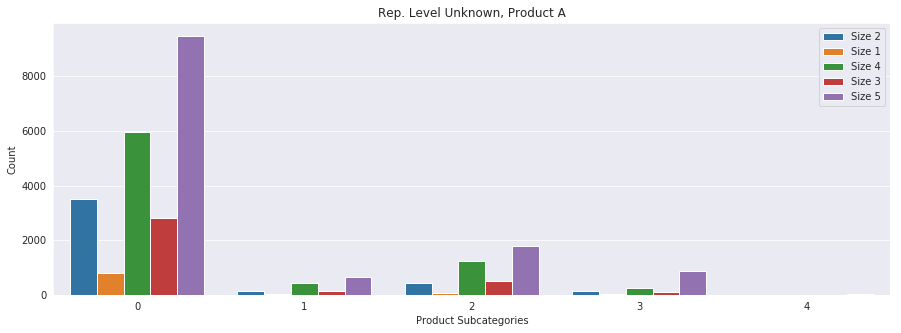

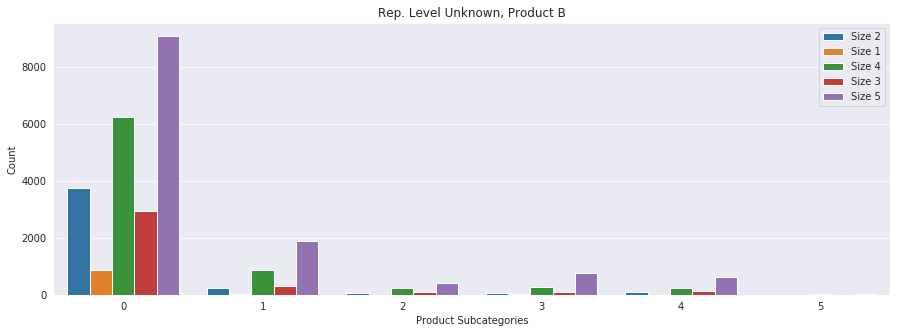

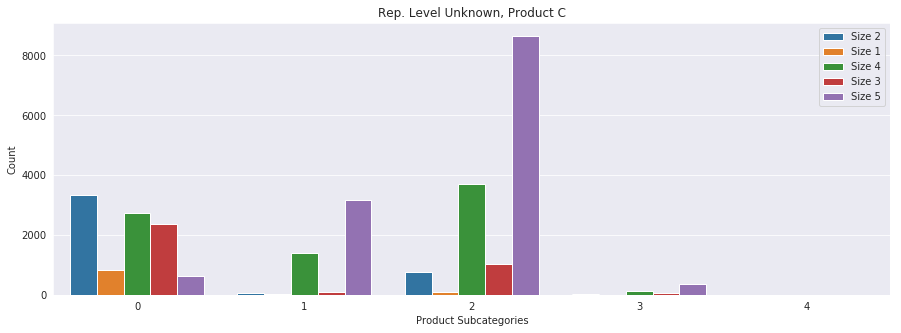

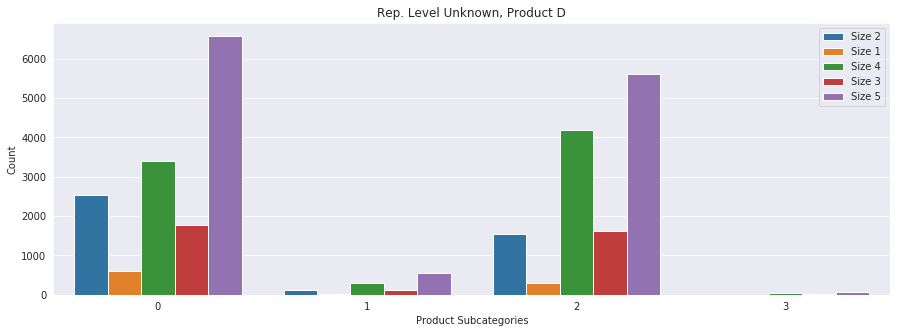

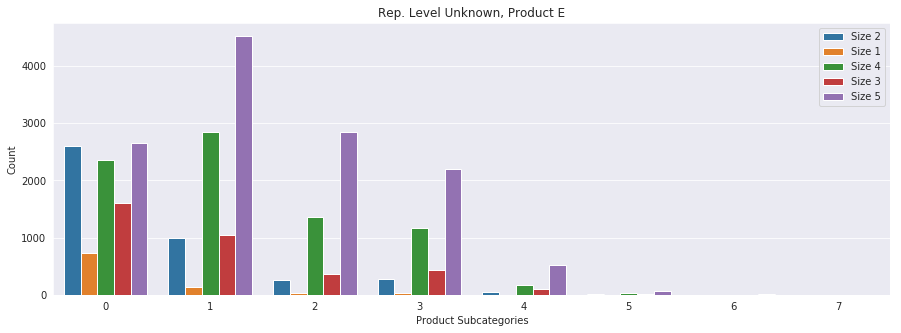

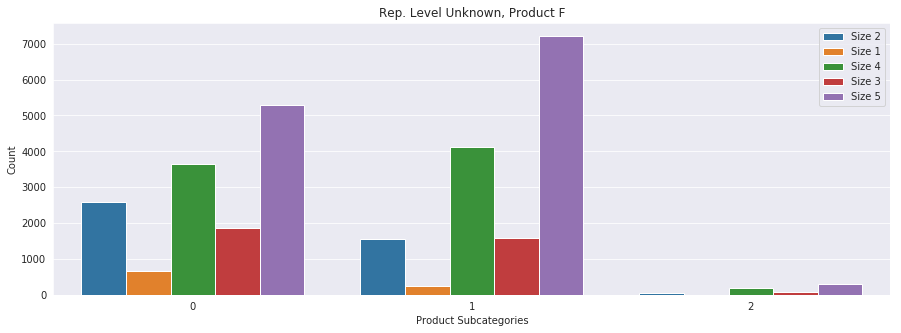

In [118]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(repu['A'], data= repu, hue= repu['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level Unknown, Product A')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(repu['B'], data= repu, hue= repu['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level Unknown, Product B')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(repu['C'], data= repu, hue= repu['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level Unknown, Product C')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(repu['D'], data= repu, hue= repu['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level Unknown, Product D')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(repu['E'], data= repu, hue= repu['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level Unknown, Product E')
plt.legend(loc='upper right')

plt.figure(figsize=(15,5))
ax = sns.countplot(repu['F'], data= repu, hue= repu['Size'])
ax.set(xlabel='Product Subcategories', ylabel='Count', title='Rep. Level Unknown, Product F')
plt.legend(loc='upper right')

The sum number of the product A: 13829
The sum number of the product B: 13296
The sum number of the product C: 34883
The sum number of the product D: 27984
The sum number of the product E: 35549
The sum number of the product F: 15974
[('B', 13296), ('A', 13829), ('F', 15974), ('D', 27984), ('C', 34883), ('E', 35549)]


[Text(0,0.5,'Count'),
 Text(0.5,0,'Product Category'),
 Text(0.5,1,'Product Counts, Rep. Level Unknown')]

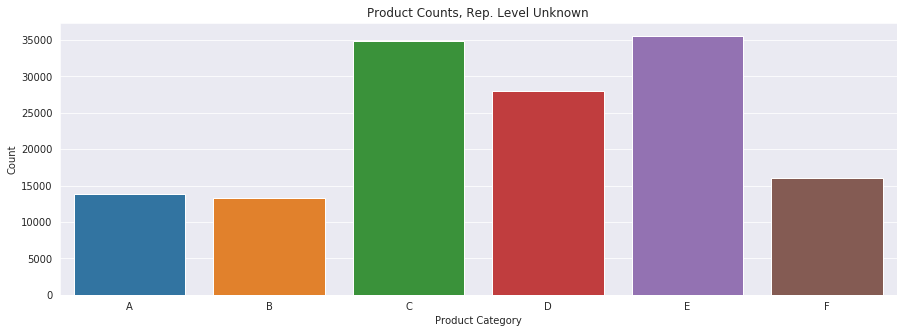

In [119]:
print("The sum number of the product A:" ,sum(repu['A']))
print("The sum number of the product B:" ,sum(repu['B']))
print("The sum number of the product C:" ,sum(repu['C']))
print("The sum number of the product D:" ,sum(repu['D']))
print("The sum number of the product E:" ,sum(repu['E']))
print("The sum number of the product F:" ,sum(repu['F']))

rep_u_list = [('A', sum(repu['A'])), ('B', sum(repu['B'])), ('C',sum(repu['C'])),
             ('D',sum(repu['D'])), ('E',sum(repu['E'])), ('F',sum(repu['F']))]

sums = [sum(repu['A']), sum(repu['B']), sum(repu['C']), sum(repu['D']), sum(repu['E']), sum(repu['F'])]

def sort_by_sum(val): 
    return val[1]  

rep_u_list.sort(key=sort_by_sum)
print(rep_u_list)

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=['A', 'B', 'C', 'D', 'E', 'F'], y=sums)
ax.set(xlabel='Product Category', ylabel='Count', title='Product Counts, Rep. Level Unknown')

### Rep. Level Unknown --> clients with Rep. Level Unknown are more likely to buy products in category E and least likely to buy products in category B